In [7]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import preprocessing
from sklearn import svm
import csv
import pydotplus
import datetime
import dateutil.relativedelta
from io import StringIO
import sklearn.neighbors as knn
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.linear_model import LogisticRegressionCV as LogRegCV
import sklearn.discriminant_analysis as da
from sklearn import linear_model
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from statsmodels.regression.linear_model import OLS
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn import tree
from sklearn.preprocessing import StandardScaler as Standardize
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.decomposition import PCA
from IPython.display import Image
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import sys
import sklearn as sk
from sklearn import discriminant_analysis
import statsmodels.formula.api as sm
from sklearn.cross_validation import train_test_split
%matplotlib inline
from itertools import groupby
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
# Load data description
loan_des = pd.read_excel('/Users/nisreenshiban/Downloads/lending-club-loan-data/LCDataDictionary.xlsx')
loan_des.head(n=5)

LoanStatNew                                        Description
0               addr_state  The state provided by the borrower in the loan...
1               annual_inc  The self-reported annual income provided by th...
2         annual_inc_joint  The combined self-reported annual income provi...
3         application_type  Indicates whether the loan is an individual ap...
4  collection_recovery_fee                     post charge off collection fee

In [9]:
# Load data
loan_data = pd.read_csv('/Users/nisreenshiban/Downloads/lending-club-loan-data/loan.csv')

# Separate predictors and response in the train
x_df = loan_data.drop('loan_status', axis=1)
y_df = loan_data.loc[:, 'loan_status'] 

display(x_df.head(n=5))

#dimension of the data
print ("Dimension of the data:", x_df.shape[1], 'predictors')

/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade     ...      total_bal_il il_util  \
0     10.65       162.87     B        B2     ...               NaN     NaN   
1     15.27        59.83     C        C4     ...               NaN     NaN   
2     15.96        84.33     C        C5     ...               NaN     NaN   
3     13.49       339.31     C        C1     ...               NaN     NaN   
4     12.69        67.79     B        B5     ...               NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN          NaN        NaN      NaN              NaN    NaN   
1         NaN          NaN        NaN      NaN              NaN    NaN   
2         NaN          NaN        NaN      NaN              NaN    NaN   
3         NaN          NaN        NaN      NaN              NaN    NaN   
4         NaN          NaN        NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 73 columns]

Dimension of the data: 73 predictors


In [10]:
x_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', '

In [11]:
for col in x_df:
    x_df[col] = x_df[col].fillna(method='ffill')
    x_df[col] = x_df[col].fillna(method='bfill')
print(x_df.isnull().sum().sum())

0


In [12]:
x_df = x_df.drop('grade', axis=1)
x_df = x_df.drop('sub_grade', axis=1)
x_df.head(n=3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   

   int_rate  installment emp_title emp_length     ...      total_bal_il  \
0     10.65       162.87     Ryder  10+ years     ...           35367.0   
1     15.27        59.83     Ryder   < 1 year     ...           35367.0   
2     15.96        84.33     Ryder  10+ years     ...           35367.0   

   il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
0     49.3         0.0         1.0     5020.0     40.1          59900.0   
1     49.3         0.0         1.0     5020.0     40.1          59900.0   
2     49.3         0.0         1.0     5020.0     40.1          59900.0   

  inq_fi total_cu_tl inq_last_12m  
0    1.0         4.0          0.0  
1    1.0         4.0          0.0  
2    1.0         4.0          0.0  

[3 rows x 71 columns]

In [13]:
for col in x_df:
    print(col, ":", x_df[col].dtype, 'and description:', loan_des.loc[loan_des['LoanStatNew'] == col].iloc[:,1])

id : int64 and description: 19    A unique LC assigned ID for the loan listing.
Name: Description, dtype: object
member_id : int64 and description: 33    A unique LC assigned Id for the borrower member.
Name: Description, dtype: object
loan_amnt : float64 and description: 31    The listed amount of the loan applied for by t...
Name: Description, dtype: object
funded_amnt : float64 and description: 15    The total amount committed to that loan at tha...
Name: Description, dtype: object
funded_amnt_inv : float64 and description: 16    The total amount committed by investors for th...
Name: Description, dtype: object
term : object and description: 49    The number of payments on the loan. Values are...
Name: Description, dtype: object
int_rate : float64 and description: 23    Interest Rate on the loan
Name: Description, dtype: object
installment : float64 and description: 22    The monthly payment owed by the borrower if th...
Name: Description, dtype: object
emp_title : object and descri

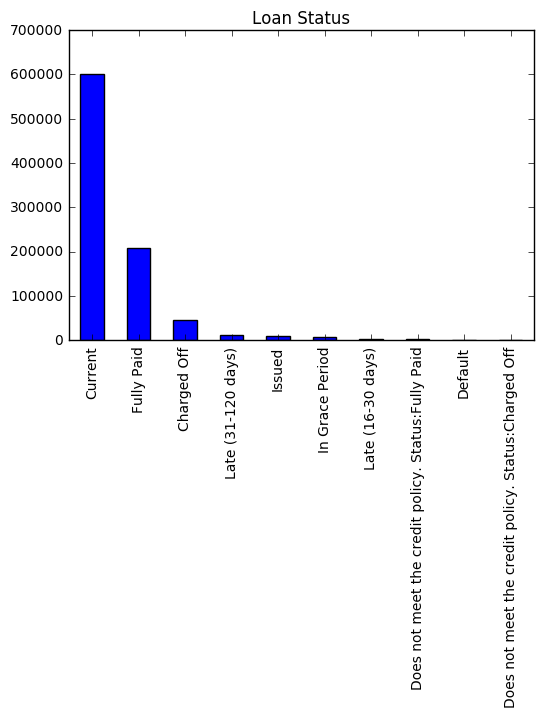

In [14]:
fig, ax = plt.subplots()
y_df.value_counts().plot(kind='bar')
ax.set_title('Loan Status')

In [15]:
y_df[0]

'Fully Paid'

In [16]:
mod_status = y_df

mod_status = mod_status.replace( y_df.unique()[7], y_df.unique()[0])
mod_status = mod_status.replace( y_df.unique()[8], y_df.unique()[1])

mod_stat_keys = mod_status.unique()

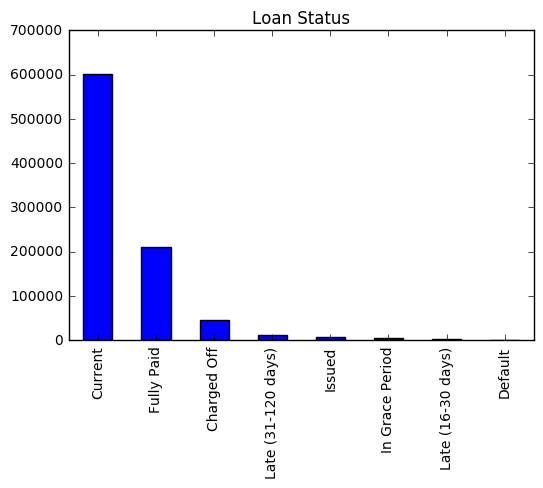

In [17]:
y_df = mod_status

fig, ax = plt.subplots()
y_df.value_counts().plot(kind='bar')
ax.set_title('Loan Status')

In [18]:
sorted_input =  sorted(list(zip(x_df.loan_amnt, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]

In [19]:
mod_stat_keys

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Issued'], dtype=object)

In [20]:
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']

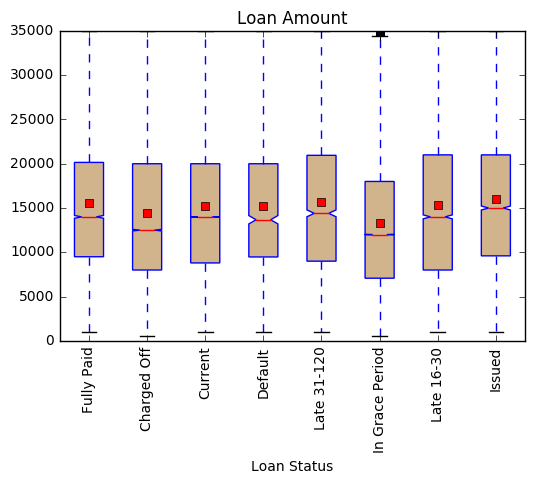

In [21]:
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Loan Amount')

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
'collections_12_mths_ex_med', 'mths_since_last_major_derog',
'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [22]:
sorted_input =  sorted(list(zip(x_df.funded_amnt, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]

In [23]:
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']

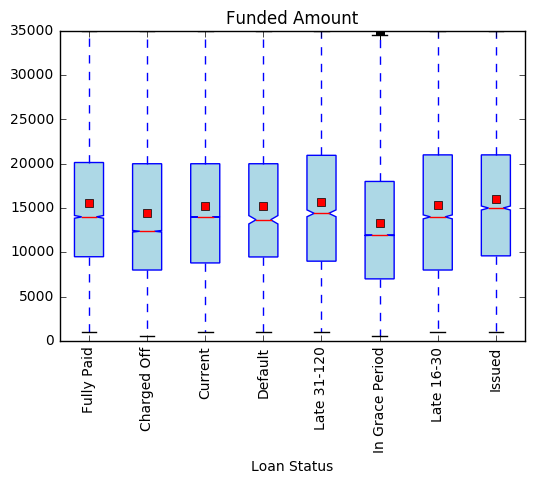

In [24]:
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Funded Amount')

In [25]:
sorted_input =  sorted(list(zip(x_df.funded_amnt_inv, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]

In [26]:
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']

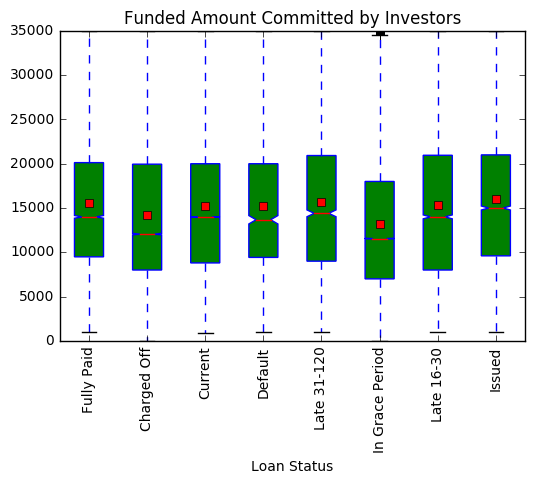

In [27]:
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['green', 'g', 'g', 'g', 'g', 'g', 'g', 'g']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Funded Amount Committed by Investors')

In [28]:
loan_des.loc[loan_des['LoanStatNew'] == 'pub_rec'].iloc[:,1]

42    Number of derogatory public records
Name: Description, dtype: object

In [29]:
sorted_input =  sorted(list(zip(x_df.term, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]

In [30]:
# grouped_dict[0]

In [31]:
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']

In [32]:
Counter(fully_paid)[' 60 months']

4565

In [33]:
Counter(fully_paid)

Counter({' 36 months': 7026, ' 60 months': 4565})

In [34]:
Counter(fully_paid).values()

dict_values([4565, 7026])

In [35]:
fully_paid_60 = Counter(fully_paid)[' 60 months'] # counts the elements' frequency class 1
fully_paid_36 = Counter(fully_paid)[' 36 months'] # counts the elements' frequency class 2

charged_off_60 = Counter(charged_off)[' 60 months'] # counts the elements' frequency class 1
charged_off_36 = Counter(charged_off)[' 36 months'] # counts the elements' frequency class 2

current_60 = Counter(current)[' 60 months'] # counts the elements' frequency class 1
current_36 = Counter(current)[' 60 months'] # counts the elements' frequency class 2

default_60 = Counter(default)[' 60 months'] # counts the elements' frequency class 1
default_36 = Counter(default)[' 36 months'] # counts the elements' frequency class 2

late_31_60 = Counter(late_31)[' 60 months'] # counts the elements' frequency class 1
late_31_36 = Counter(late_31)[' 36 months'] # counts the elements' frequency class 2

in_grace_per_60 = Counter(in_grace_per)[' 60 months'] # counts the elements' frequency class 1
in_grace_per_36 = Counter(in_grace_per)[' 36 months'] # counts the elements' frequency class 2

late_16_60 = Counter(late_16)[' 60 months'] # counts the elements' frequency class 1
late_16_36 = Counter(late_16)[' 36 months'] # counts the elements' frequency class 2

issued_60 = Counter(issued)[' 60 months'] # counts the elements' frequency class 1
issued_36 = Counter(issued)[' 36 months'] # counts the elements' frequency class 2

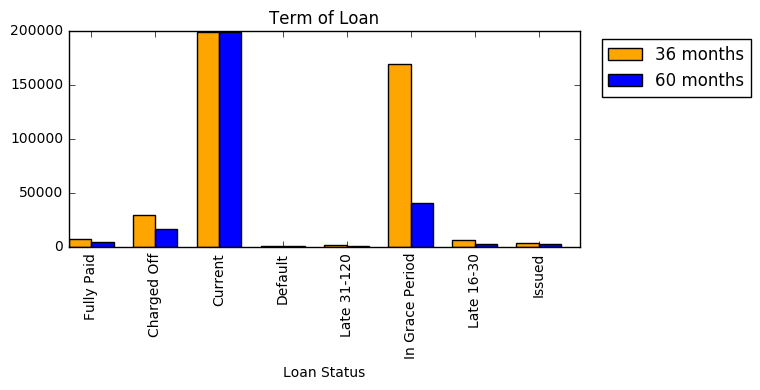

In [36]:
#mod_stat_keys
n_groups = 8
index = np.arange(n_groups)
y1 = [fully_paid_36, charged_off_36, current_36, default_36, late_31_36, in_grace_per_36, late_16_36, issued_36]
y2 = [fully_paid_60, charged_off_60, current_60, default_60, late_31_60, in_grace_per_60, late_16_60, issued_60]

fig = plt.figure()
bar_width = 0.35
ax = plt.subplot(111)
ax.set_title('Term of Loan')
ax.bar(index, y1, width= bar_width, color ='orange', label = '36 months')
ax.bar(index + bar_width, y2, width=bar_width, color ='blue', label = '60 months')
plt.xticks(index + bar_width, labels, rotation='vertical')
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xlabel('Loan Status')
plt.tight_layout()

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
'term', 'int_rate', 'installment', 'emp_title','emp_length', 'home_ownership', 'annual_inc', 'verification_status',
'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
'collections_12_mths_ex_med', 'mths_since_last_major_derog',
'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

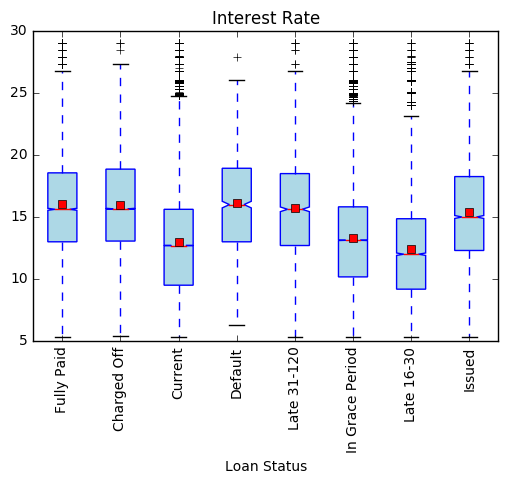

In [37]:
sorted_input =  sorted(list(zip(x_df.int_rate, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Interest Rate')

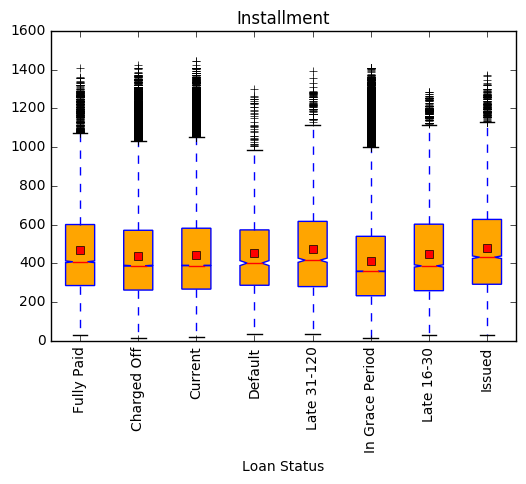

In [38]:
sorted_input =  sorted(list(zip(x_df.installment, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Installment')

range of employment title lengths: 34 - 1
mean of employment lengths: 2.2035624011837105


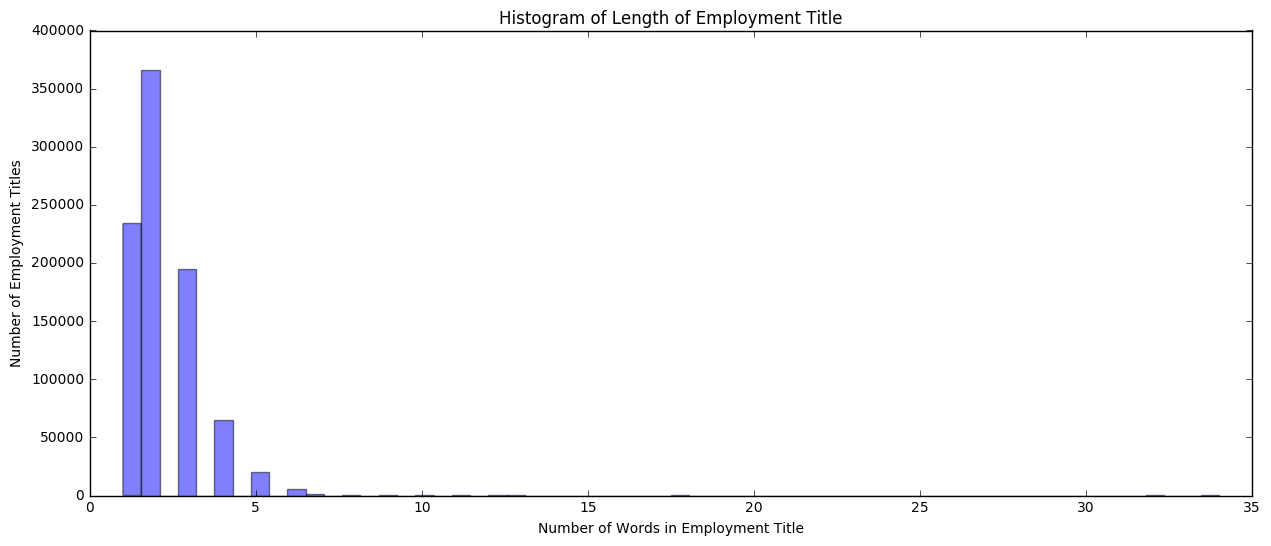

In [39]:
#Break each posts into words and count the number of words
lengths = x_df['emp_title'].apply(lambda x: len(x.split(' ')))

print( 'range of employment title lengths:', np.max(lengths), '-', np.min(lengths))
print( 'mean of employment lengths:', np.mean(lengths))

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

#Histogram of the word counts in each post
ax.hist(lengths, color='blue', bins=60, alpha=0.5)

ax.set_xlabel('Number of Words in Employment Title')
ax.set_ylabel('Number of Employment Titles')
ax.set_title('Histogram of Length of Employment Title')

plt.show()

In [40]:

#Create a text vectorizer (turns text into array of numbers)
#using a common list of English stop words
vectorizer = CountVectorizer(stop_words='english', min_df=1)

#Get all the text from data
corpus = x_df['emp_title'][0:10000].values
# len(corpus)
#Turn each text into an array of word counts
x = vectorizer.fit_transform(corpus)

x = x.toarray()

#Get the names of all the words we're counting
feature_names = vectorizer.get_feature_names()

print ('data shape:', x.shape)
print ('some features:', feature_names[0:10])

data shape: (10000, 7245)
some features: ['05', '10', '100', '101', '1013', '1044', '11', '113', '12', '121']


In [41]:

#Number of top words
n = 20

#Count the number of time each word occurs in the entire dataset
word_freq = x.sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Print the top n words and their frequencies
print (top_words)

[(252, 'bank'), (232, 'county'), (227, 'center'), (206, 'school'), (204, 'university'), (200, 'services'), (198, 'hospital'), (197, 'group'), (179, 'medical'), (171, 'corporation'), (168, 'state'), (167, 'city'), (161, 'llc'), (158, 'department'), (158, 'health'), (144, 'company'), (135, 'district'), (135, 'service'), (127, 'army'), (121, 'united')]


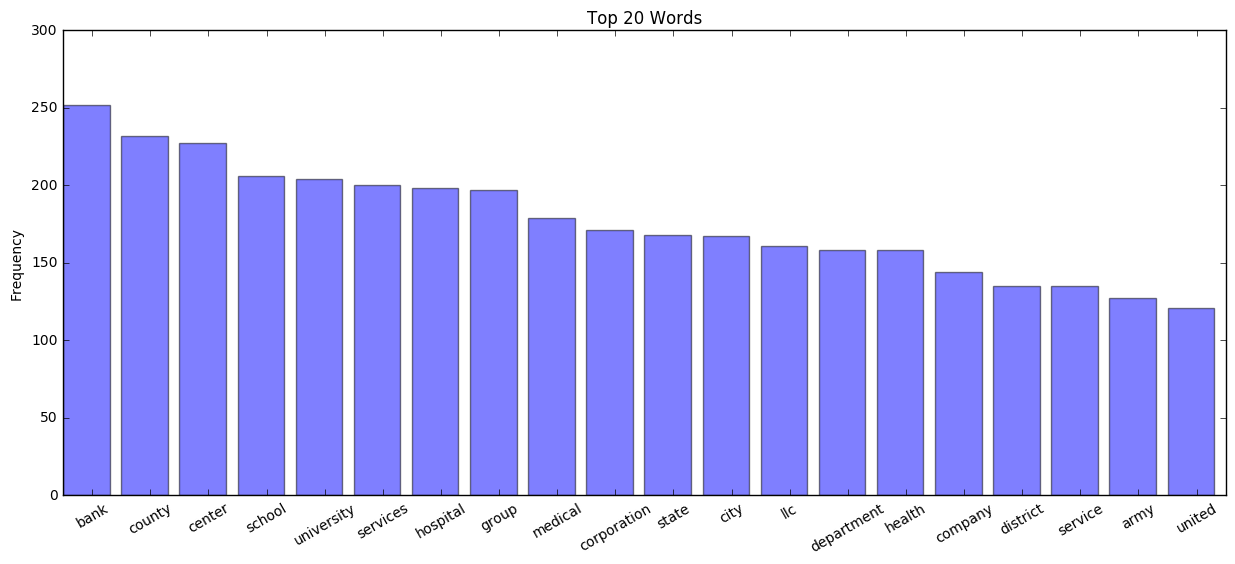

In [42]:

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

#Number of bars to use
indices = np.arange(n)
#Where to put the label under each bar
width = 0.5
#Bar plot of the frequencies of the top words
ax.bar(indices, [word[0] for word in top_words], color='blue', alpha=0.5)

ax.set_ylabel('Frequency')
ax.set_title('Top ' + str(n) + ' Words')

#Label the bars with the top words
ax.set_xticks(indices + width)
ax.set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

plt.show()

In [43]:
y_df.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Issued'], dtype=object)

In [44]:

shortened_df_emp_title =  pd.concat([pd.Series(x_df['emp_title'][0:10000].values),(pd.Series(y_df[0:10000]))], axis=1)

In [45]:

#Encode the class labels as numbers
labels = shortened_df_emp_title.loan_status.values
enc_label = LabelEncoder()
y = enc_label.fit_transform(labels)

In [46]:

#Print the class labels
print( 'classes labels:', enc_label.classes_)
#Print the labels for our dataset after encoding them as numbers
print ('transformed labels:', y[:10])

classes labels: ['Charged Off' 'Current' 'Default' 'Fully Paid' 'In Grace Period'
 'Late (16-30 days)' 'Late (31-120 days)']
transformed labels: [3 0 3 3 1 3 1 3 0 0]


In [47]:

#Print the number of employment titles in each class
print ('number in Charged off:', len(y[y == 0]))
print ('number in Current:', len(y[y == 1]))
print( 'number in Default:', len(y[y == 2]))
print ('number in Fully paid:', len(y[y == 3]))
print ('number in In Grace Period:', len(y[y == 4]))
print ('number in Issued:', len(y[y == 5]))
print ('number in Late_16:', len(y[y == 6]))
print ('number in Late_31:', len(y[y == 7]))

number in Charged off: 1517
number in Current: 956
number in Default: 2
number in Fully paid: 7487
number in In Grace Period: 8
number in Issued: 6
number in Late_16: 24
number in Late_31: 0


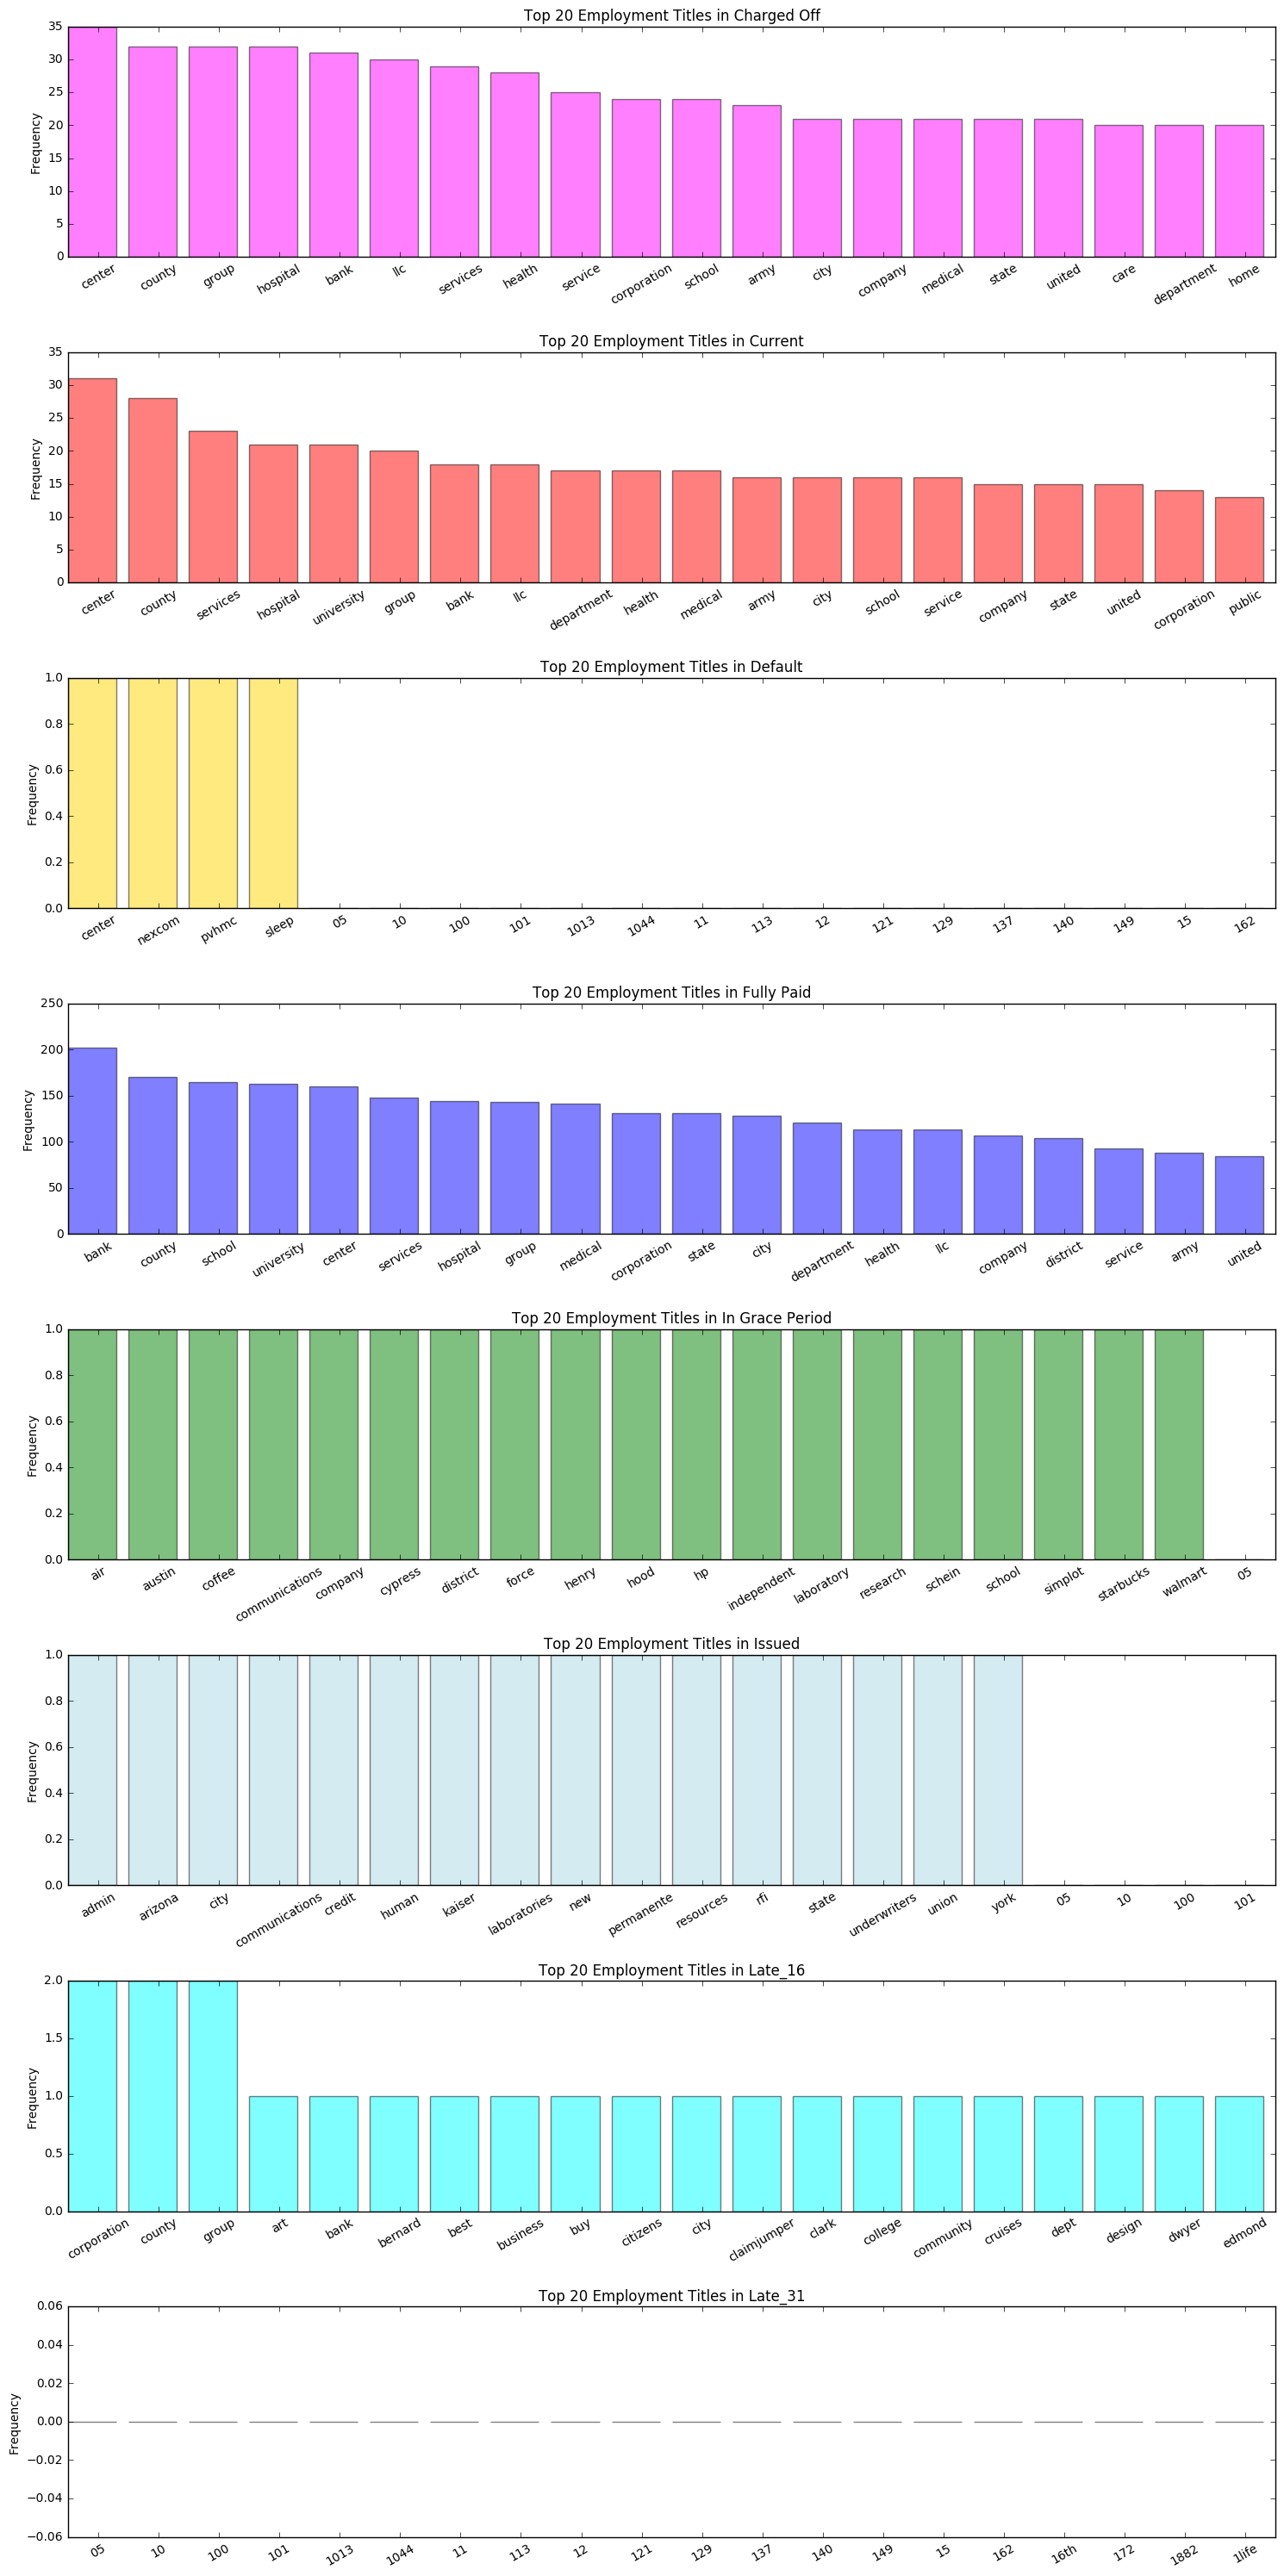

In [48]:

fig, ax = plt.subplots(8, 1, figsize=(15, 30))
#Number of top words
n = 20
#Number of bars to use
indices = np.arange(n)
#Where to put the label under each bar
width = 0.5

#Count the number of time each word occurs in "Charged Off"
word_freq = x[y == 0].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[0].bar(indices, [word[0] for word in top_words], color='magenta', alpha=0.5)

ax[0].set_ylabel('Frequency')
ax[0].set_title('Top ' + str(n) + ' Employment Titles in Charged Off')

#Label the bars with the top words
ax[0].set_xticks(indices + width)
ax[0].set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax[0].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in the Current
word_freq = x[y == 1].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[1].bar(indices, [word[0] for word in top_words], color='red', alpha=0.5)

ax[1].set_ylabel('Frequency')
ax[1].set_title('Top ' + str(n) + ' Employment Titles in Current')

#Label the bars with the top words
ax[1].set_xticks(indices + width)
ax[1].set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax[1].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in Default
word_freq = x[y == 2].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[2].bar(indices, [word[0] for word in top_words], color='gold', alpha=0.5)

ax[2].set_ylabel('Frequency')
ax[2].set_title('Top ' + str(n) + ' Employment Titles in Default')

#Label the bars with the top words
ax[2].set_xticks(indices + width)
ax[2].set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax[2].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in Fully Paid
word_freq = x[y == 3].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[3].bar(indices, [word[0] for word in top_words], color='blue', alpha=0.5)

ax[3].set_ylabel('Frequency')
ax[3].set_title('Top ' + str(n) + ' Employment Titles in Fully Paid')

#Label the bars with the top words
ax[3].set_xticks(indices + width)
ax[3].set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax[3].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in In Grace Period
word_freq = x[y == 4].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[4].bar(indices, [word[0] for word in top_words], color='green', alpha=0.5)

ax[4].set_ylabel('Frequency')
ax[4].set_title('Top ' + str(n) + ' Employment Titles in In Grace Period')

#Label the bars with the top words
ax[4].set_xticks(indices + width)
ax[4].set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax[4].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)



#Count the number of time each word occurs in Issued
word_freq = x[y == 5].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[5].bar(indices, [word[0] for word in top_words], color='lightblue', alpha=0.5)

ax[5].set_ylabel('Frequency')
ax[5].set_title('Top ' + str(n) + ' Employment Titles in Issued')

#Label the bars with the top words
ax[5].set_xticks(indices + width)
ax[5].set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax[5].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in Late_16
word_freq = x[y == 6].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[6].bar(indices, [word[0] for word in top_words], color='cyan', alpha=0.5)

ax[6].set_ylabel('Frequency')
ax[6].set_title('Top ' + str(n) + ' Employment Titles in Late_16')

#Label the bars with the top words
ax[6].set_xticks(indices + width)
ax[6].set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax[6].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in Late_31
word_freq = x[y == 7].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[7].bar(indices, [word[0] for word in top_words], color='orange', alpha=0.5)

ax[7].set_ylabel('Frequency')
ax[7].set_title('Top ' + str(n) + ' Employment Titles in Late_31')

#Label the bars with the top words
ax[7].set_xticks(indices + width)
ax[7].set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax[7].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)


plt.tight_layout()
plt.show()

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
'term', 'int_rate', 'installment', 'emp_title','emp_length', 

'home_ownership', 

'annual_inc', 'verification_status',
'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
'collections_12_mths_ex_med', 'mths_since_last_major_derog',
'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [49]:
x_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a'], dtype=object)

In [50]:
sorted_input =  sorted(list(zip(x_df.emp_length, y_df)))
res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[0]['items']
current = grouped_dict[0]['items']
default = grouped_dict[0]['items']
late_31 = grouped_dict[0]['items']
in_grace_per = grouped_dict[0]['items']
late_16 = grouped_dict[0]['items']
issued = grouped_dict[0]['items']

In [51]:
Counter(late_16).keys()
keys_list = ['4 years', '2 years', '1 year', '8 years', '9 years', '3 years', '5 years', '7 years', '10+ years', '6 years', '< 1 year', 'n/a']

In [52]:
keys_list

['4 years',
 '2 years',
 '1 year',
 '8 years',
 '9 years',
 '3 years',
 '5 years',
 '7 years',
 '10+ years',
 '6 years',
 '< 1 year',
 'n/a']

In [53]:
fully_paid_list = []
charged_off_list = []
current_list = []
default_list = []
late_31_list = []
in_grace_per_list = []
late_16_list = []
issued_list = []

for i in keys_list:
    fully_paid_list.append(Counter(fully_paid)[i]) # counts the elements' frequency class i
    charged_off_list.append(Counter(charged_off)[i]) # counts the elements' frequency class i
    current_list.append(Counter(current)[i]) # counts the elements' frequency class i
    default_list.append(Counter(default)[i]) # counts the elements' frequency class i
    late_31_list.append(Counter(late_31)[i]) # counts the elements' frequency class i
    in_grace_per_list.append(Counter(in_grace_per)[i]) # counts the elements' frequency class i
    late_16_list.append(Counter(late_16)[i]) # counts the elements' frequency class i
    issued_list.append(Counter(issued)[i]) # counts the elements' frequency class i

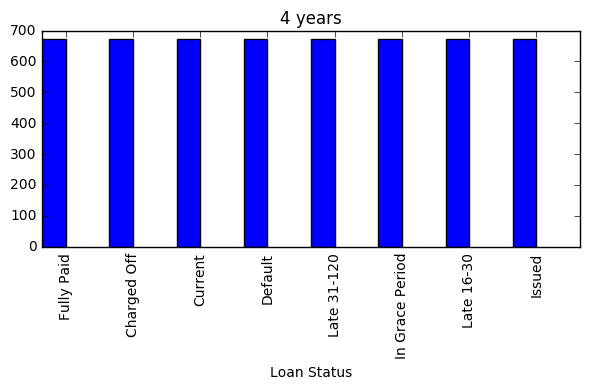

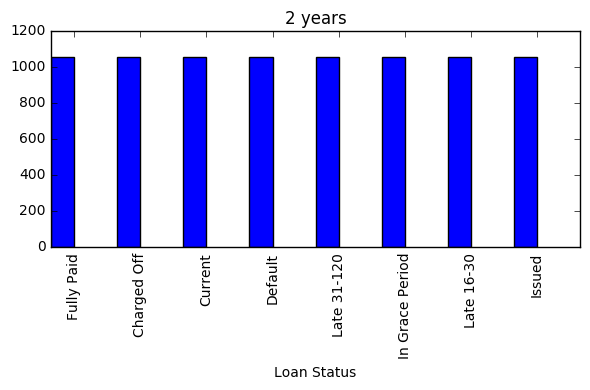

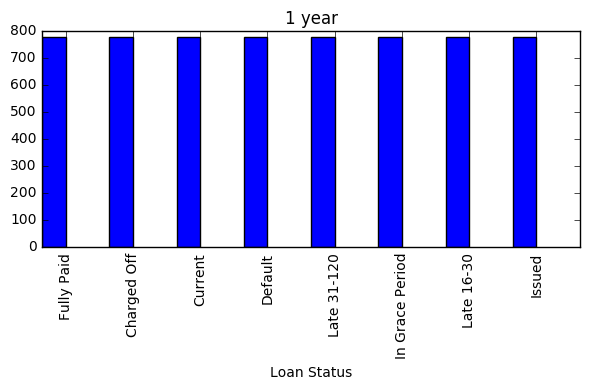

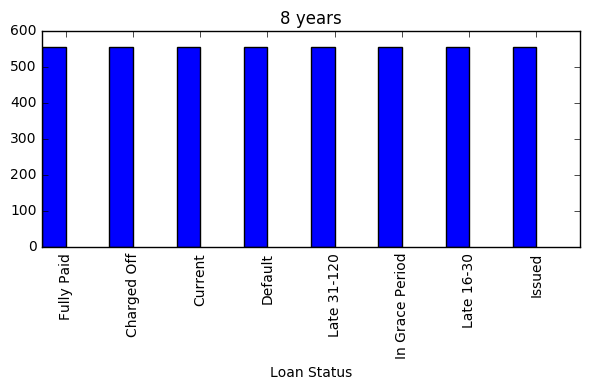

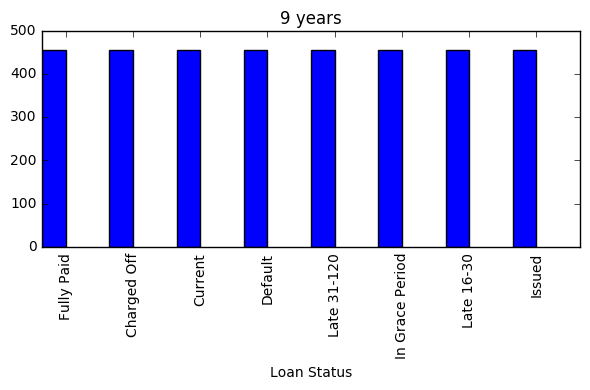

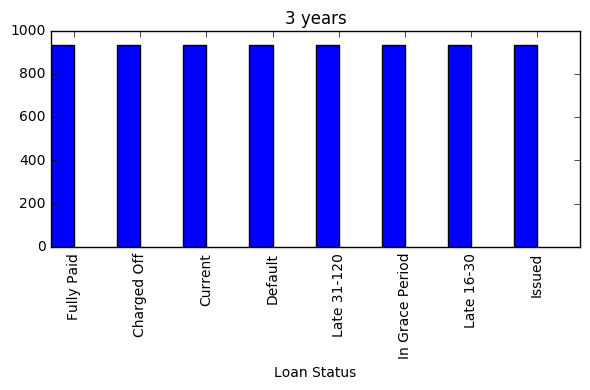

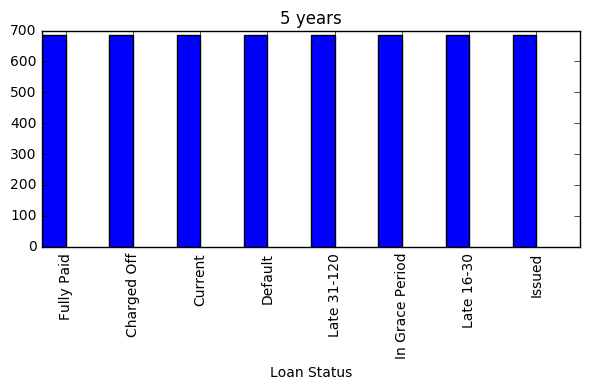

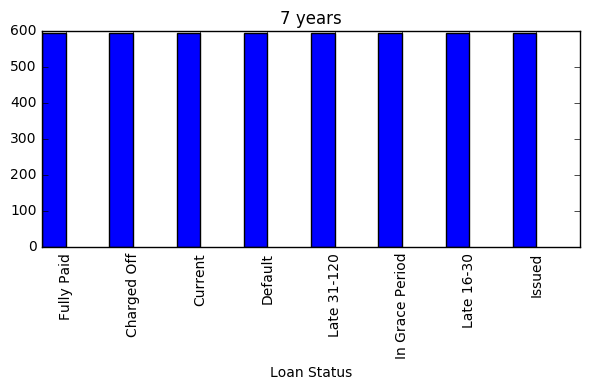

In [54]:
#mod_stat_keys
n_groups = 8
index = np.arange(n_groups)
for i in index:
    labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']

    y = [fully_paid_list[i], charged_off_list[i], current_list[i], default_list[i], late_31_list[i], in_grace_per_list[i], late_16_list[i], issued_list[i]]

    fig = plt.figure()
    bar_width = 0.35
    ax = plt.subplot(111)
    ax.set_title(keys_list[i])
    ax.bar(index, y, width= bar_width, color ='blue')
#     ax.bar(index + bar_width, y2, width=bar_width, color ='blue', label = '60 months')
    plt.xticks(index + bar_width, labels, rotation='vertical')
#     plt.legend(bbox_to_anchor=(1.35, 1))
    plt.xlabel('Loan Status')
    plt.tight_layout()
    plt.show()

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
'term', 'int_rate', 'installment', 'emp_title','emp_length', 'home_ownership', 
'annual_inc','verification_status',
'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
'collections_12_mths_ex_med', 'mths_since_last_major_derog',
'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [55]:
# loan_data['loan_status'].unique()

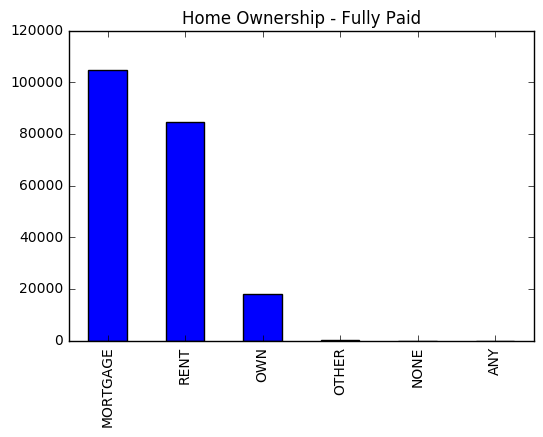

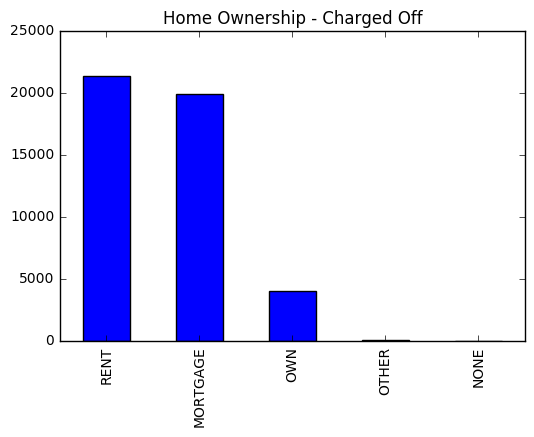

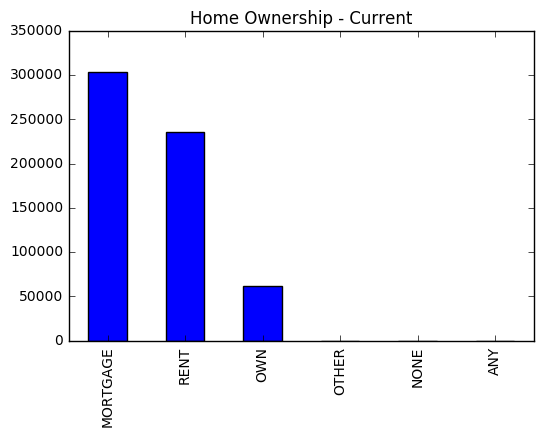

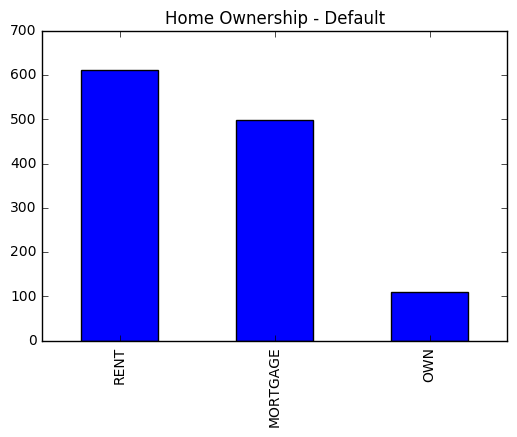

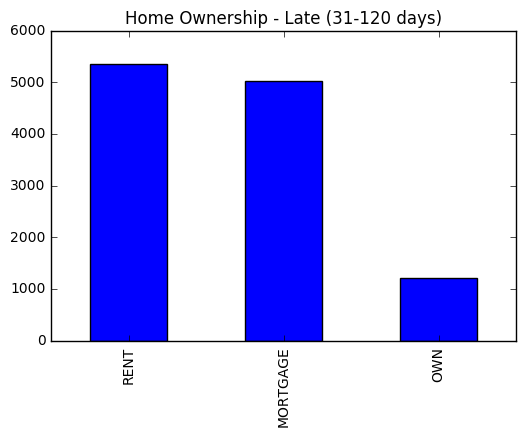

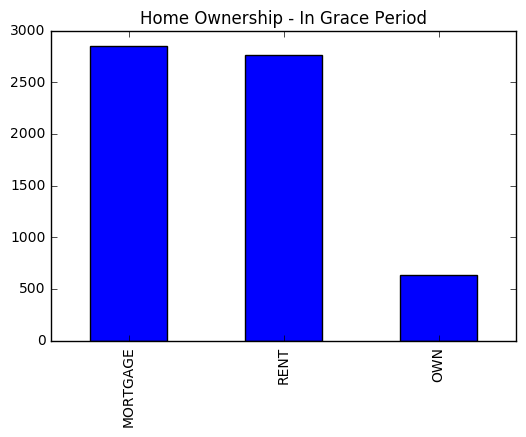

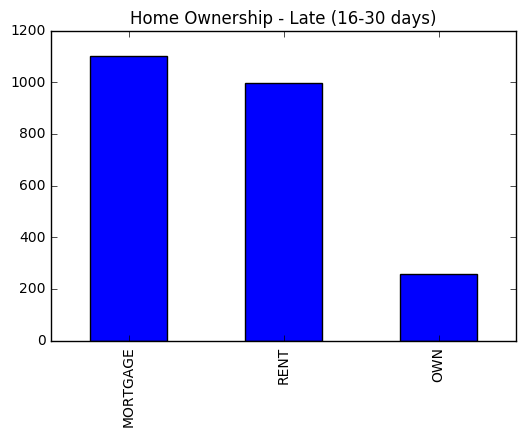

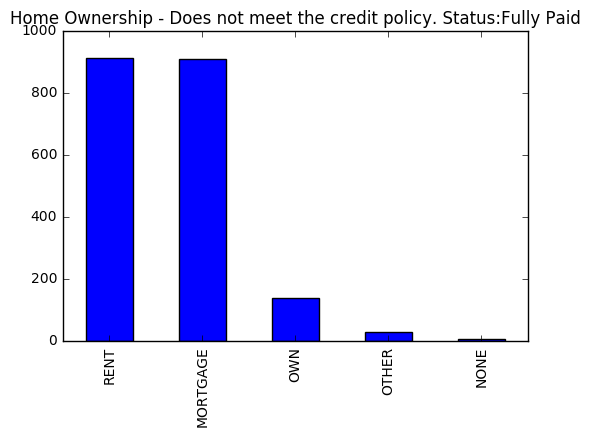

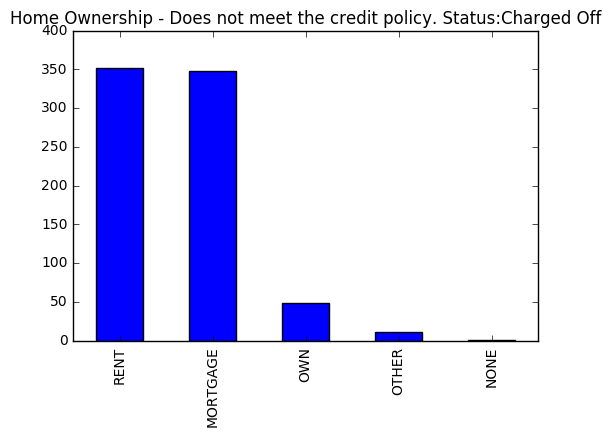

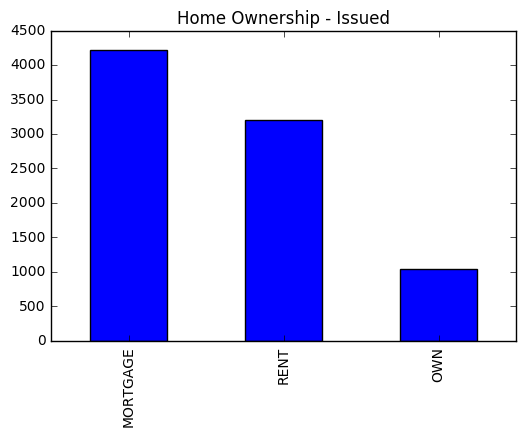

In [56]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['home_ownership'].value_counts().plot(kind='bar', title = 'Home Ownership - {}'.format(i))
    plt.show()

max annual income for fully-paid: 1650000.0
max annual income for charged-off: 8706582.0
max annual income for current: 9500000.0
max annual income for default: 1300000.0
max annual income for late_31: 600000.0
max annual income for in-grace-per: 7141778.0
max annual income for late_16: 3964280.0
max annual income for issued: 8900060.0


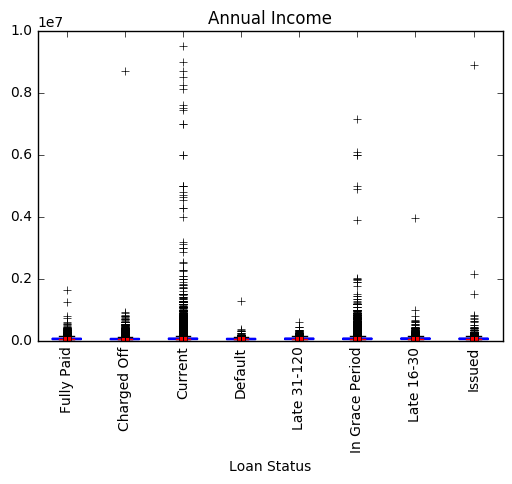

In [57]:
sorted_input =  sorted(list(zip(x_df.annual_inc, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]

fully_paid = grouped_dict[0]['items']
print('max annual income for fully-paid:', max(fully_paid))

charged_off = grouped_dict[1]['items']
print('max annual income for charged-off:', max(charged_off))

current = grouped_dict[2]['items']
print('max annual income for current:', max(current))

default = grouped_dict[3]['items']
print('max annual income for default:', max(default))

late_31 = grouped_dict[4]['items']
print('max annual income for late_31:', max(late_31))

in_grace_per = grouped_dict[5]['items']
print('max annual income for in-grace-per:', max(in_grace_per))

late_16 = grouped_dict[6]['items']
print('max annual income for late_16:', max(late_16))

issued = grouped_dict[7]['items']
print('max annual income for issued:', max(issued))

x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Annual Income')

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
'term', 'int_rate', 'installment', 'emp_title','emp_length', 'home_ownership', 
'annual_inc', 'verification_status','issue_d', 'pymnt_plan', 'url', 

'desc', (hold on - sentiment analysis like above), 'purpose', 'title', 

'zip_code',
'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
'collections_12_mths_ex_med', 'mths_since_last_major_derog',
'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [58]:
x_df['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'new kitchen for momma!', 'New Baby and New House (CC Consolidate)',
       'Credit Card/Auto Repair'], dtype=object)

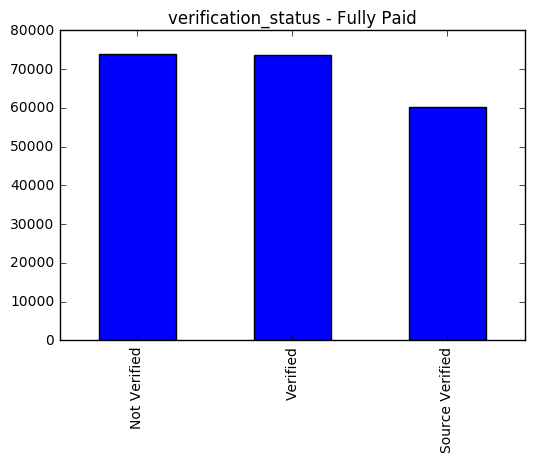

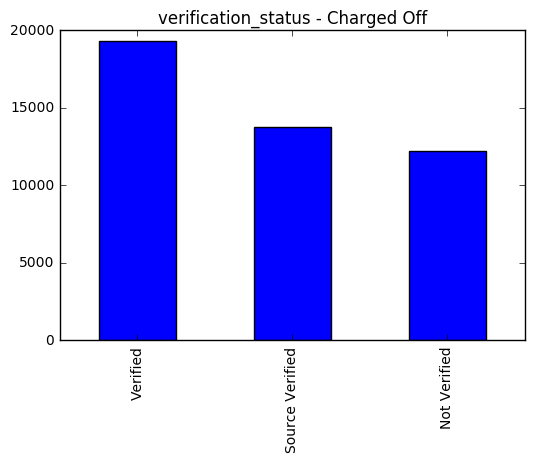

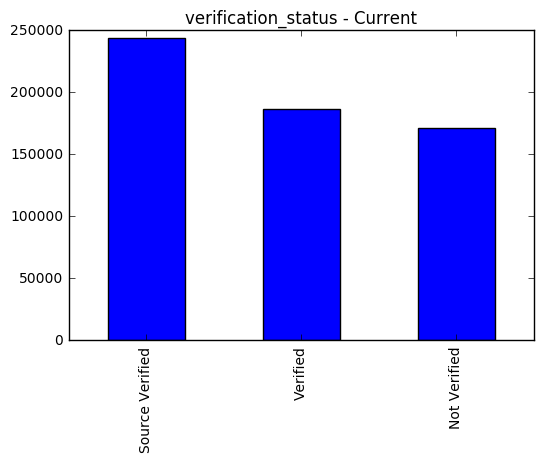

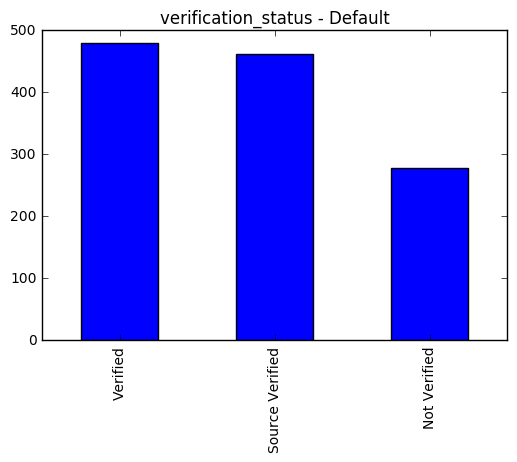

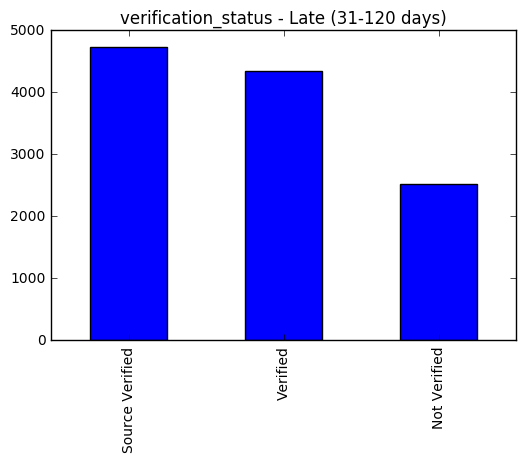

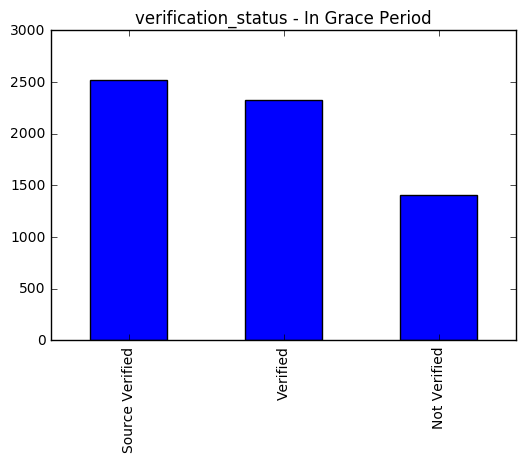

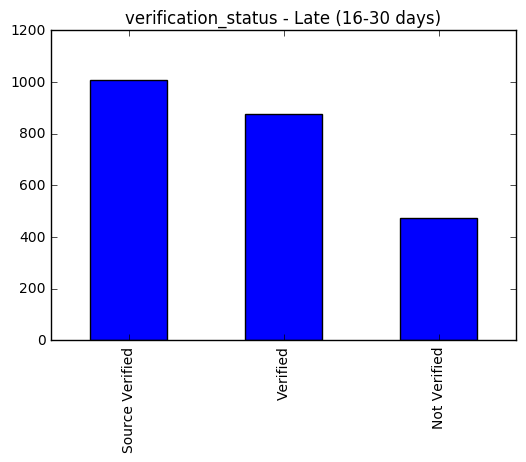

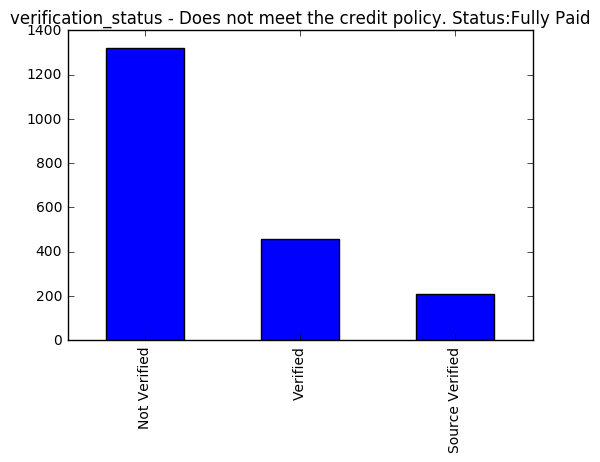

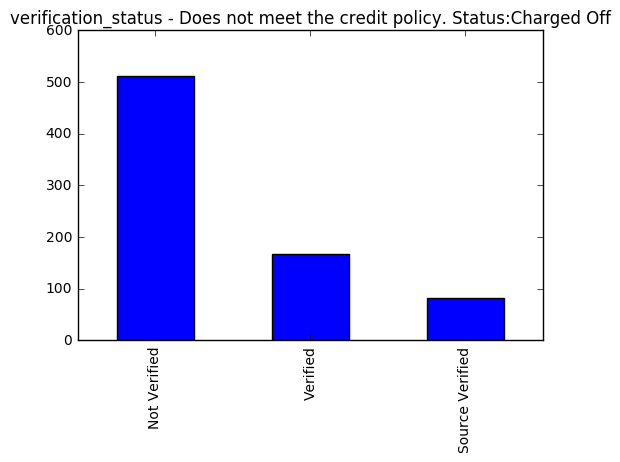

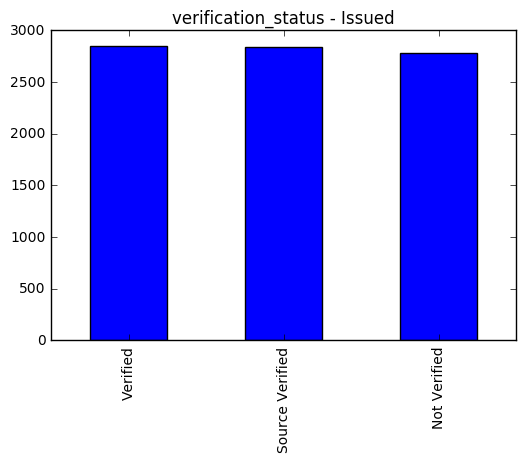

In [59]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['verification_status'].value_counts().plot(kind='bar', title = 'verification_status - {}'.format(i))
    plt.show()

In [60]:
loan_des.loc[loan_des['LoanStatNew'] == 'issue_d'].iloc[:,1]

25    The month which the loan was funded
Name: Description, dtype: object

In [61]:
# x_df['issue_d']

In [62]:
times = []
for i in x_df['issue_d']:
    d = datetime.datetime.strptime(i, "%b-%Y")
    today = datetime.datetime.now()
    time_d = today - d
    times.append(time_d.days/30.4368499)

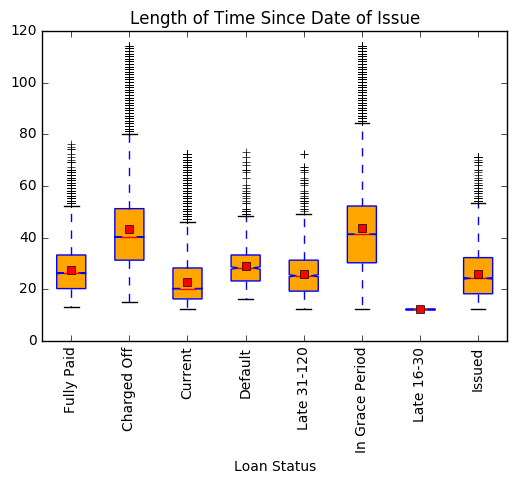

In [63]:
sorted_input =  sorted(list(zip(times, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Length of Time Since Date of Issue')

In [64]:
x_df['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

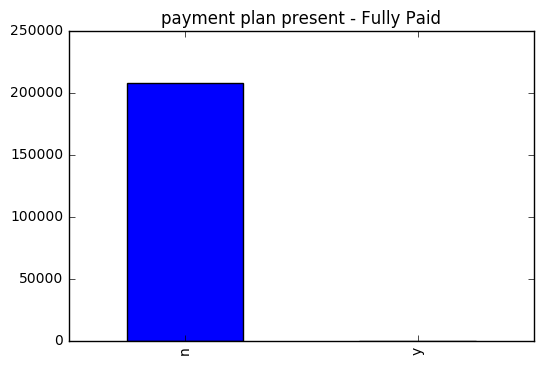

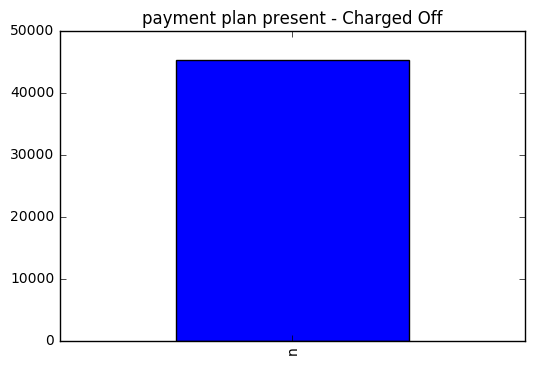

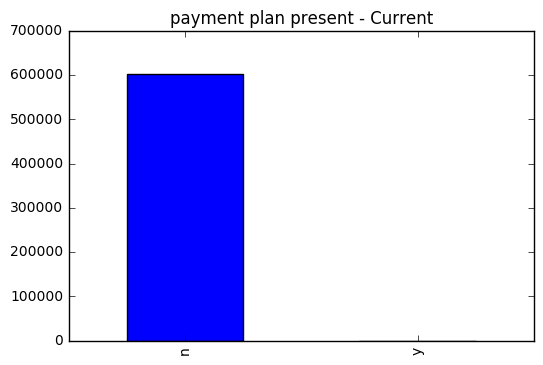

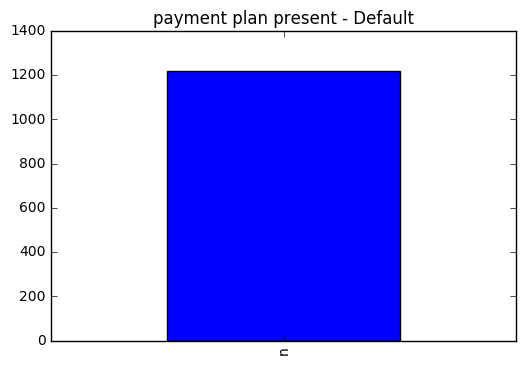

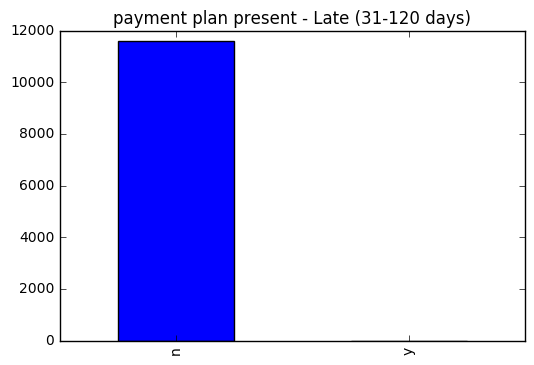

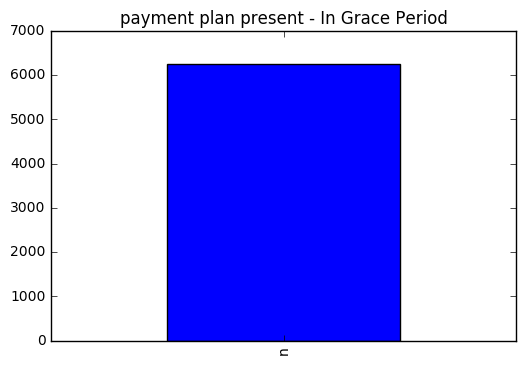

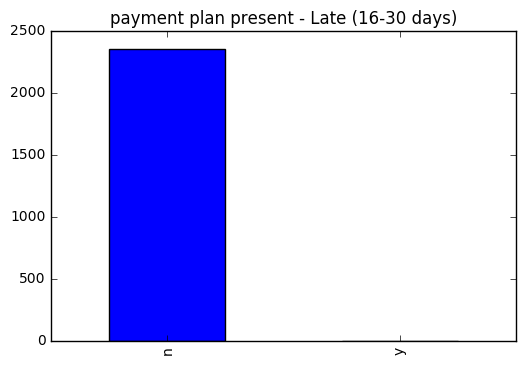

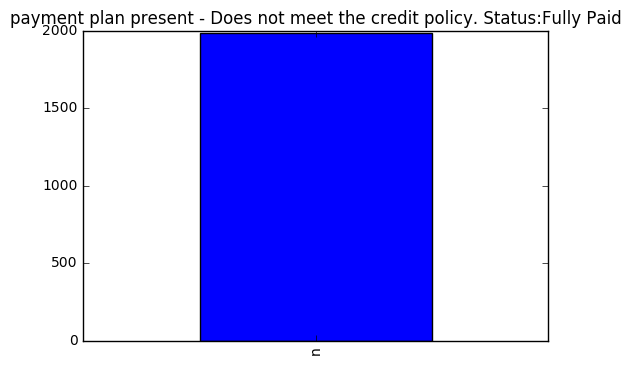

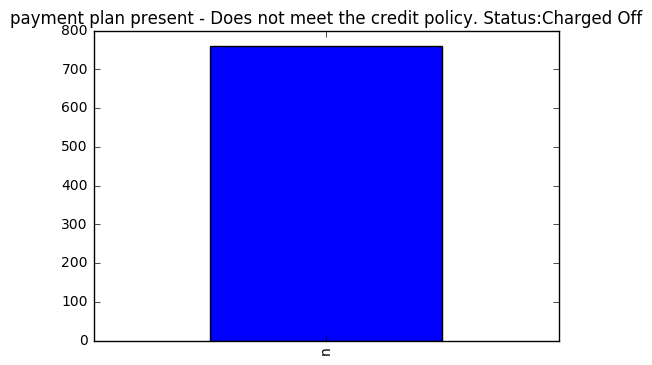

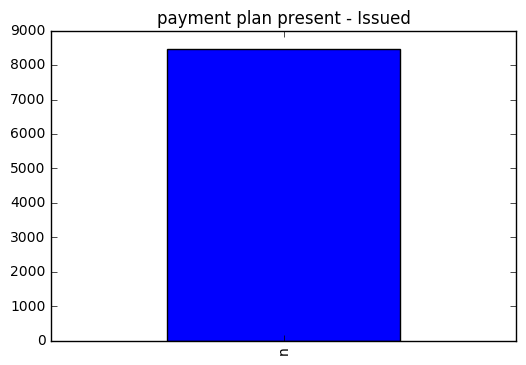

In [65]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['pymnt_plan'].value_counts().plot(kind='bar', title = 'payment plan present - {}'.format(i))
    plt.show()

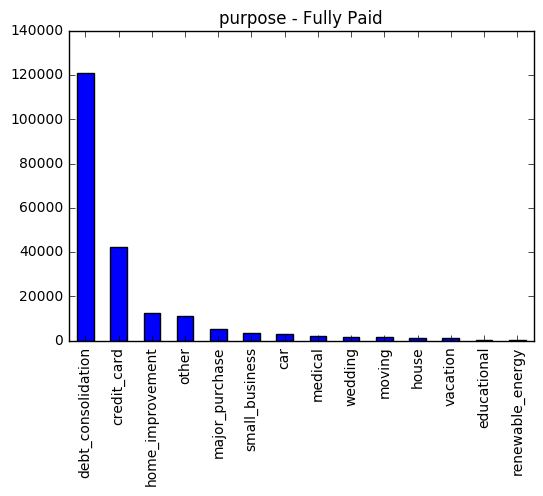

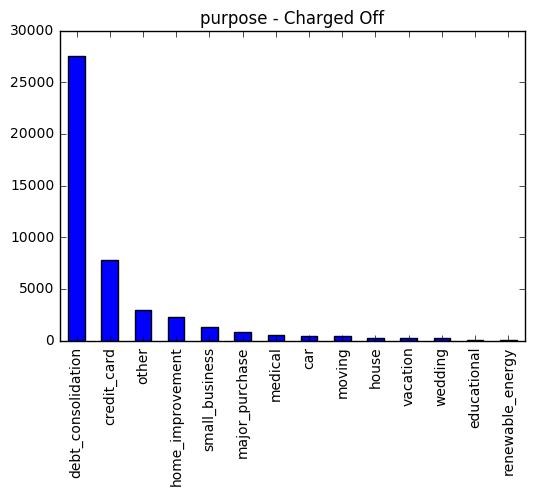

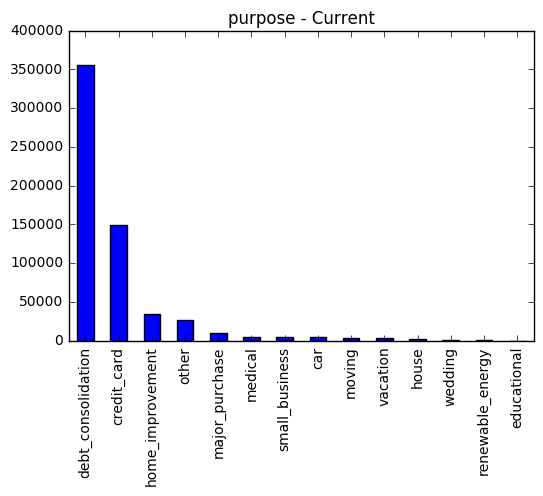

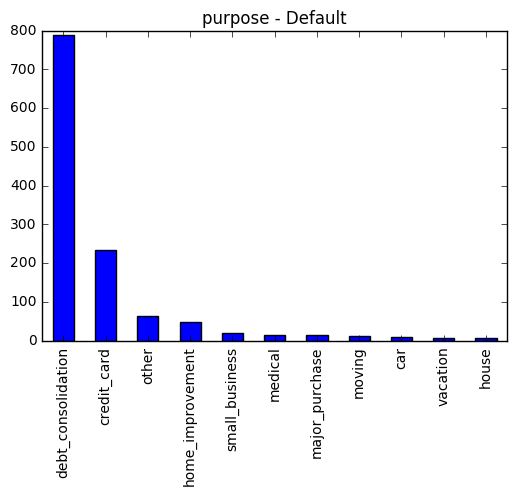

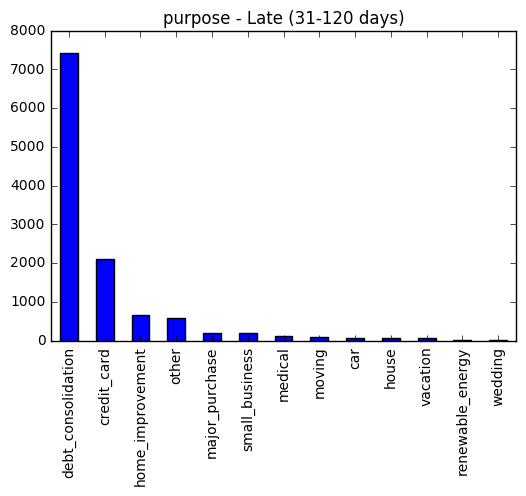

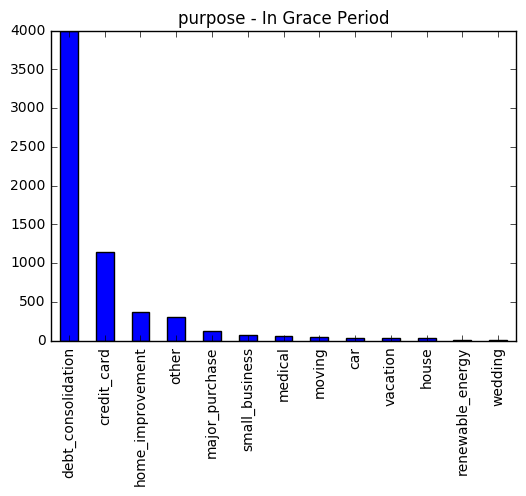

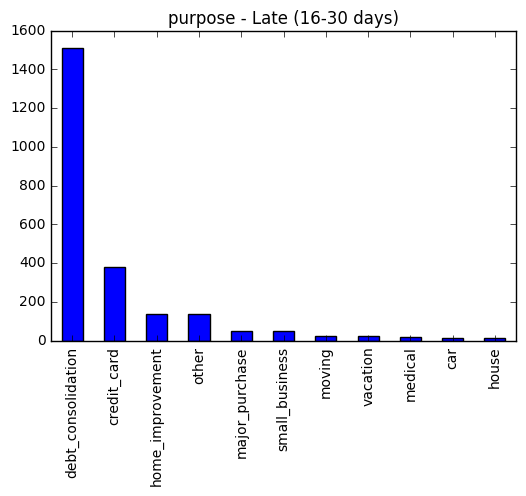

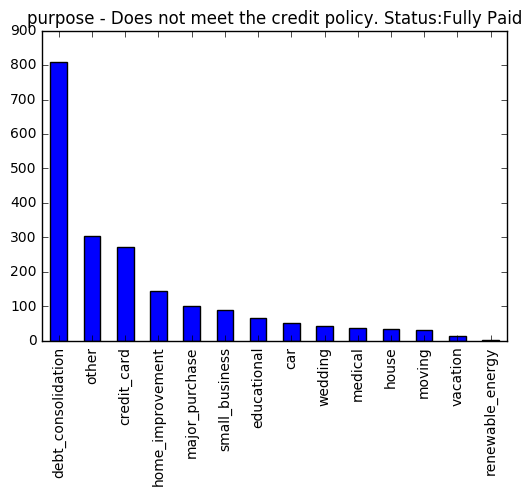

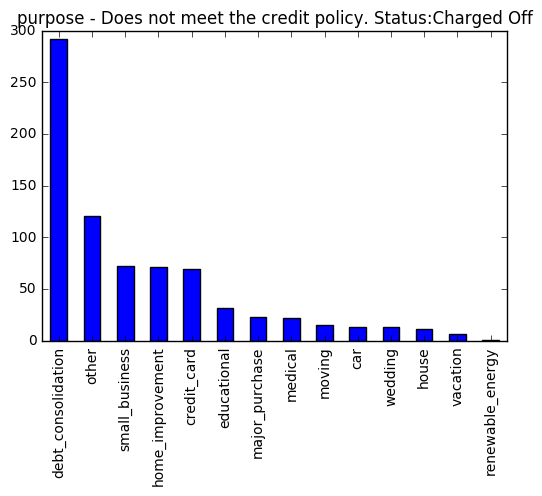

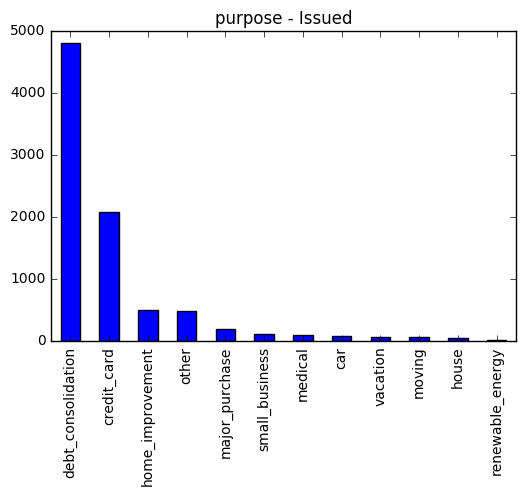

In [66]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['purpose'].value_counts().plot(kind='bar', title = 'purpose - {}'.format(i))
    plt.show()

range of title lengths: 33 - 1
mean of title lengths: 2.240898195697667


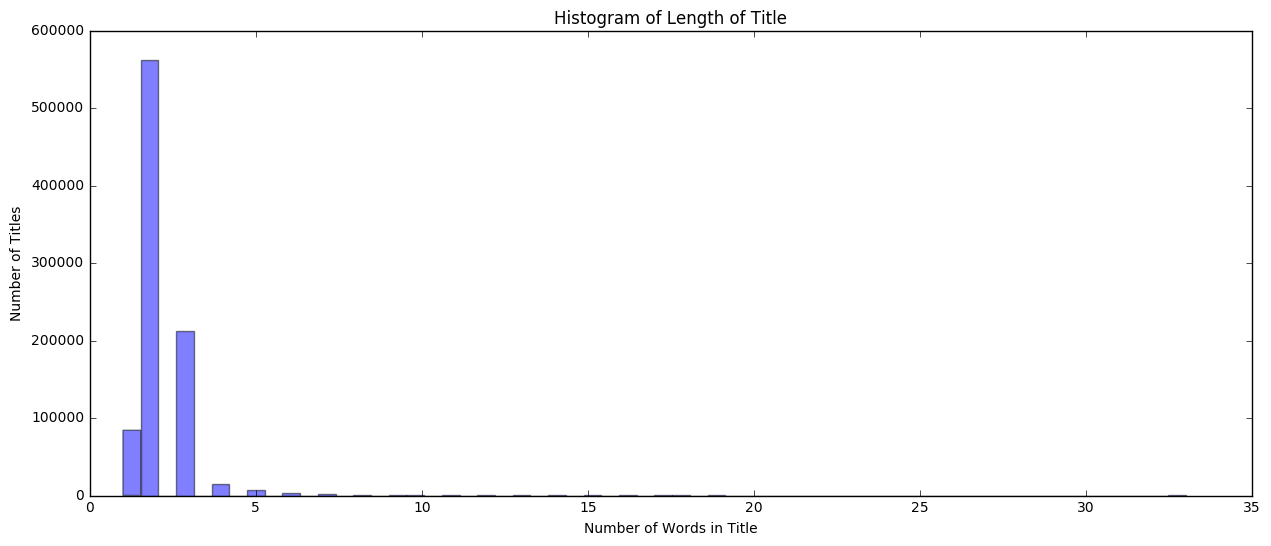

data shape: (10000, 1958)
some features: ['00', '000', '02', '05', '07', '08', '0809healthbills', '081011', '09', '10']
[(3201, 'loan'), (3041, 'consolidation'), (2994, 'debt'), (1323, 'credit'), (1024, 'card'), (486, 'home'), (473, 'personal'), (334, 'pay'), (328, 'improvement'), (311, 'payoff'), (306, 'business'), (244, 'cards'), (207, 'wedding'), (197, 'refinance'), (189, 'car'), (188, 'small'), (154, 'consolidate'), (153, 'medical'), (150, 'cc'), (139, 'purchase')]


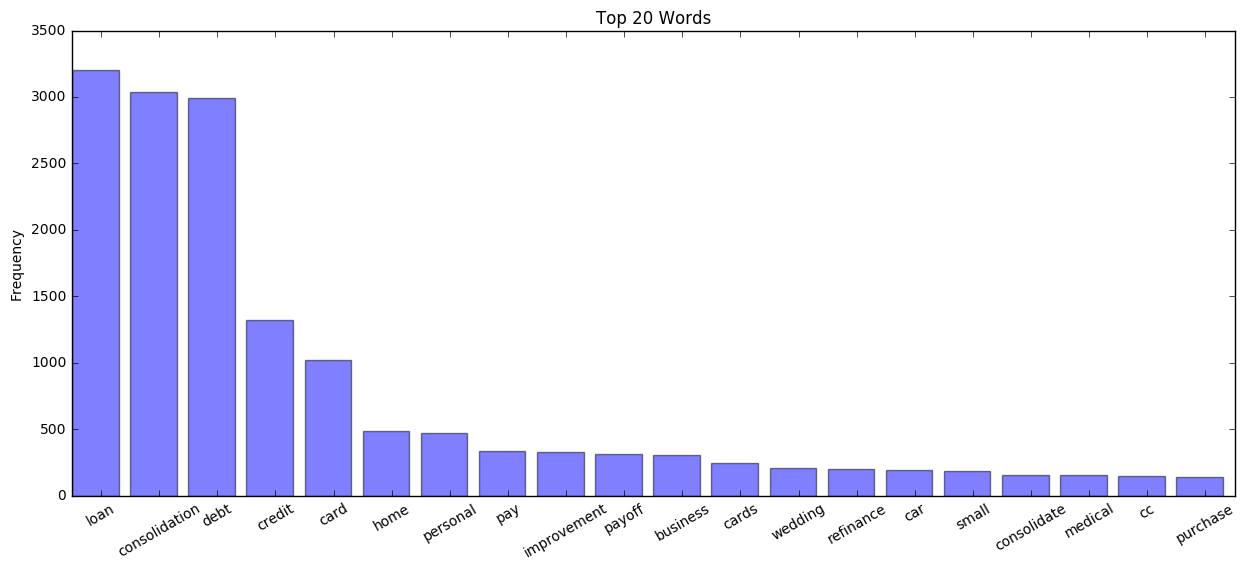

classes labels: ['Charged Off' 'Current' 'Default' 'Fully Paid' 'In Grace Period'
 'Late (16-30 days)' 'Late (31-120 days)']
transformed labels: [3 0 3 3 1 3 1 3 0 0]
number in Charged off: 1517
number in Current: 956
number in Default: 2
number in Fully paid: 7487
number in In Grace Period: 8
number in Issued: 6
number in Late_16: 24
number in Late_31: 0
[(484, 'debt'), (479, 'loan'), (476, 'consolidation'), (160, 'credit'), (115, 'card'), (83, 'personal'), (77, 'business'), (70, 'home'), (54, 'pay'), (54, 'small'), (49, 'improvement'), (45, 'payoff'), (33, 'cards'), (30, 'medical'), (26, 'car'), (21, 'refinance'), (21, 'wedding'), (19, 'bills'), (19, 'freedom'), (17, 'free')]
2332
[(342, 'loan'), (318, 'consolidation'), (309, 'debt'), (92, 'credit'), (71, 'card'), (58, 'home'), (49, 'personal'), (43, 'business'), (40, 'improvement'), (31, 'small'), (26, 'pay'), (20, 'cards'), (18, 'payoff'), (17, 'wedding'), (15, 'cc'), (15, 'medical'), (12, 'car'), (11, 'consolidate'), (11, 'free'),

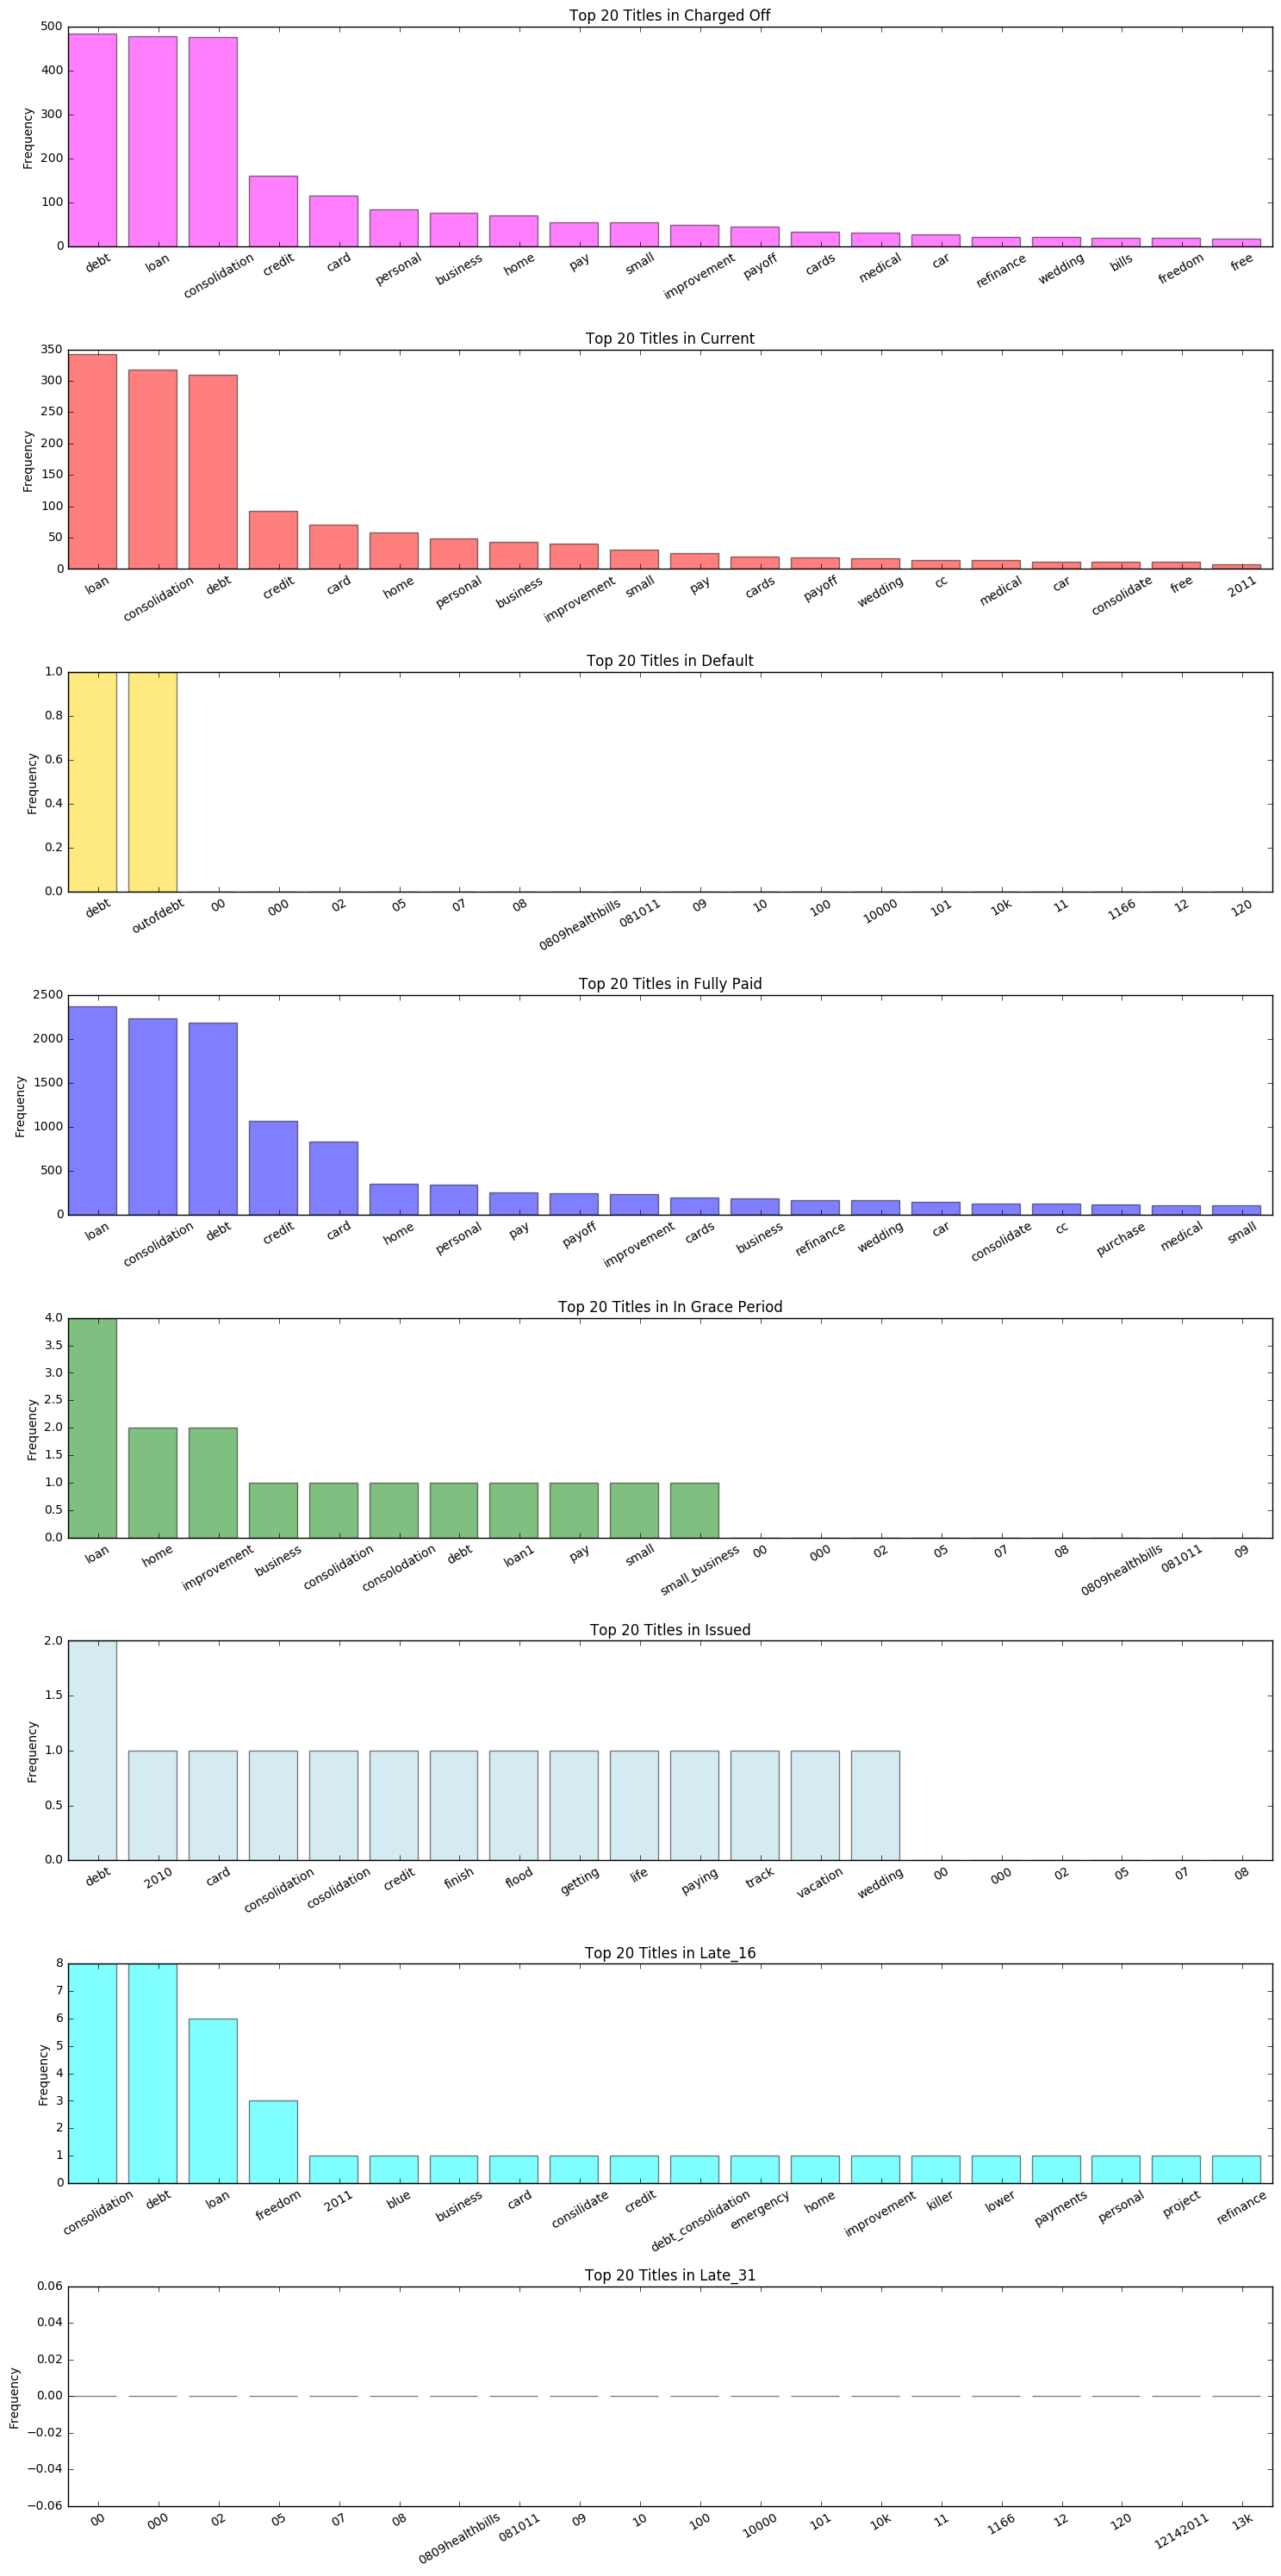

In [188]:
#Break each posts into words and count the number of words
lengths = x_df['title'].apply(lambda x: len(x.split(' ')))

print( 'range of title lengths:', np.max(lengths), '-', np.min(lengths))
print( 'mean of title lengths:', np.mean(lengths))

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

#Histogram of the word counts in each post
ax.hist(lengths, color='blue', bins=60, alpha=0.5)

ax.set_xlabel('Number of Words in Title')
ax.set_ylabel('Number of Titles')
ax.set_title('Histogram of Length of Title')

plt.show()
#Create a text vectorizer (turns text into array of numbers)
#using a common list of English stop words
vectorizer = CountVectorizer(stop_words='english', min_df=1)

#Get all the text from data
corpus = x_df['title'][0:10000].values
# len(corpus)
#Turn each text into an array of word counts
x = vectorizer.fit_transform(corpus)

x = x.toarray()

#Get the names of all the words we're counting
feature_names = vectorizer.get_feature_names()

print ('data shape:', x.shape)
print ('some features:', feature_names[0:10])
#Number of top words
n = 20

#Count the number of time each word occurs in the entire dataset
word_freq = x.sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Print the top n words and their frequencies
print (top_words)
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

#Number of bars to use
indices = np.arange(n)
#Where to put the label under each bar
width = 0.5
#Bar plot of the frequencies of the top words
ax.bar(indices, [word[0] for word in top_words], color='blue', alpha=0.5)

ax.set_ylabel('Frequency')
ax.set_title('Top ' + str(n) + ' Words')

#Label the bars with the top words
ax.set_xticks(indices + width)
ax.set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

plt.show()
shortened_df_title =  pd.concat([pd.Series(x_df['title'][0:10000].values),(pd.Series(y_df[0:10000]))], axis=1)
#Encode the class labels as numbers
labels = shortened_df_title.loan_status.values
enc_label = LabelEncoder()
y = enc_label.fit_transform(labels)
#Print the class labels
print( 'classes labels:', enc_label.classes_)
#Print the labels for our dataset after encoding them as numbers
print ('transformed labels:', y[:10])
#Print the number of employment titles in each class
print ('number in Charged off:', len(y[y == 0]))
print ('number in Current:', len(y[y == 1]))
print( 'number in Default:', len(y[y == 2]))
print ('number in Fully paid:', len(y[y == 3]))
print ('number in In Grace Period:', len(y[y == 4]))
print ('number in Issued:', len(y[y == 5]))
print ('number in Late_16:', len(y[y == 6]))
print ('number in Late_31:', len(y[y == 7]))
fig, ax = plt.subplots(8, 1, figsize=(15, 30))
#Number of top words
n = 20
#Number of bars to use
indices = np.arange(n)
#Where to put the label under each bar
width = 0.5

#Count the number of time each word occurs in "Charged Off"
word_freq = x[y == 0].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[0].bar(indices, [word[0] for word in top_words], color='magenta', alpha=0.5)

ax[0].set_ylabel('Frequency')
ax[0].set_title('Top ' + str(n) + ' Titles in Charged Off')

#Label the bars with the top words
ax[0].set_xticks(indices + width)
ax[0].set_xticklabels([word[1] for word in top_words])
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

#Turn the labels sideways so they don't overlap
labels = ax[0].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in the Current
word_freq = x[y == 1].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[1].bar(indices, [word[0] for word in top_words], color='red', alpha=0.5)

ax[1].set_ylabel('Frequency')
ax[1].set_title('Top ' + str(n) + ' Titles in Current')

#Label the bars with the top words
ax[1].set_xticks(indices + width)
ax[1].set_xticklabels([word[1] for word in top_words])
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

#Turn the labels sideways so they don't overlap
labels = ax[1].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in Default
word_freq = x[y == 2].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[2].bar(indices, [word[0] for word in top_words], color='gold', alpha=0.5)

ax[2].set_ylabel('Frequency')
ax[2].set_title('Top ' + str(n) + ' Titles in Default')

#Label the bars with the top words
ax[2].set_xticks(indices + width)
ax[2].set_xticklabels([word[1] for word in top_words])
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

#Turn the labels sideways so they don't overlap
labels = ax[2].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in Fully Paid
word_freq = x[y == 3].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[3].bar(indices, [word[0] for word in top_words], color='blue', alpha=0.5)

ax[3].set_ylabel('Frequency')
ax[3].set_title('Top ' + str(n) + ' Titles in Fully Paid')

#Label the bars with the top words
ax[3].set_xticks(indices + width)
ax[3].set_xticklabels([word[1] for word in top_words])
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

#Turn the labels sideways so they don't overlap
labels = ax[3].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in In Grace Period
word_freq = x[y == 4].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[4].bar(indices, [word[0] for word in top_words], color='green', alpha=0.5)

ax[4].set_ylabel('Frequency')
ax[4].set_title('Top ' + str(n) + ' Titles in In Grace Period')

#Label the bars with the top words
ax[4].set_xticks(indices + width)
ax[4].set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax[4].get_xticklabels()
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

plt.setp(labels, rotation=30, fontsize=10)



#Count the number of time each word occurs in Issued
word_freq = x[y == 5].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[5].bar(indices, [word[0] for word in top_words], color='lightblue', alpha=0.5)

ax[5].set_ylabel('Frequency')
ax[5].set_title('Top ' + str(n) + ' Titles in Issued')

#Label the bars with the top words
ax[5].set_xticks(indices + width)
ax[5].set_xticklabels([word[1] for word in top_words])
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

#Turn the labels sideways so they don't overlap
labels = ax[5].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in Late_16
word_freq = x[y == 6].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[6].bar(indices, [word[0] for word in top_words], color='cyan', alpha=0.5)

ax[6].set_ylabel('Frequency')
ax[6].set_title('Top ' + str(n) + ' Titles in Late_16')

#Label the bars with the top words
ax[6].set_xticks(indices + width)
ax[6].set_xticklabels([word[1] for word in top_words])
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

#Turn the labels sideways so they don't overlap
labels = ax[6].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in Late_31
word_freq = x[y == 7].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[7].bar(indices, [word[0] for word in top_words], color='orange', alpha=0.5)

ax[7].set_ylabel('Frequency')
ax[7].set_title('Top ' + str(n) + ' Titles in Late_31')

#Label the bars with the top words
ax[7].set_xticks(indices + width)
ax[7].set_xticklabels([word[1] for word in top_words])
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

#Turn the labels sideways so they don't overlap
labels = ax[7].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)


plt.tight_layout()
plt.show()

In [189]:
print (484/2332)
print (479/2332)
print (476/2332)

print(2370/11571)
print(2237/11571)
print(2189/11571)

print(4/16)
print(2/16)
print(2/16)

print(8/41)
print(8/41)
print(6/41)

0.20754716981132076
0.20540308747855918
0.20411663807890223
0.20482240082966036
0.19332814795609715
0.18917984616714198
0.25
0.125
0.125
0.1951219512195122
0.1951219512195122
0.14634146341463414


['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
'term', 'int_rate', 'installment', 'emp_title','emp_length', 'home_ownership', 
'annual_inc', 'verification_status','issue_d', 'pymnt_plan', 'url', 
'desc', (hold on - sentiment analysis like above), 'purpose', 'title', 'zip_code', 'addr_state', 


'dti', 

'delinq_2yrs', 'earliest_cr_line',
'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
'collections_12_mths_ex_med', 'mths_since_last_major_derog',
'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [68]:
# x_df['dti']

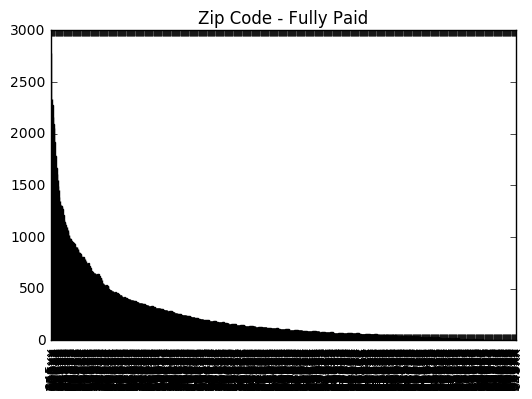

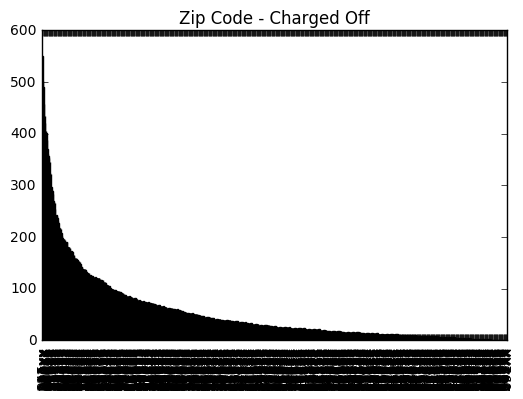

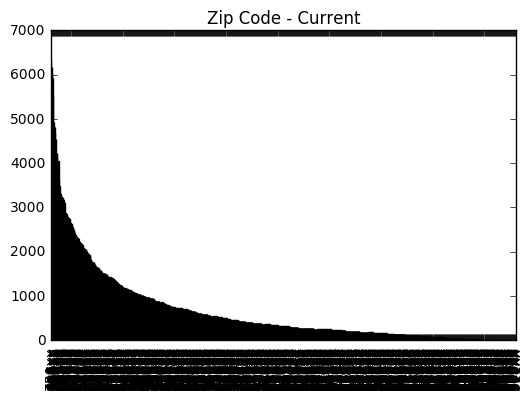

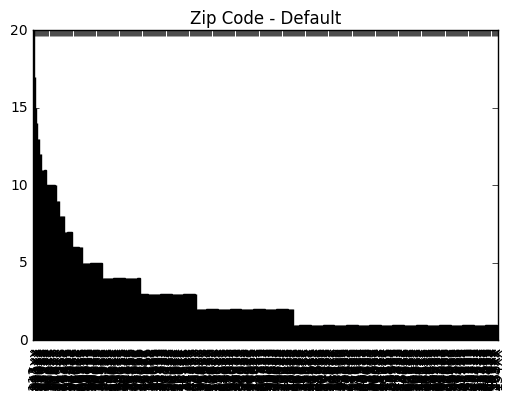

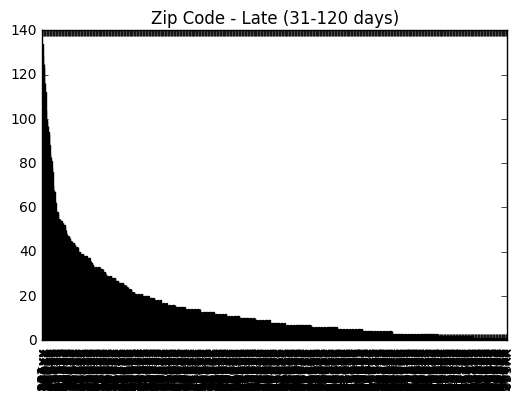

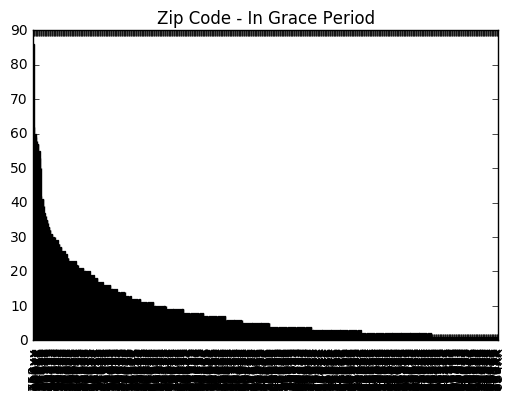

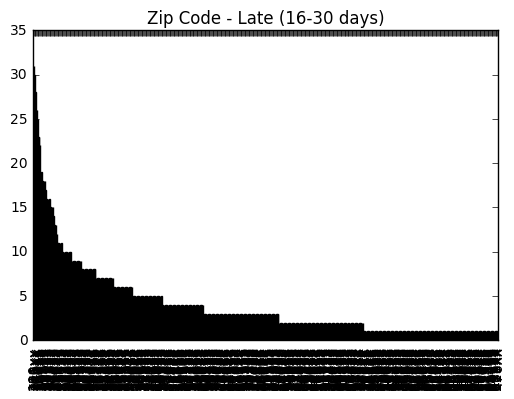

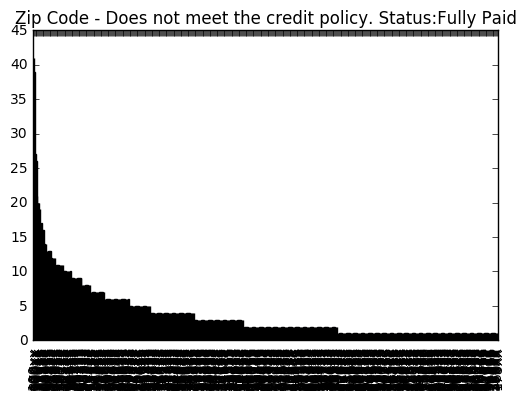

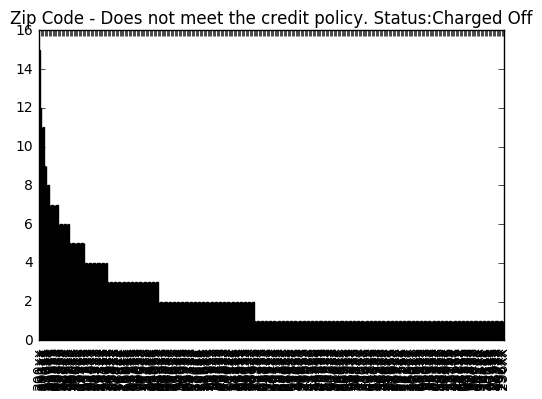

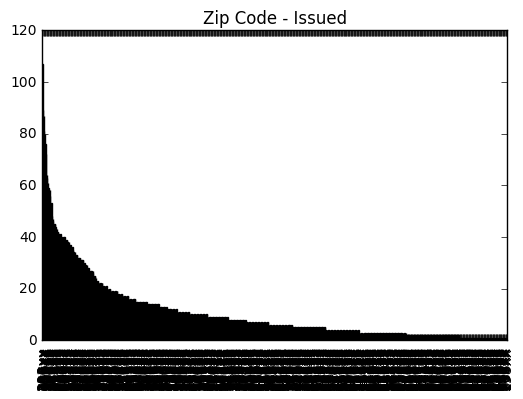

In [69]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['zip_code'].value_counts().plot(kind='bar', title = 'Zip Code - {}'.format(i))
    plt.show()

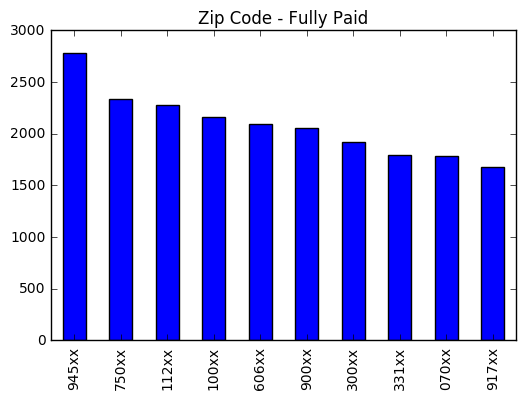

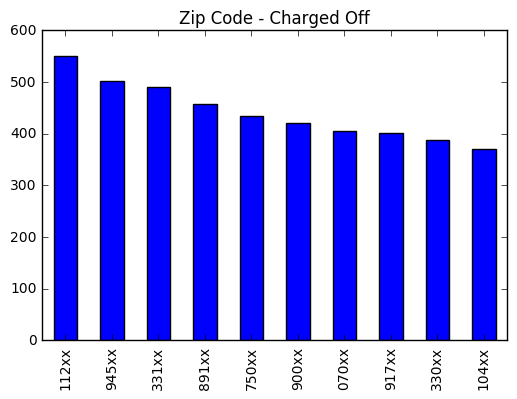

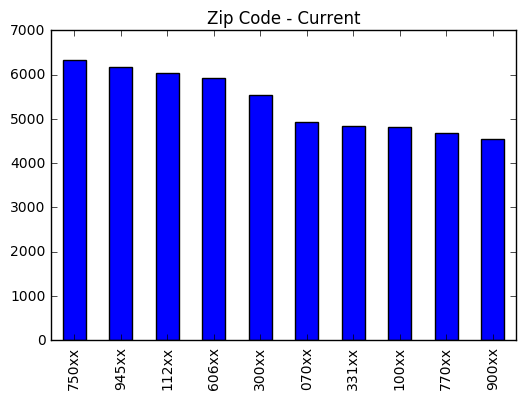

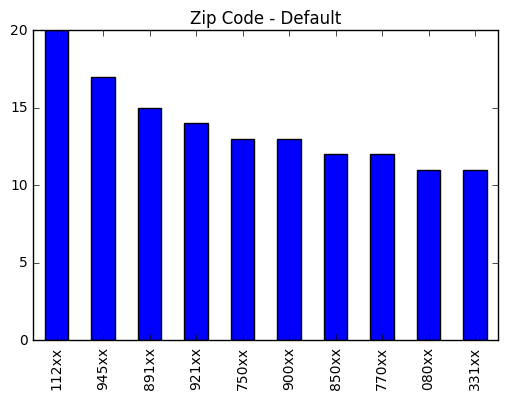

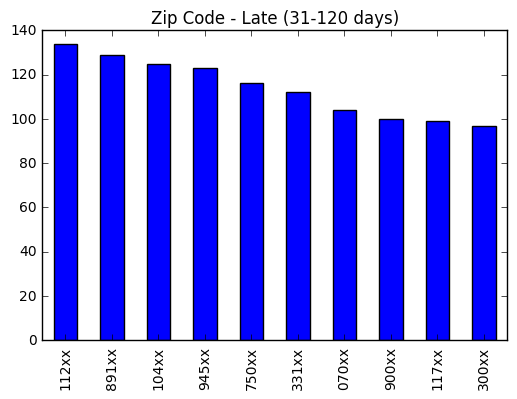

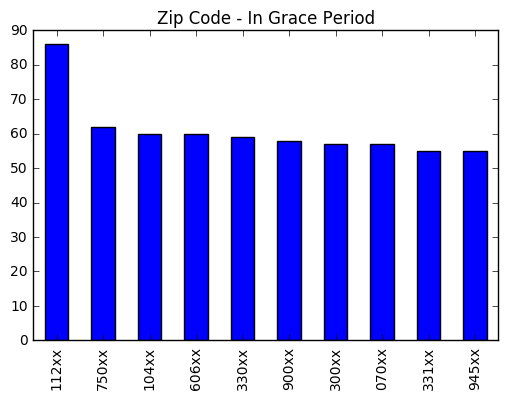

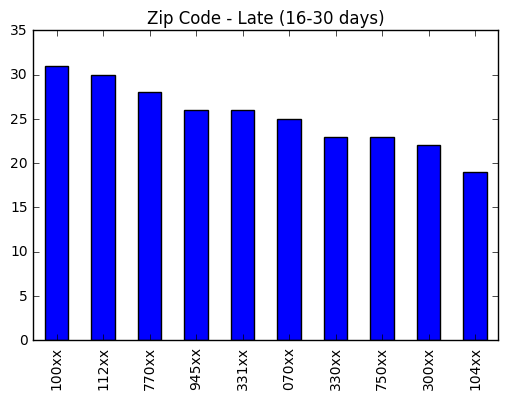

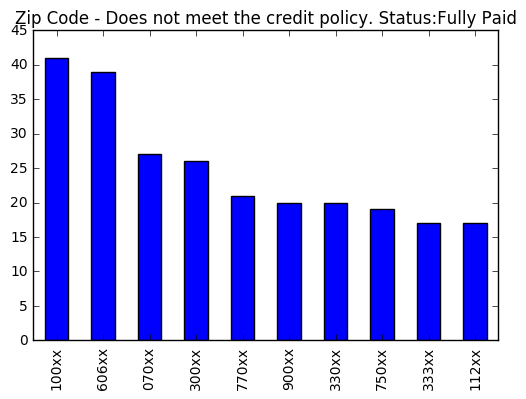

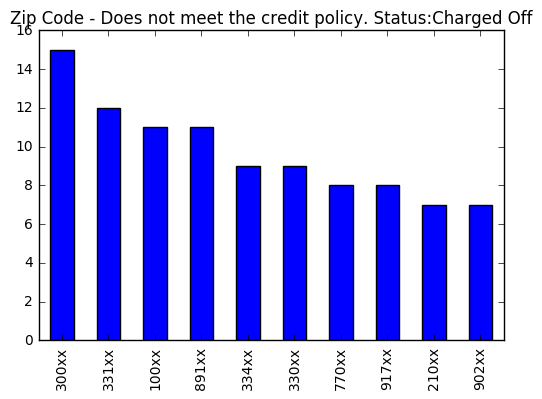

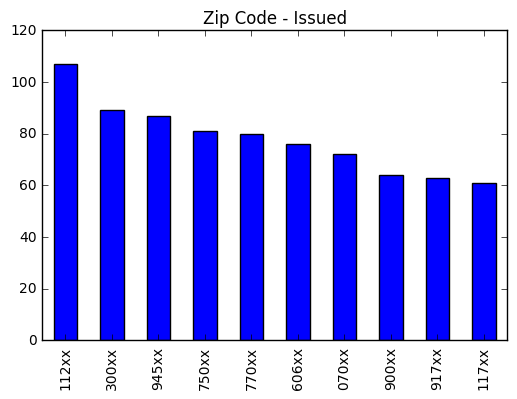

In [70]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['zip_code'].value_counts().nlargest(10).plot(kind='bar', title = 'Zip Code - {}'.format(i))
    plt.show()

### look up the zip codes

In [71]:
x_df['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME', 'ND'], dtype=object)

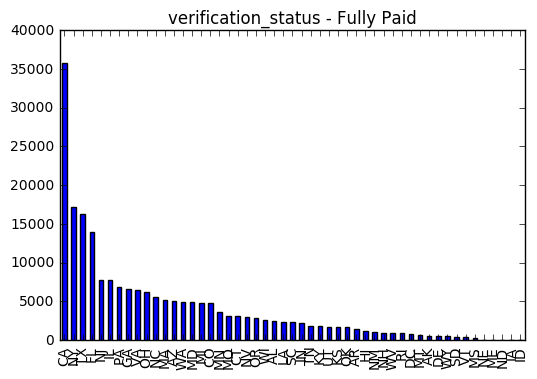

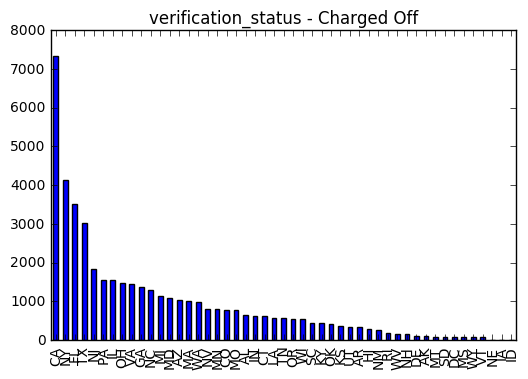

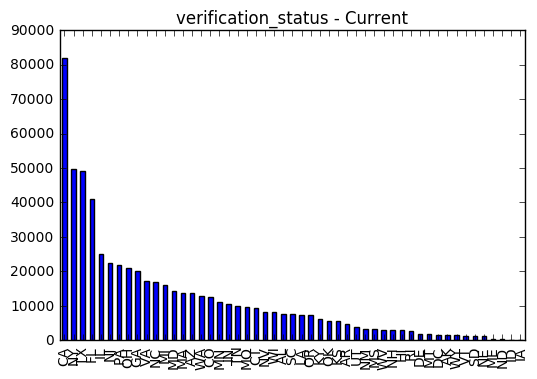

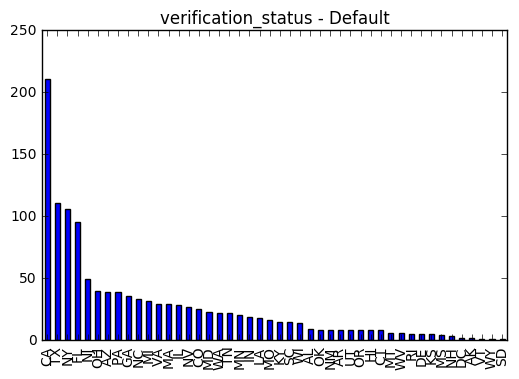

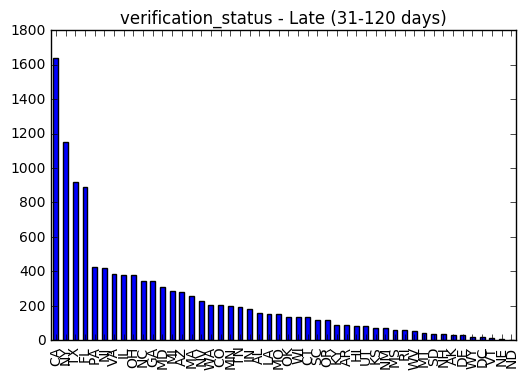

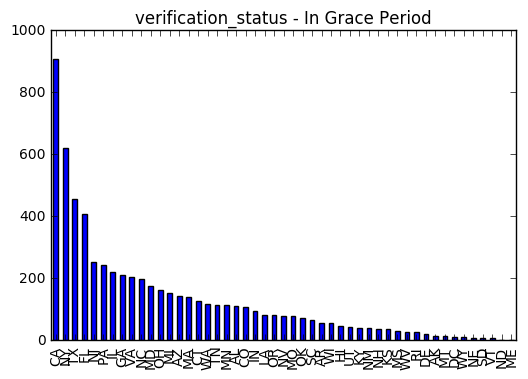

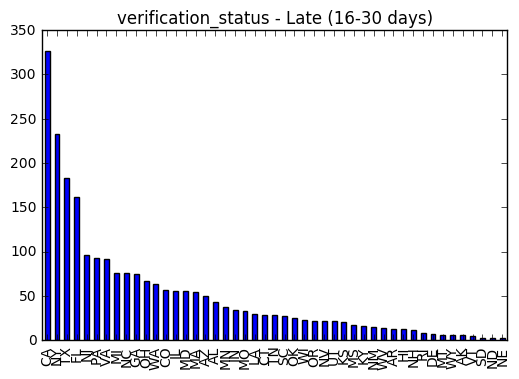

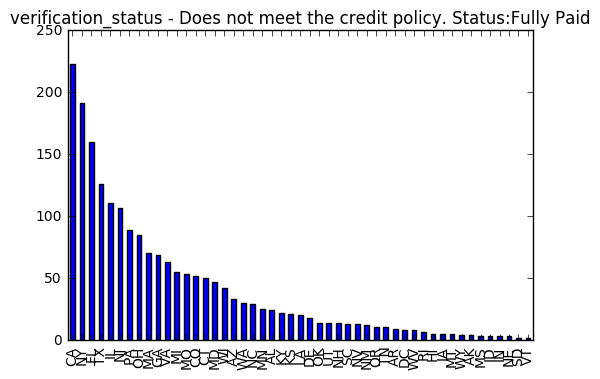

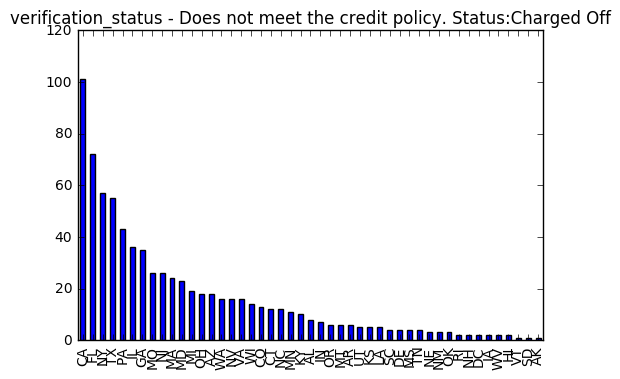

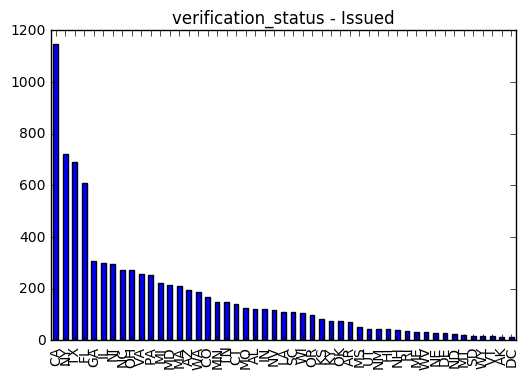

In [72]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['addr_state'].value_counts().plot(kind='bar', title = 'verification_status - {}'.format(i))
    plt.show()

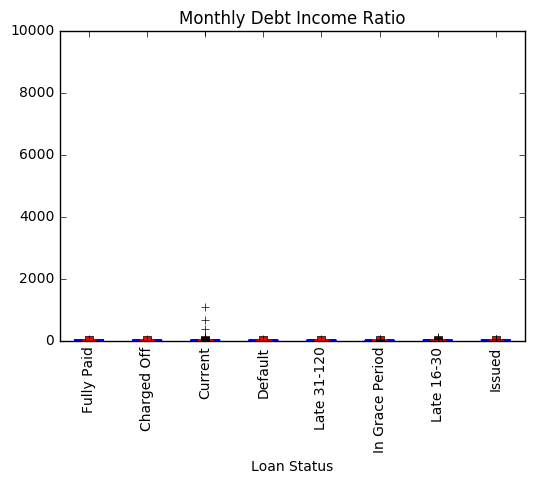

In [73]:
sorted_input =  sorted(list(zip(x_df.dti, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Monthly Debt Income Ratio')

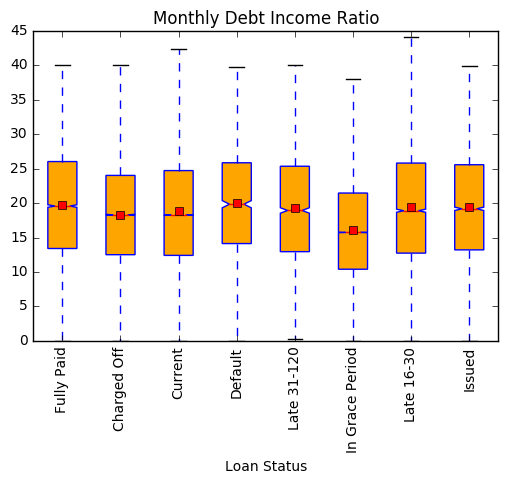

In [74]:
sorted_input =  sorted(list(zip(x_df.dti, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Monthly Debt Income Ratio')

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
'term', 'int_rate', 'installment', 'emp_title','emp_length', 'home_ownership', 
'annual_inc', 'verification_status','issue_d', 'pymnt_plan', 'url', 
'desc', (hold on - sentiment analysis like above), 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 
 
'earliest_cr_line',

'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
'collections_12_mths_ex_med', 'mths_since_last_major_derog',
'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

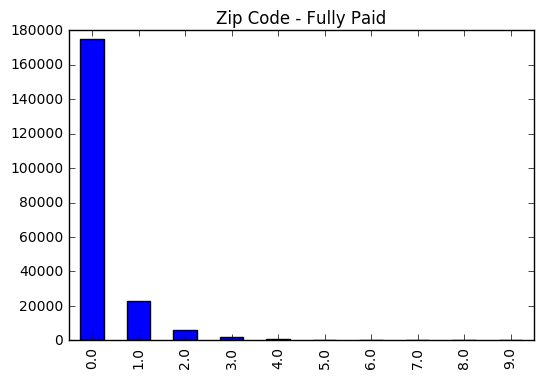

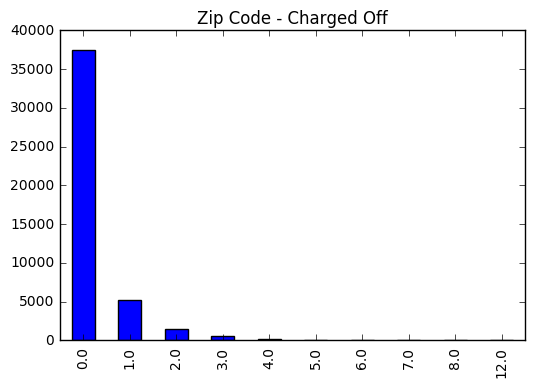

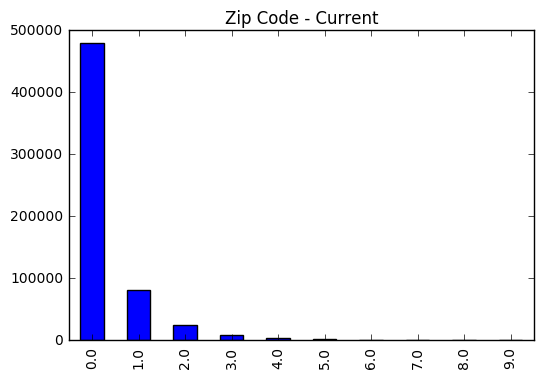

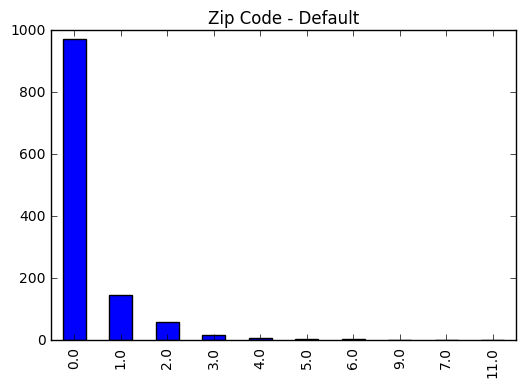

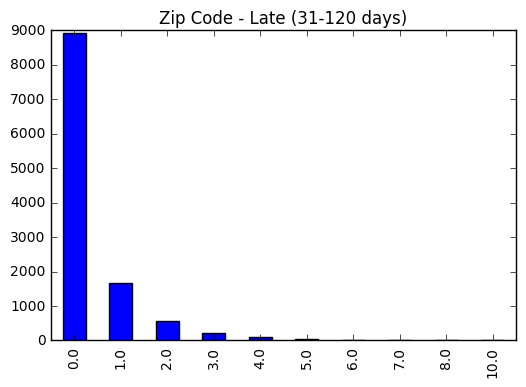

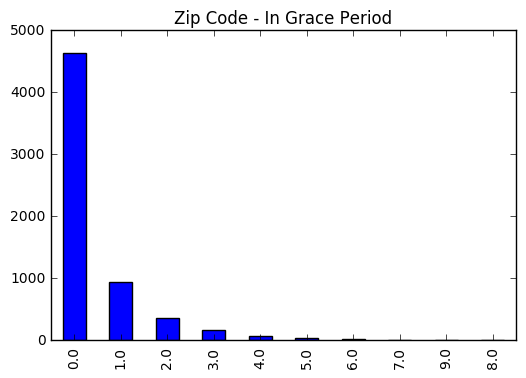

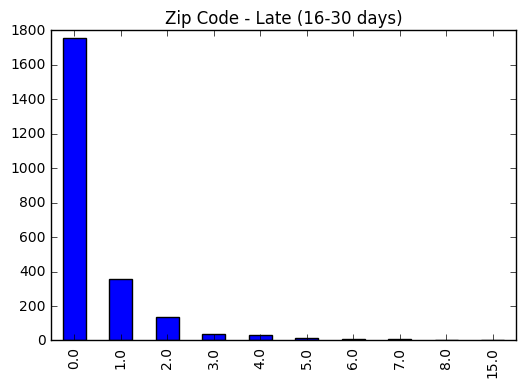

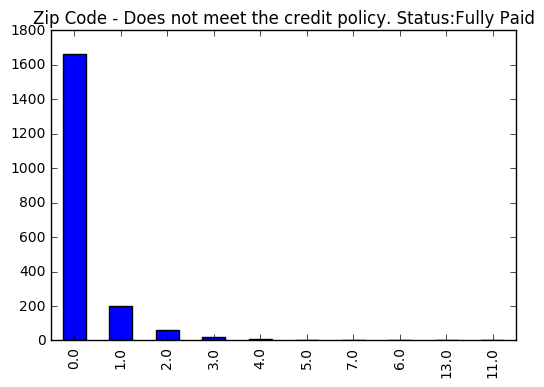

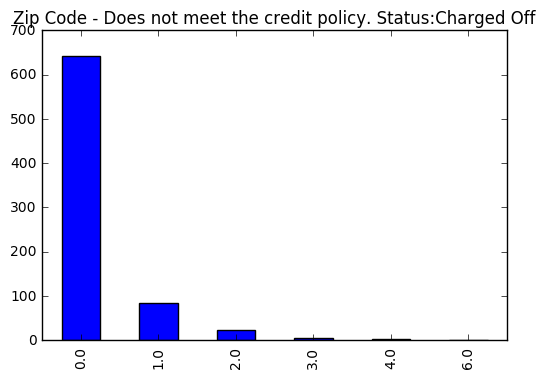

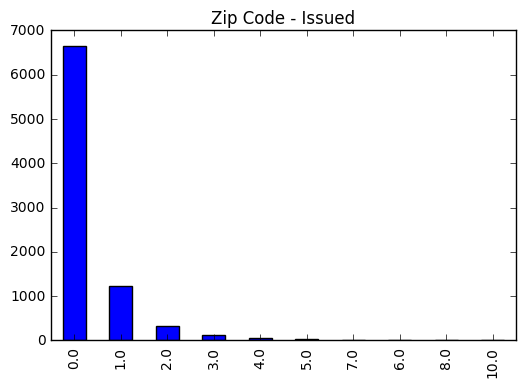

In [75]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['delinq_2yrs'].value_counts().nlargest(10).plot(kind='bar', title = 'Zip Code - {}'.format(i))
    plt.show()

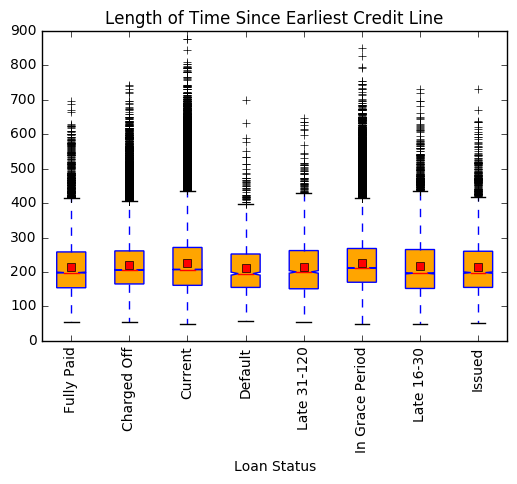

In [76]:
times = []
for i in x_df['earliest_cr_line']:
    d = datetime.datetime.strptime(i, "%b-%Y")
    today = datetime.datetime.now()
    time_d = today - d
    times.append(time_d.days/30.4368499)
sorted_input =  sorted(list(zip(times, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Length of Time Since Earliest Credit Line')

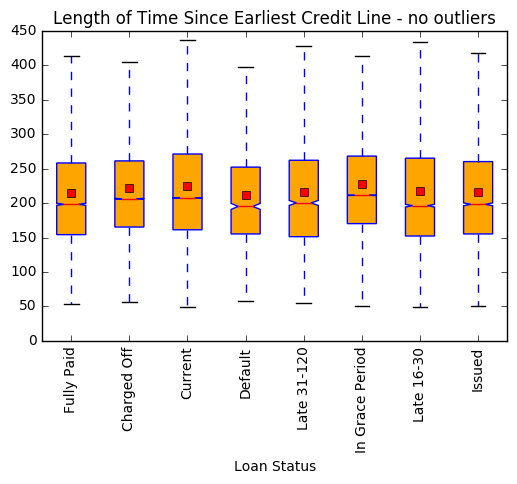

In [77]:
times = []
for i in x_df['earliest_cr_line']:
    d = datetime.datetime.strptime(i, "%b-%Y")
    today = datetime.datetime.now()
    time_d = today - d
    times.append(time_d.days/30.4368499)
sorted_input =  sorted(list(zip(times, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Length of Time Since Earliest Credit Line - no outliers')

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
'term', 'int_rate', 'installment', 'emp_title','emp_length', 'home_ownership', 
'annual_inc', 'verification_status','issue_d', 'pymnt_plan', 'url', 
'desc', (hold on - sentiment analysis like above), 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line','inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record','open_acc', 'pub_rec', 

'revol_bal', 

'revol_util', 'total_acc',
'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
'collections_12_mths_ex_med', 'mths_since_last_major_derog',
'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [78]:
print(len(x_df['revol_bal'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'revol_bal'].iloc[:,1]

73740


46    Total credit revolving balance
Name: Description, dtype: object

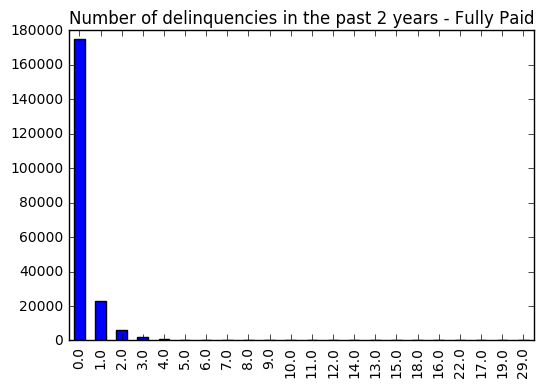

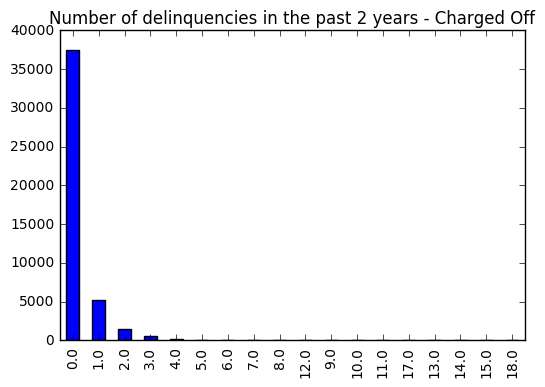

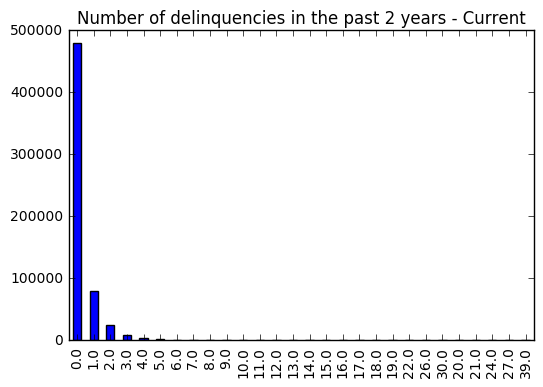

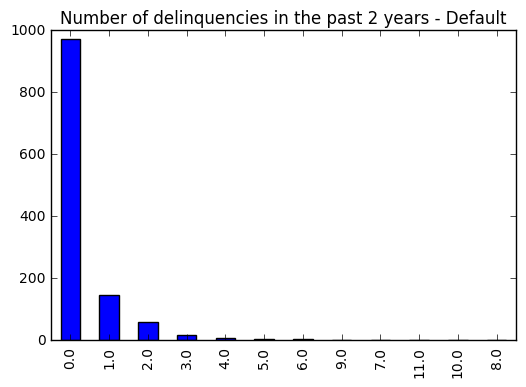

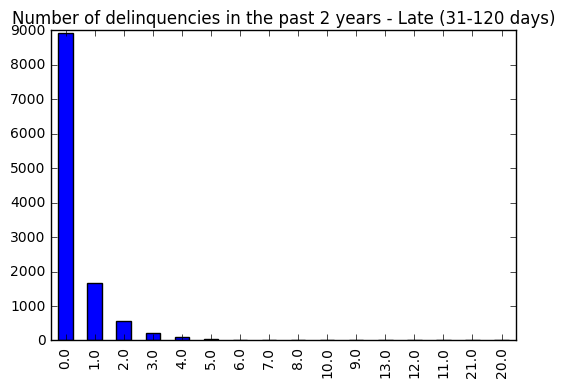

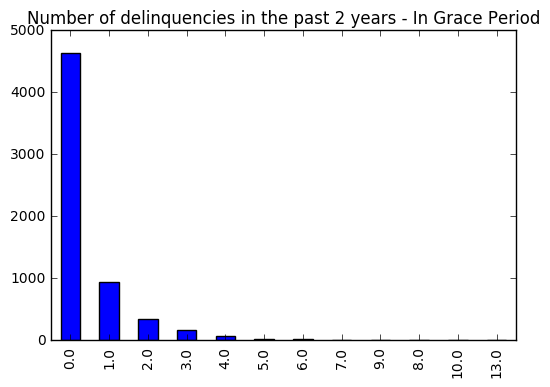

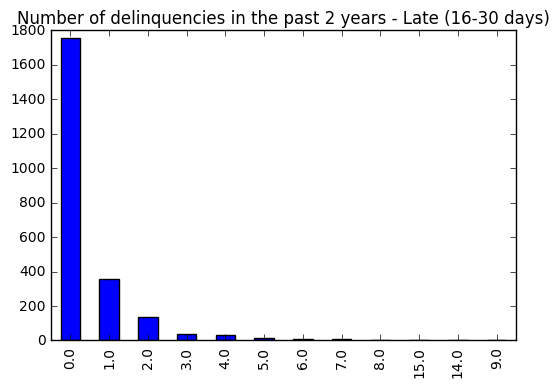

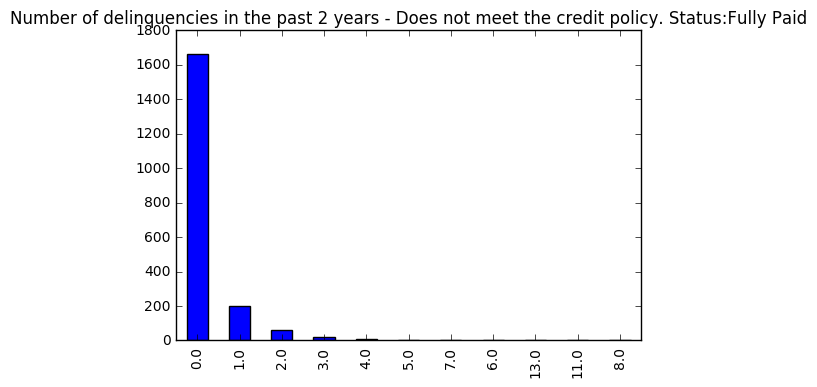

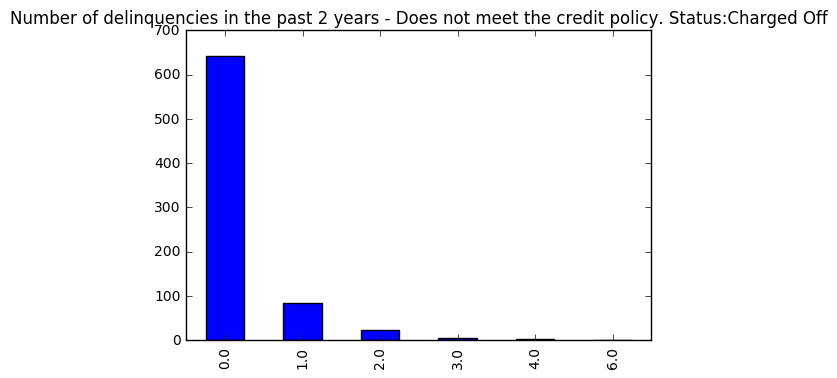

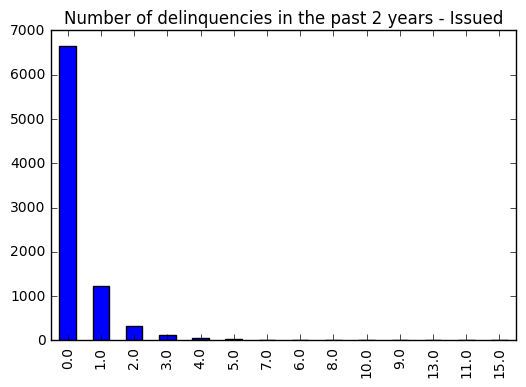

In [79]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['delinq_2yrs'].value_counts().plot(kind='bar', title = 'Number of delinquencies in the past 2 years - {}'.format(i))
    plt.show()

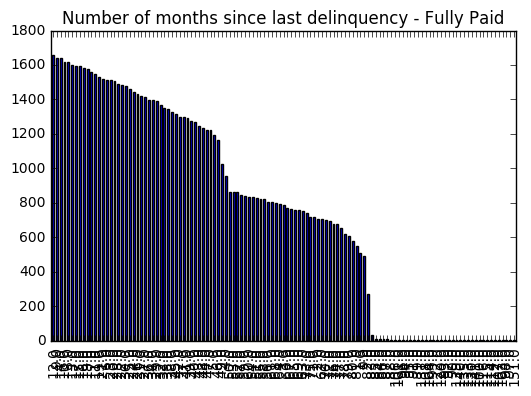

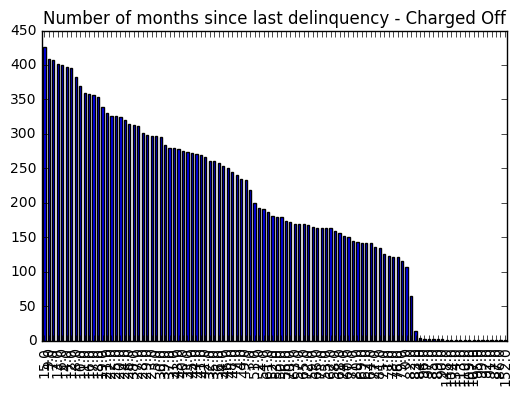

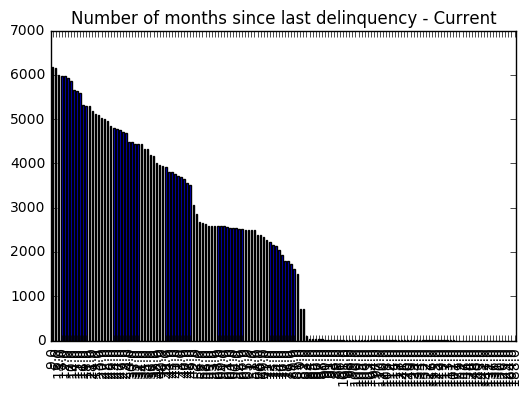

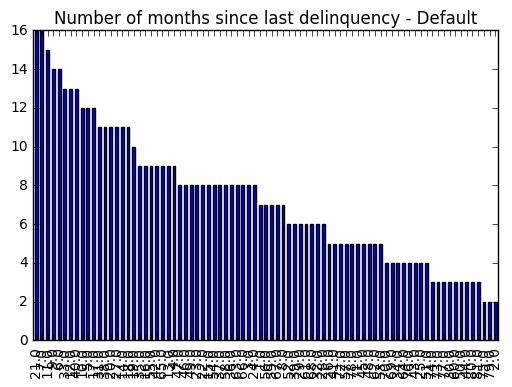

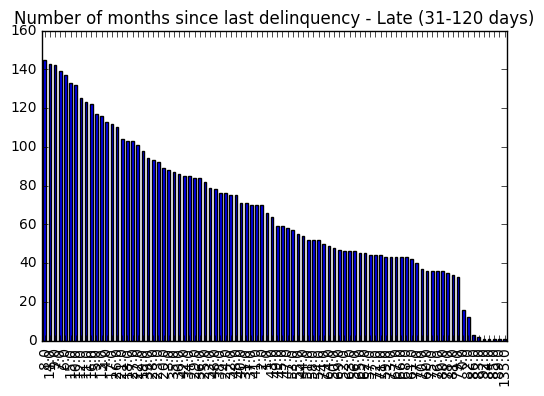

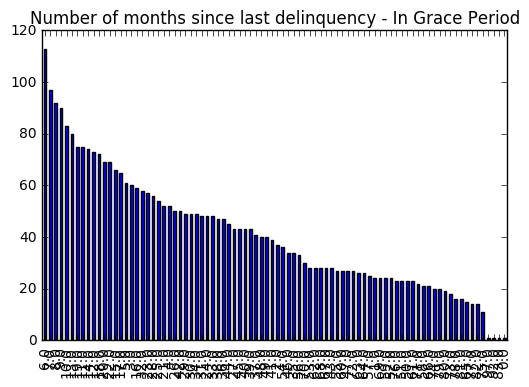

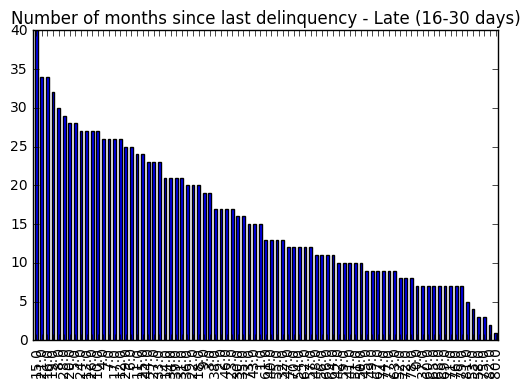

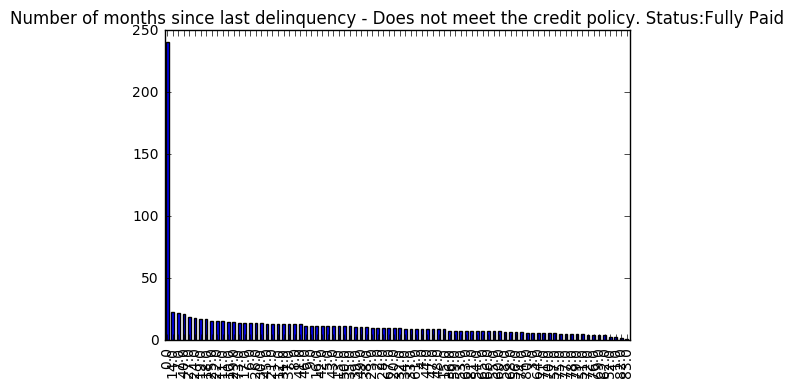

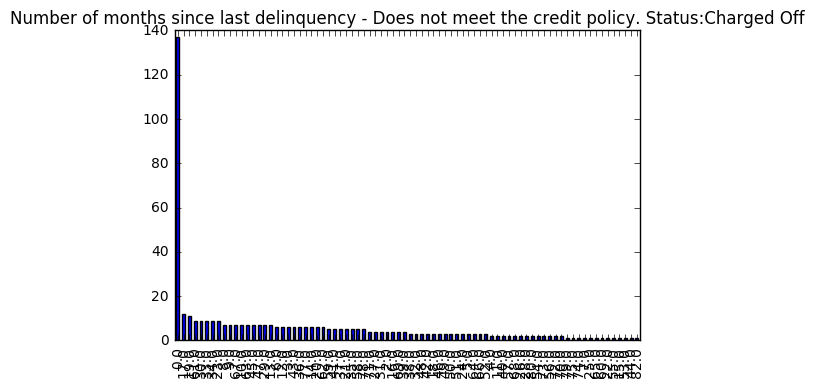

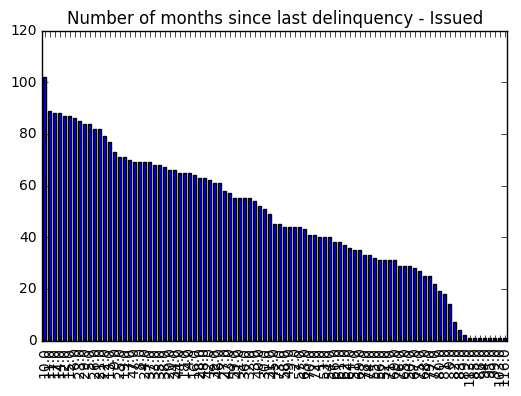

In [80]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['mths_since_last_delinq'].value_counts().plot(kind='bar', title = 'Number of months since last delinquency - {}'.format(i))
    plt.show()

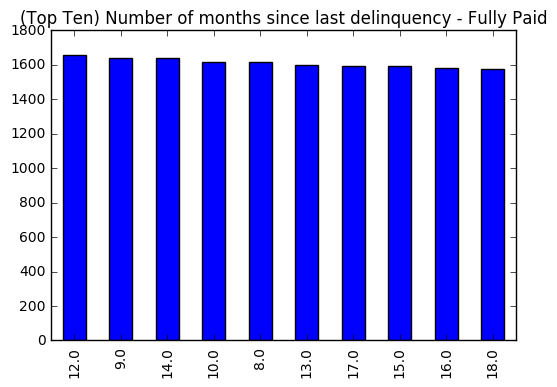

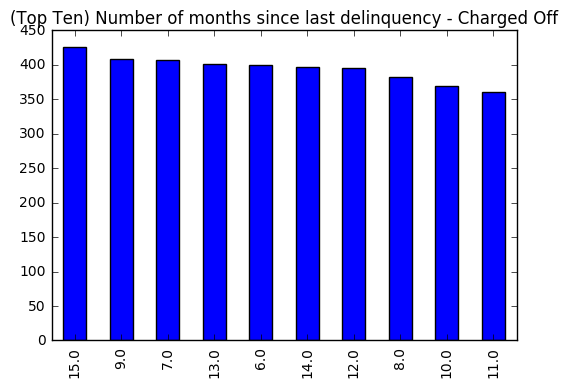

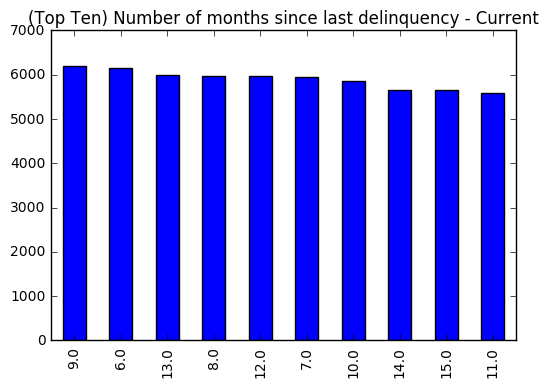

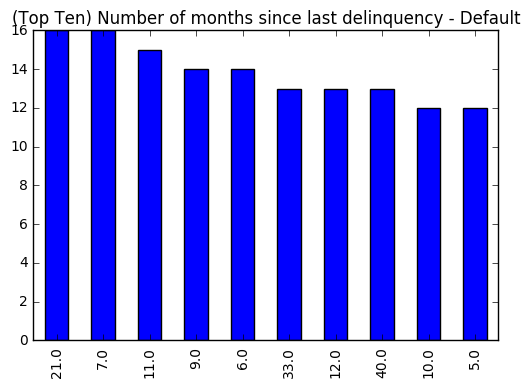

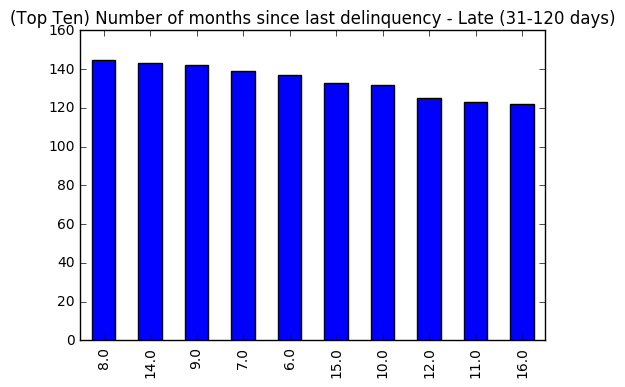

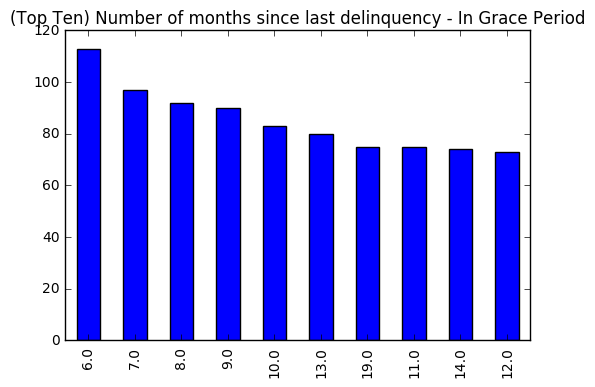

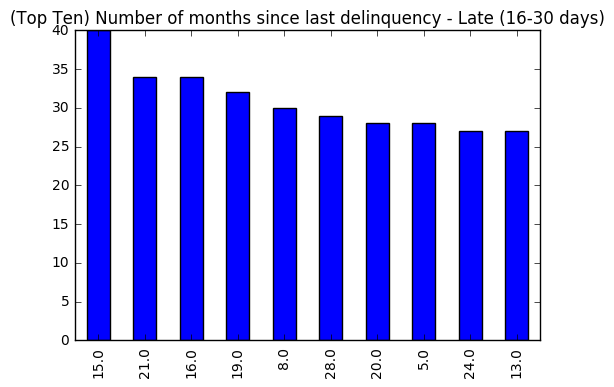

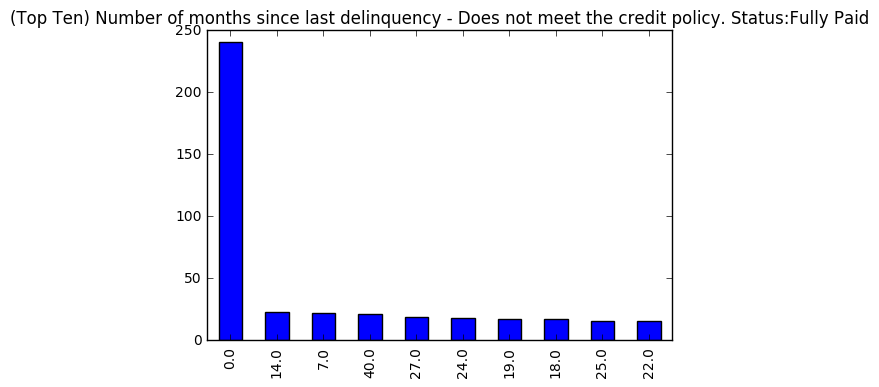

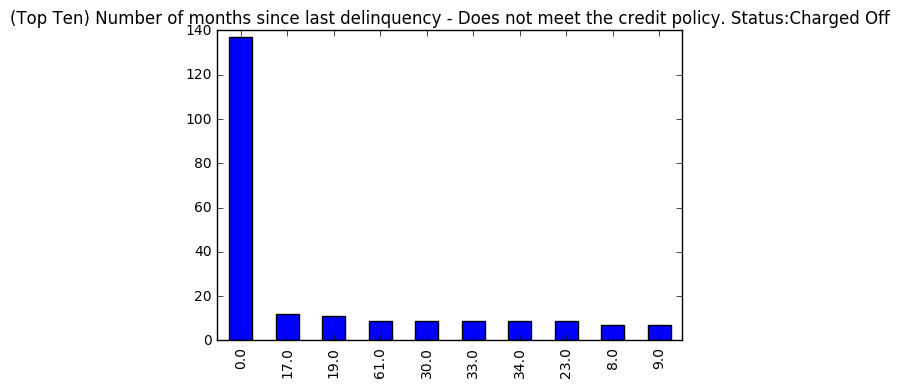

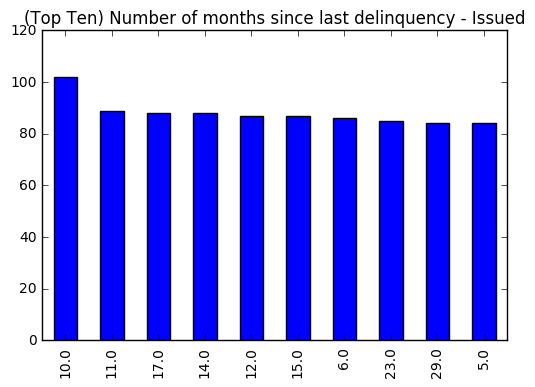

In [81]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['mths_since_last_delinq'].value_counts().nlargest(10).plot(kind='bar', title = '(Top Ten) Number of months since last delinquency - {}'.format(i))
    plt.show()

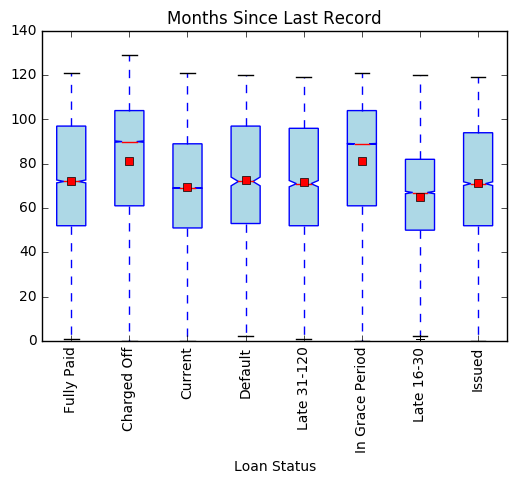

In [82]:
sorted_input =  sorted(list(zip(x_df.mths_since_last_record, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Months Since Last Record')

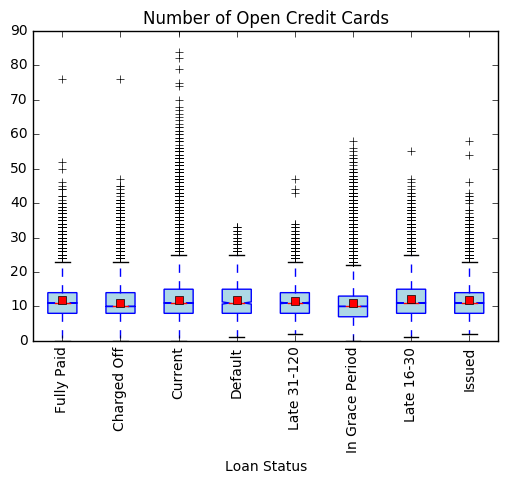

In [83]:
sorted_input =  sorted(list(zip(x_df.open_acc, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Number of Open Credit Cards')

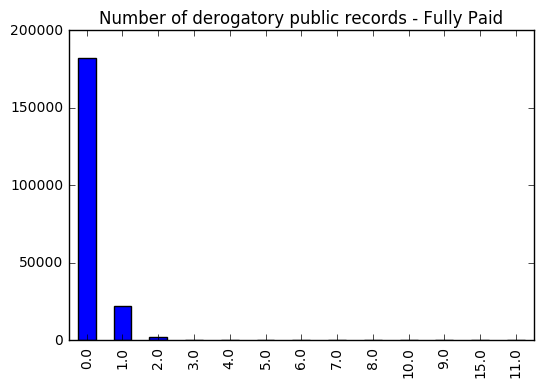

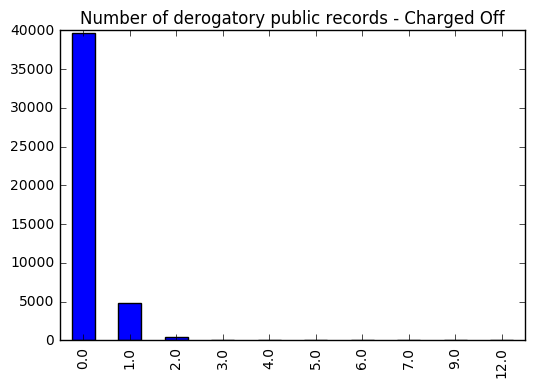

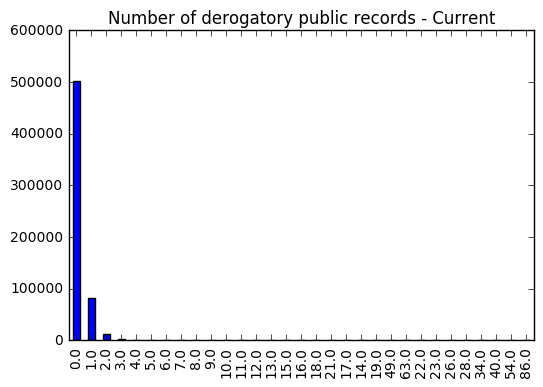

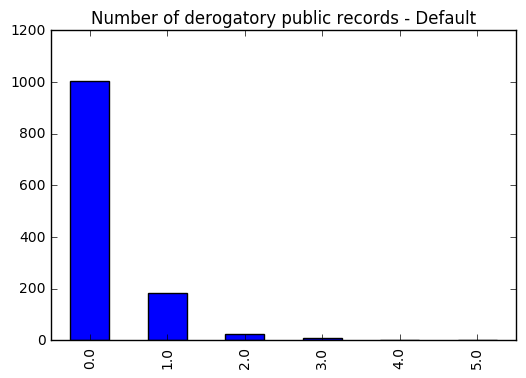

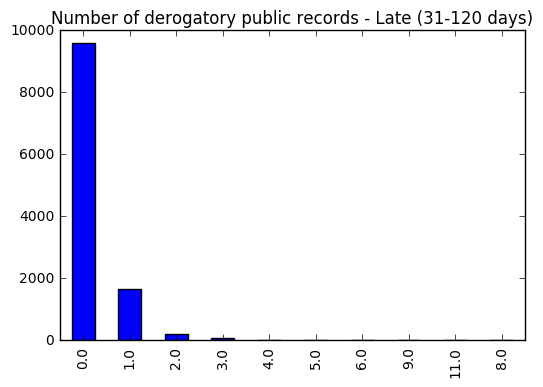

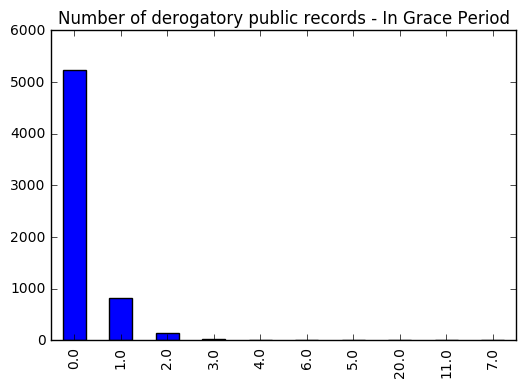

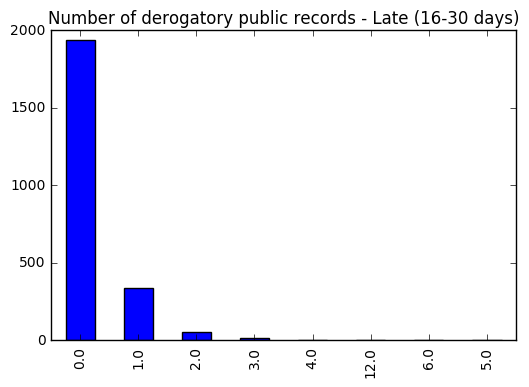

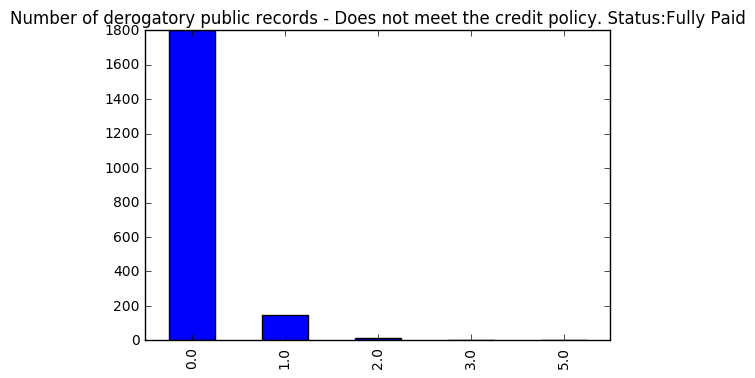

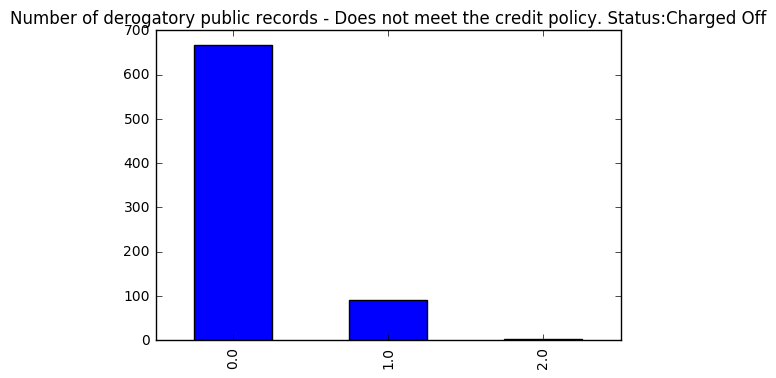

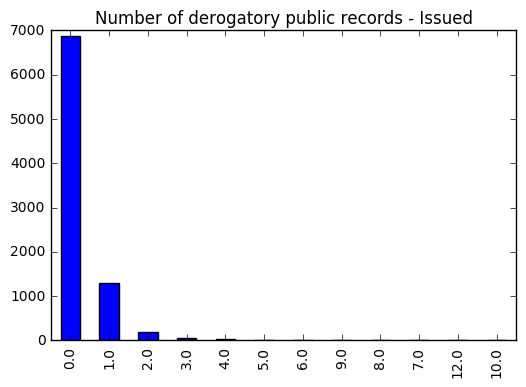

In [84]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['pub_rec'].value_counts().plot(kind='bar', title = 'Number of derogatory public records - {}'.format(i))
    plt.show()

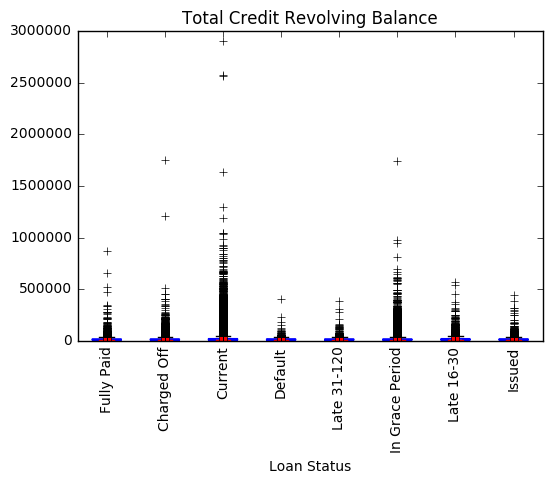

In [85]:
sorted_input =  sorted(list(zip(x_df.revol_bal, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Total Credit Revolving Balance')

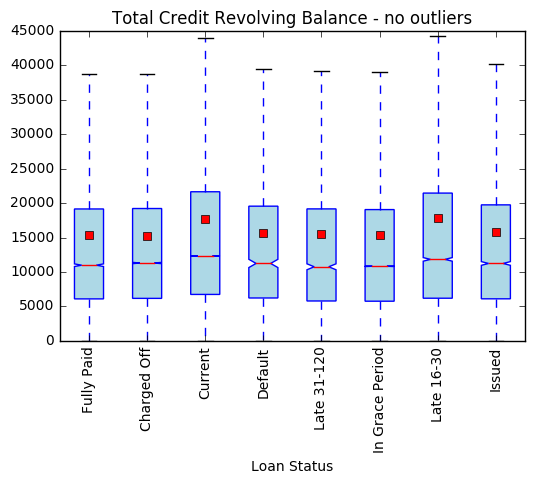

In [86]:
sorted_input =  sorted(list(zip(x_df.revol_bal, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Total Credit Revolving Balance - no outliers')

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
'term', 'int_rate', 'installment', 'emp_title','emp_length', 'home_ownership', 
'annual_inc', 'verification_status','issue_d', 'pymnt_plan', 'url', 
'desc', (hold on - sentiment analysis like above), 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line','inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 

'initial_list_status', 

'out_prncp', 'out_prncp_inv', 'total_pymnt',
'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
'collections_12_mths_ex_med', 'mths_since_last_major_derog',
'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [87]:
print(len(x_df['initial_list_status'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'initial_list_status'].iloc[:,1]

2


20    The initial listing status of the loan. Possib...
Name: Description, dtype: object

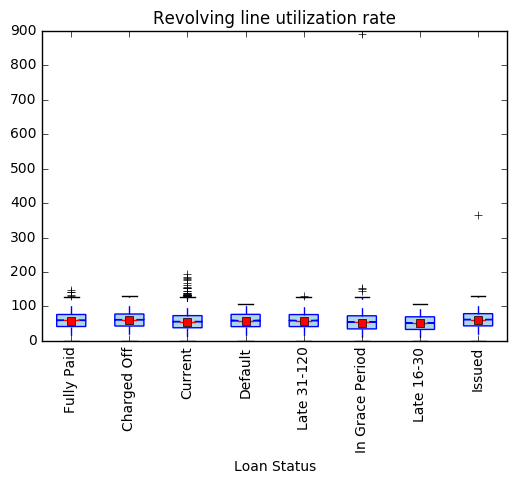

In [88]:
sorted_input =  sorted(list(zip(x_df.revol_util, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Revolving line utilization rate')

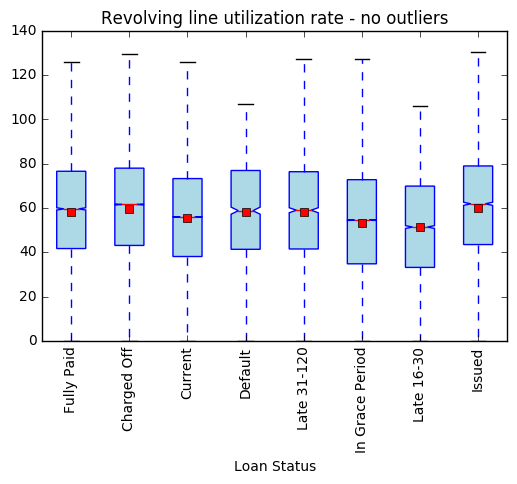

In [89]:
sorted_input =  sorted(list(zip(x_df.revol_util, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Revolving line utilization rate - no outliers')

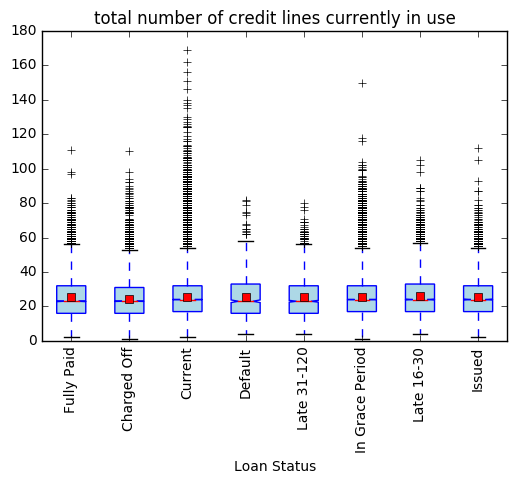

In [90]:
sorted_input =  sorted(list(zip(x_df.total_acc, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('total number of credit lines currently in use')

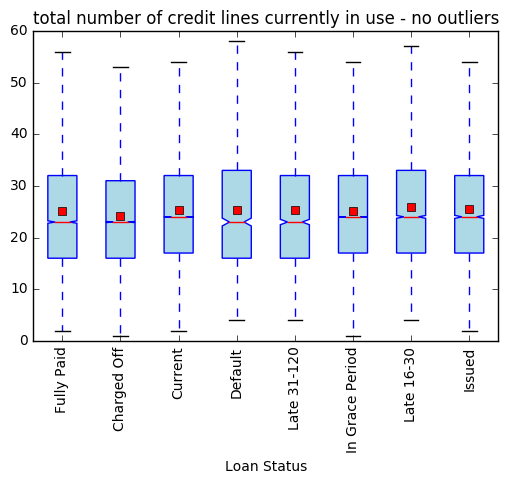

In [91]:
sorted_input =  sorted(list(zip(x_df.total_acc, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('total number of credit lines currently in use - no outliers')

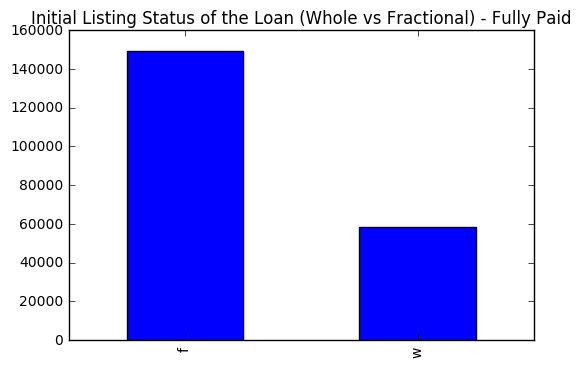

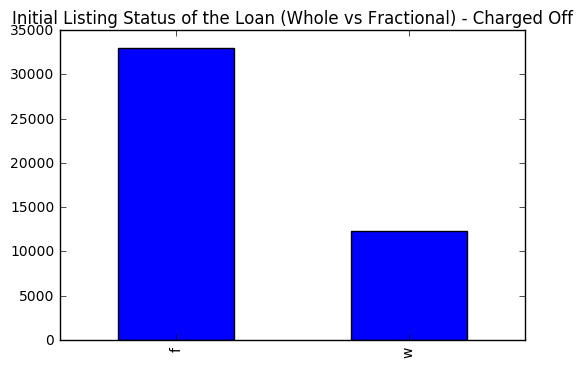

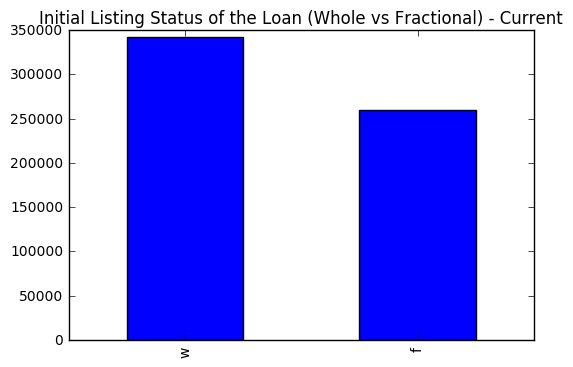

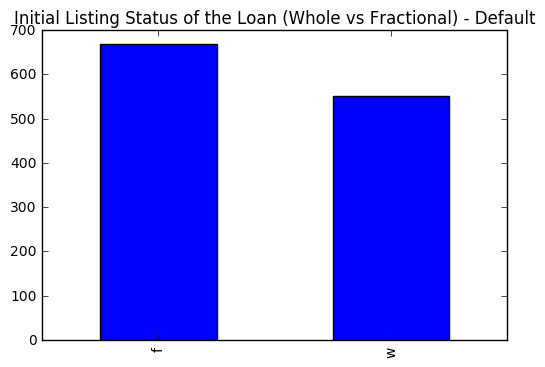

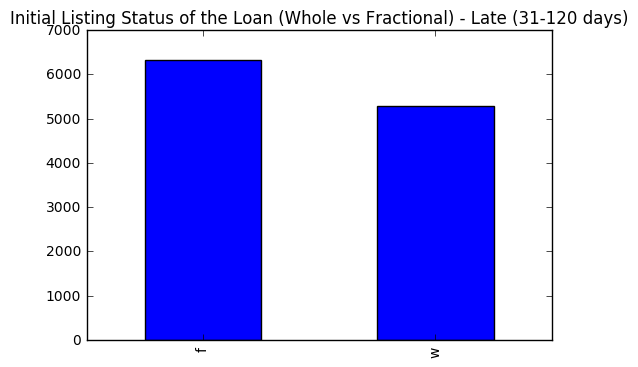

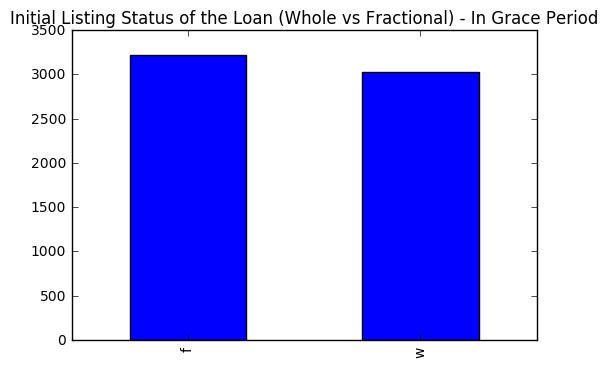

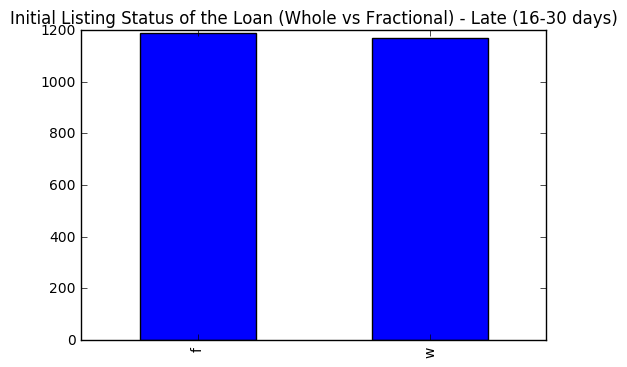

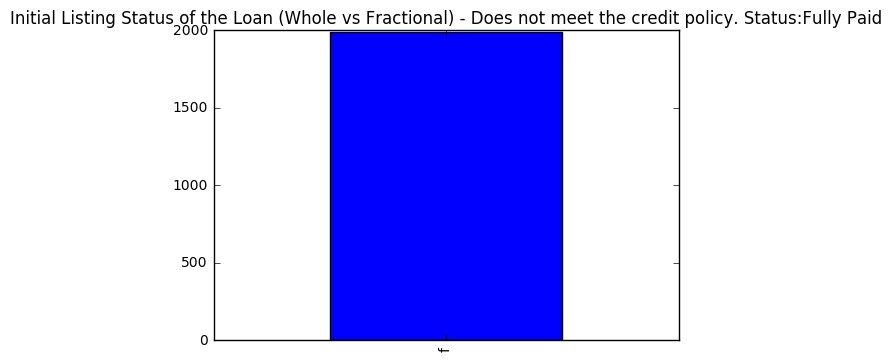

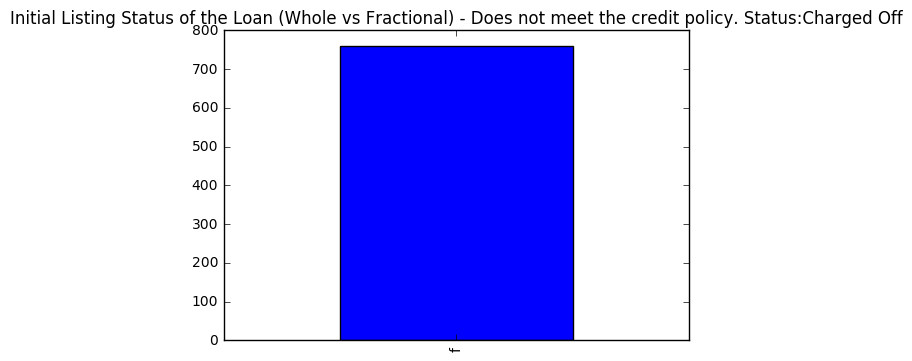

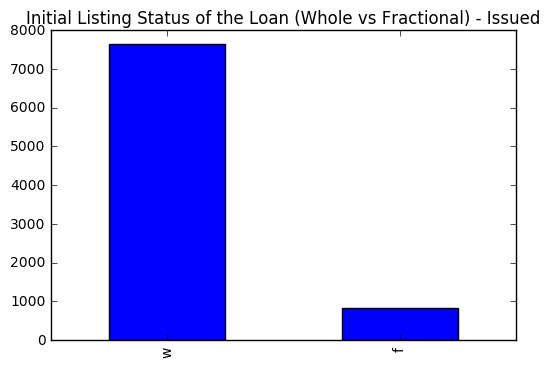

In [92]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['initial_list_status'].value_counts().plot(kind='bar', title = 'Initial Listing Status of the Loan (Whole vs Fractional) - {}'.format(i))
    plt.show()

In [93]:
print(len(x_df['total_pymnt_inv'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'total_pymnt_inv'].iloc[:,1]

506616


53    Payments received to date for portion of total...
Name: Description, dtype: object

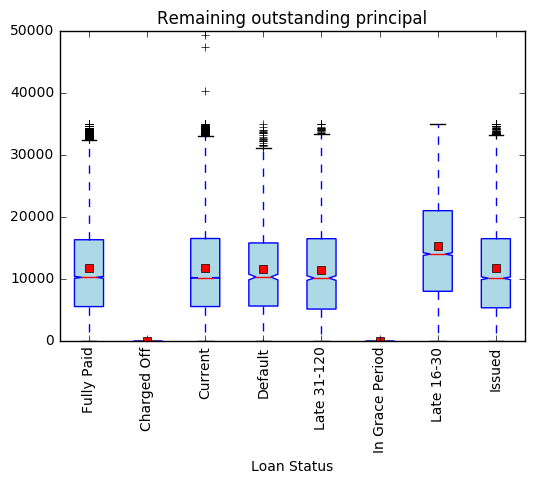

In [94]:
sorted_input =  sorted(list(zip(x_df.out_prncp, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Remaining outstanding principal')

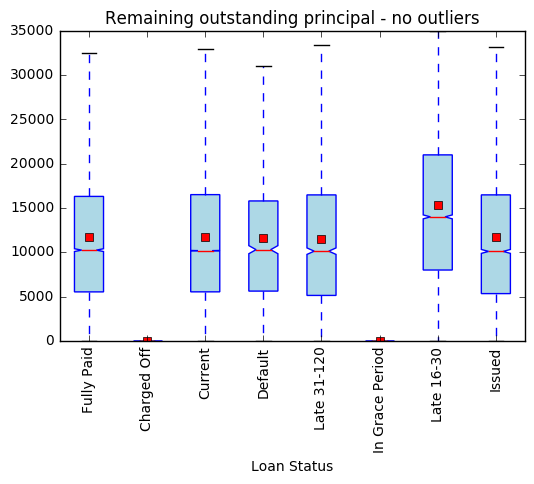

In [95]:
sorted_input =  sorted(list(zip(x_df.out_prncp, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Remaining outstanding principal - no outliers')

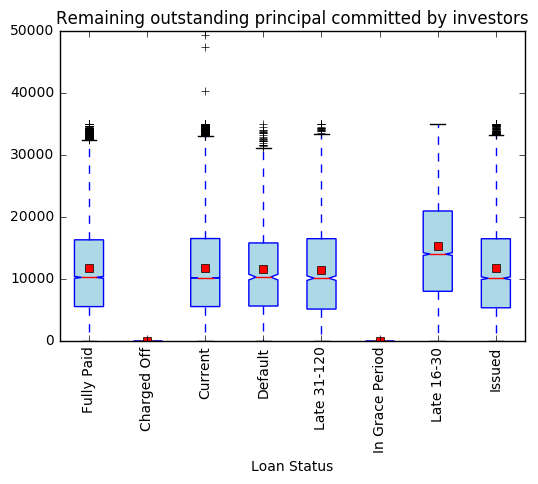

In [96]:
sorted_input =  sorted(list(zip(x_df.out_prncp_inv, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Remaining outstanding principal committed by investors')

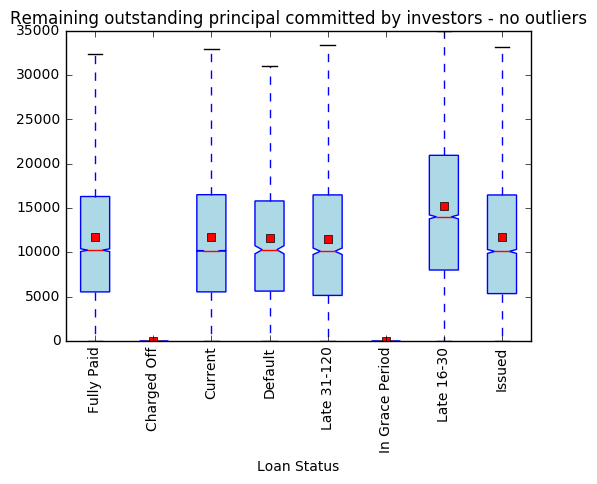

In [97]:
sorted_input =  sorted(list(zip(x_df.out_prncp_inv, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Remaining outstanding principal committed by investors - no outliers')

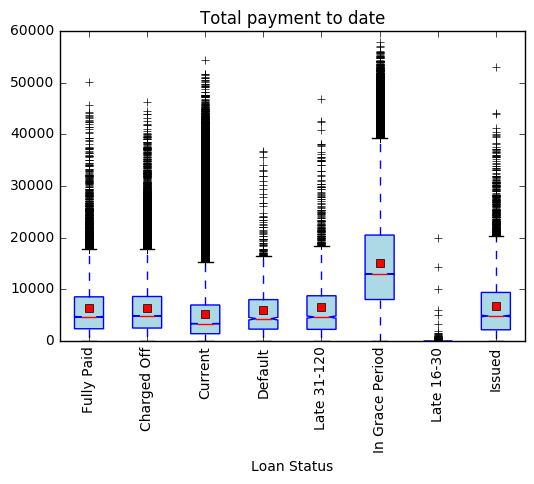

In [98]:
sorted_input =  sorted(list(zip(x_df.total_pymnt, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Total payment to date')

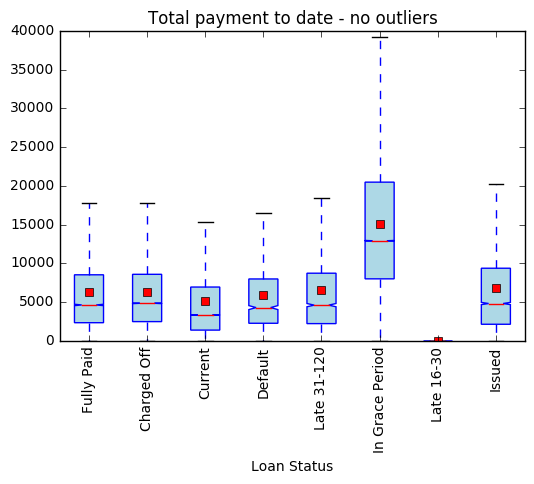

In [99]:
sorted_input =  sorted(list(zip(x_df.total_pymnt, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Total payment to date - no outliers')

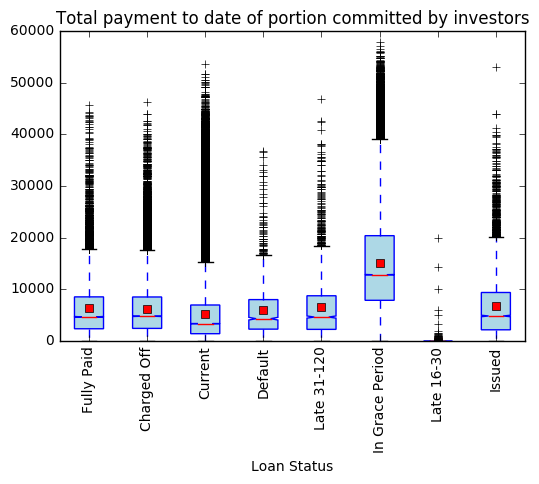

In [100]:
sorted_input =  sorted(list(zip(x_df.total_pymnt_inv, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Total payment to date of portion committed by investors')

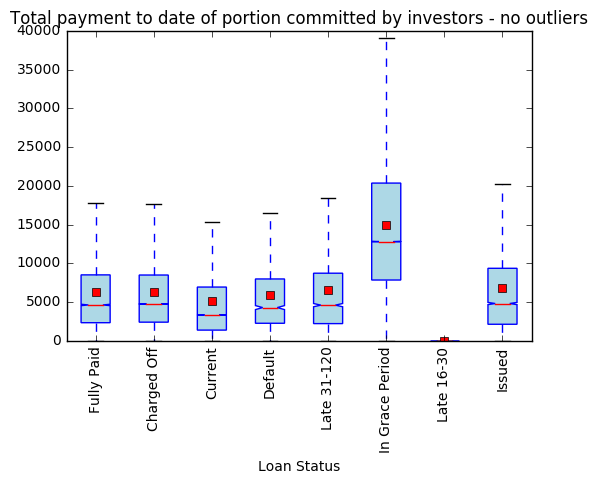

In [101]:
sorted_input =  sorted(list(zip(x_df.total_pymnt_inv, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Total payment to date of portion committed by investors - no outliers')

In [102]:
print(len(x_df['total_rec_int'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'total_rec_int'].iloc[:,1]

324635


54    Interest received to date
Name: Description, dtype: object

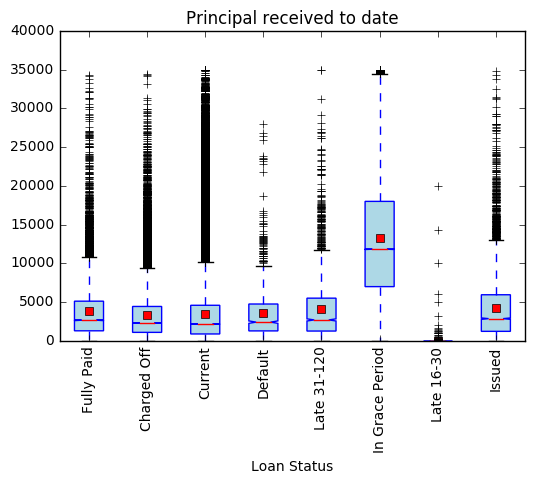

In [103]:
sorted_input =  sorted(list(zip(x_df.total_rec_prncp, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Principal received to date')

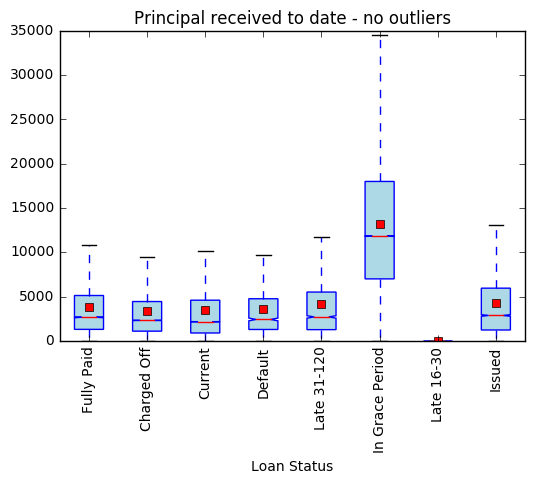

In [104]:
sorted_input =  sorted(list(zip(x_df.total_rec_prncp, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Principal received to date - no outliers')

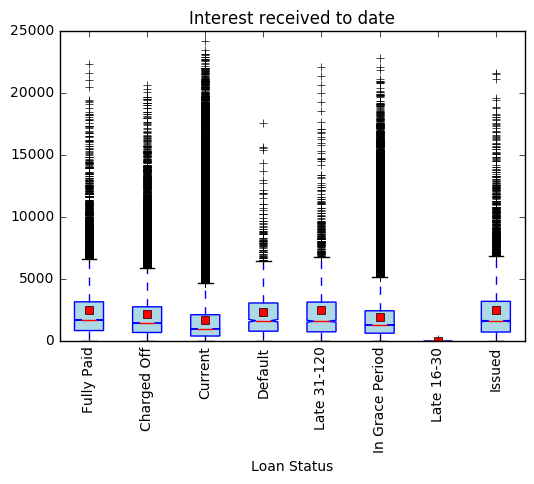

In [105]:
sorted_input =  sorted(list(zip(x_df.total_rec_int, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Interest received to date')

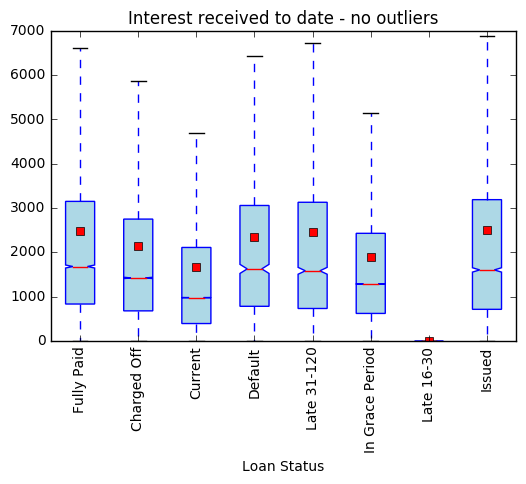

In [106]:
sorted_input =  sorted(list(zip(x_df.total_rec_int, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Interest received to date - no outliers')

In [107]:
print(len(x_df['recoveries'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'recoveries'].iloc[:,1]

23055


45    post charge off gross recovery
Name: Description, dtype: object

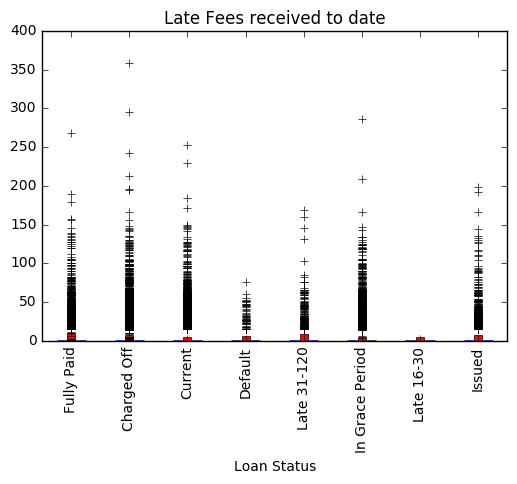

In [108]:
sorted_input =  sorted(list(zip(x_df.total_rec_late_fee, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Late Fees received to date')

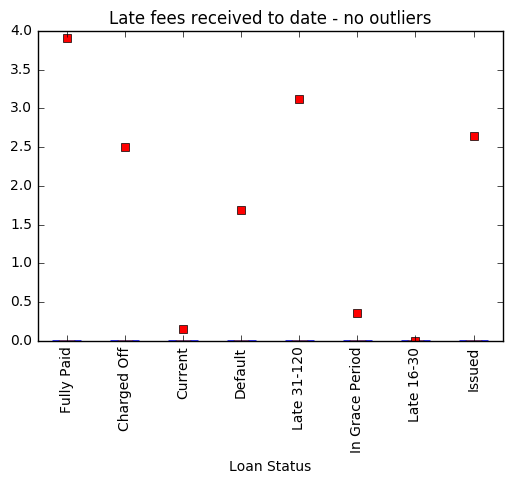

In [109]:
sorted_input =  sorted(list(zip(x_df.total_rec_late_fee, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Late fees received to date - no outliers')

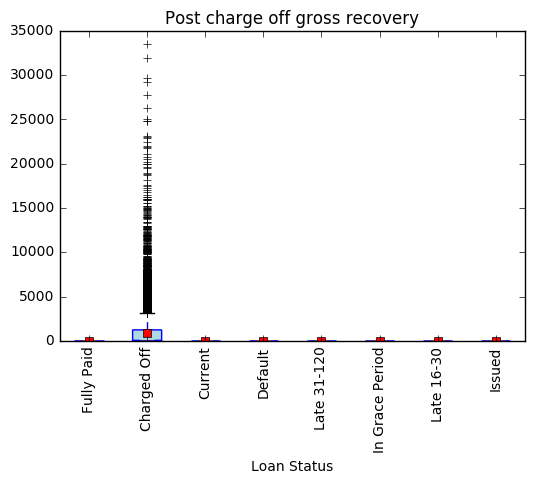

In [110]:
sorted_input =  sorted(list(zip(x_df.recoveries, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Post charge off gross recovery')

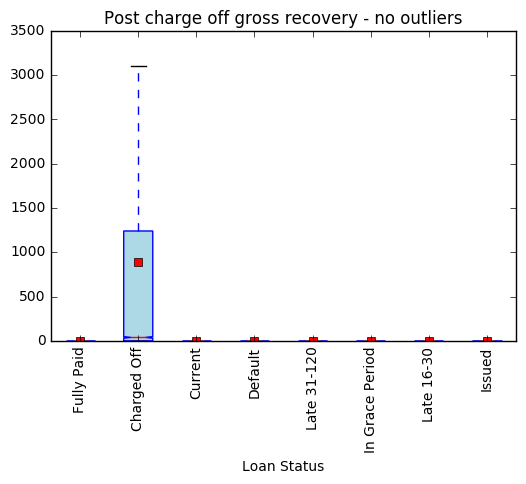

In [111]:

sorted_input =  sorted(list(zip(x_df.recoveries, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Post charge off gross recovery - no outliers')

In [112]:
print(len(x_df['last_pymnt_amnt'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'last_pymnt_amnt'].iloc[:,1]

232451


29    Last total payment amount received
Name: Description, dtype: object

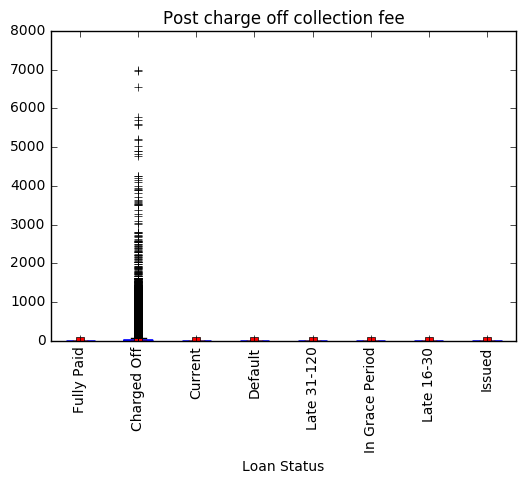

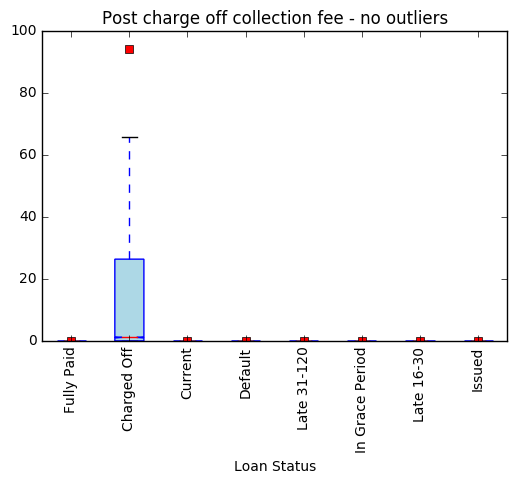

In [113]:
sorted_input =  sorted(list(zip(x_df.collection_recovery_fee, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Post charge off collection fee')
plt.show() 

sorted_input =  sorted(list(zip(x_df.collection_recovery_fee, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Post charge off collection fee - no outliers')
plt.show()

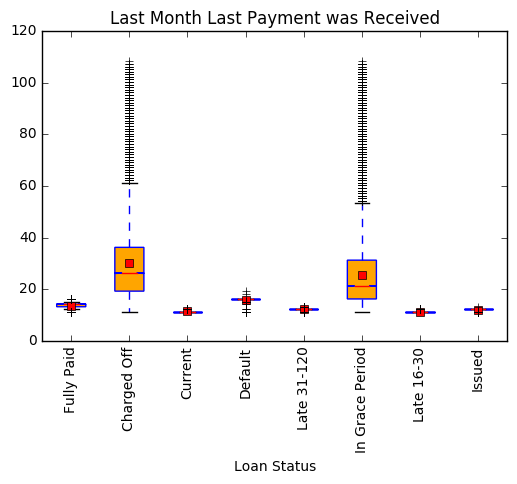

In [114]:
times = []
for i in x_df['last_pymnt_d']:
    d = datetime.datetime.strptime(i, "%b-%Y")
    today = datetime.datetime.now()
    time_d = today - d
    times.append(time_d.days/30.4368499)
sorted_input =  sorted(list(zip(times, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Last Month Last Payment was Received')

In [115]:
print(len(x_df['next_pymnt_d'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'next_pymnt_d'].iloc[:,1]

100


37    Next scheduled payment date
Name: Description, dtype: object

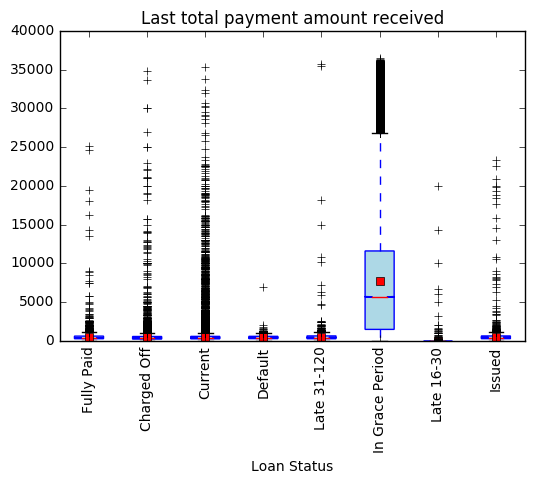

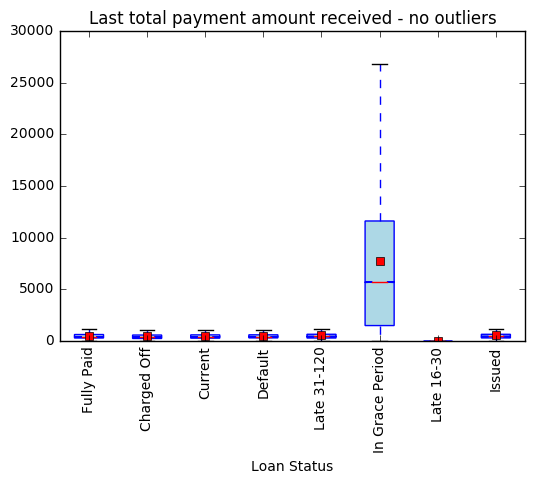

In [116]:
sorted_input =  sorted(list(zip(x_df.last_pymnt_amnt, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Last total payment amount received')
plt.show() 

sorted_input =  sorted(list(zip(x_df.last_pymnt_amnt, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Last total payment amount received - no outliers')
plt.show()

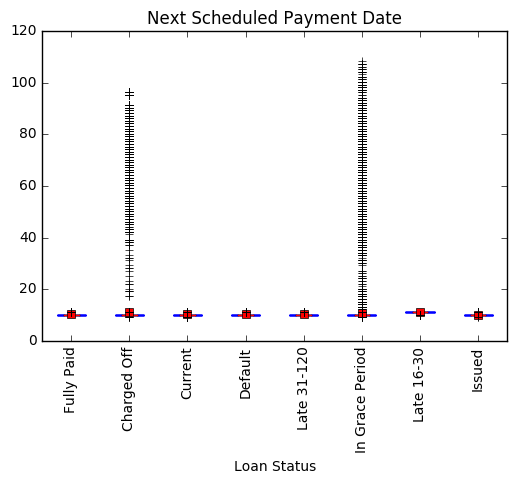

In [117]:
times = []
for i in x_df['next_pymnt_d']:
    d = datetime.datetime.strptime(i, "%b-%Y")
    today = datetime.datetime.now()
    time_d = today - d
    times.append(time_d.days/30.4368499)
sorted_input =  sorted(list(zip(times, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Next Scheduled Payment Date')

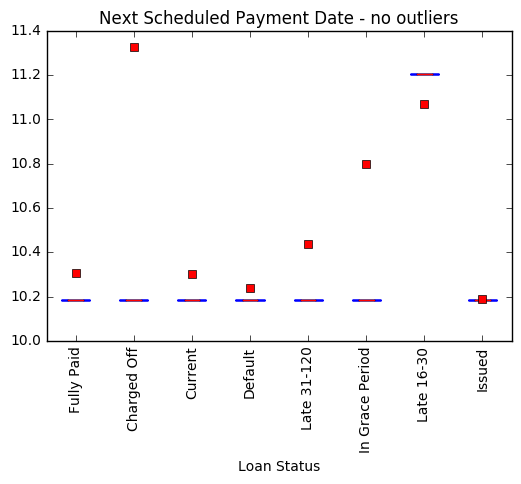

In [118]:
times = []
for i in x_df['next_pymnt_d']:
    d = datetime.datetime.strptime(i, "%b-%Y")
    today = datetime.datetime.now()
    time_d = today - d
    times.append(time_d.days/30.4368499)
sorted_input =  sorted(list(zip(times, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Next Scheduled Payment Date - no outliers')

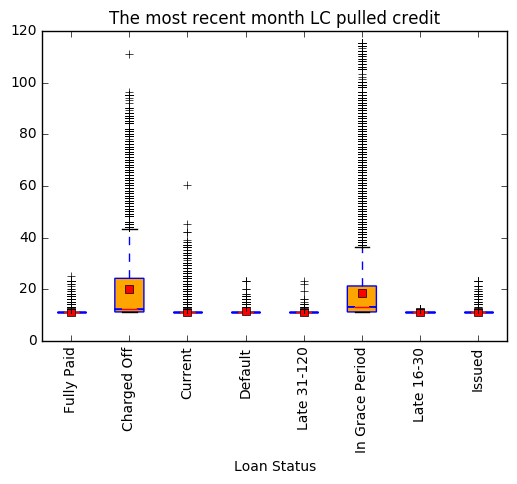

In [119]:
times = []
for i in x_df['last_credit_pull_d']:
    d = datetime.datetime.strptime(i, "%b-%Y")
    today = datetime.datetime.now()
    time_d = today - d
    times.append(time_d.days/30.4368499)
sorted_input =  sorted(list(zip(times, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('The most recent month LC pulled credit')

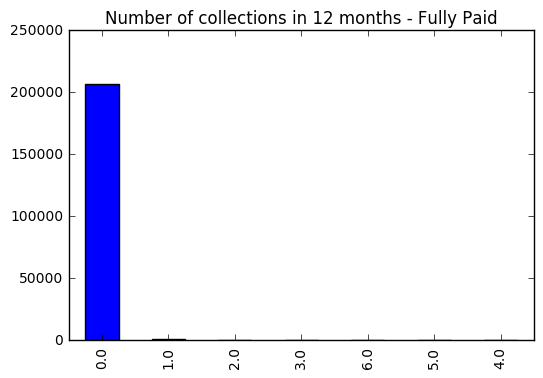

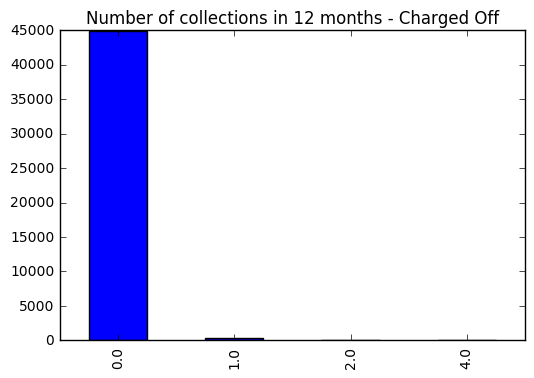

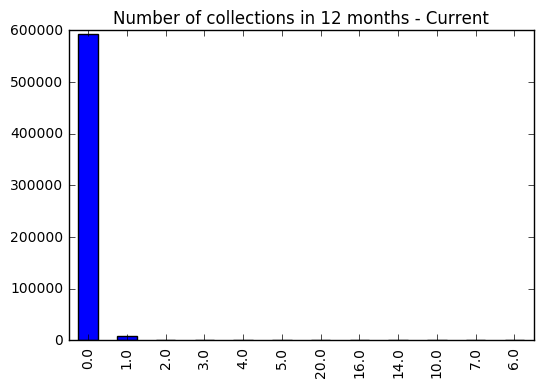

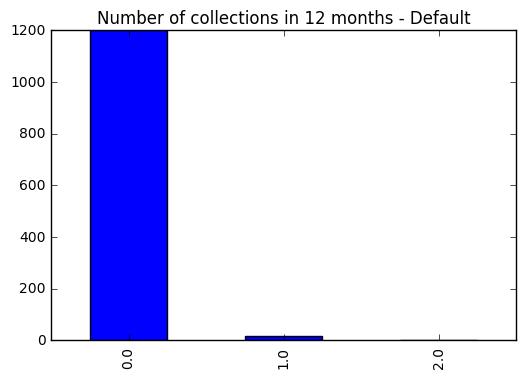

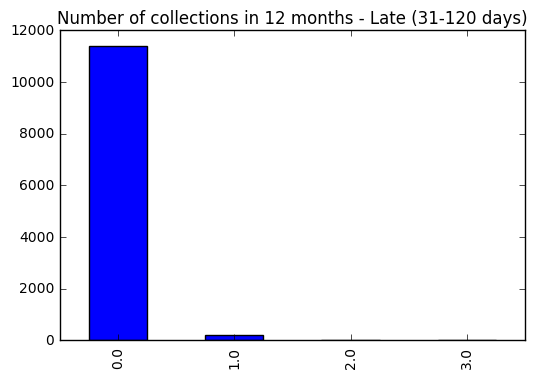

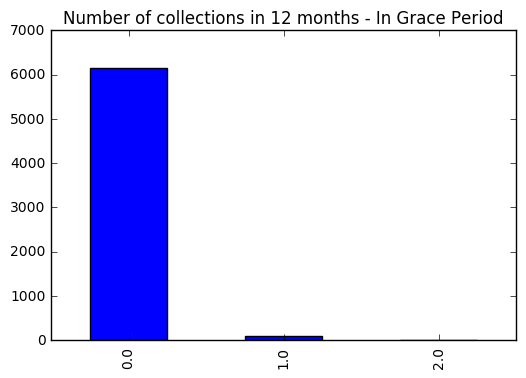

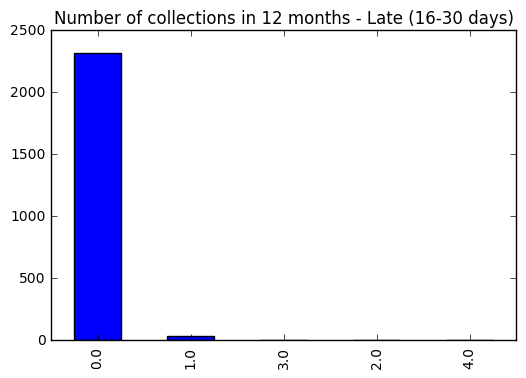

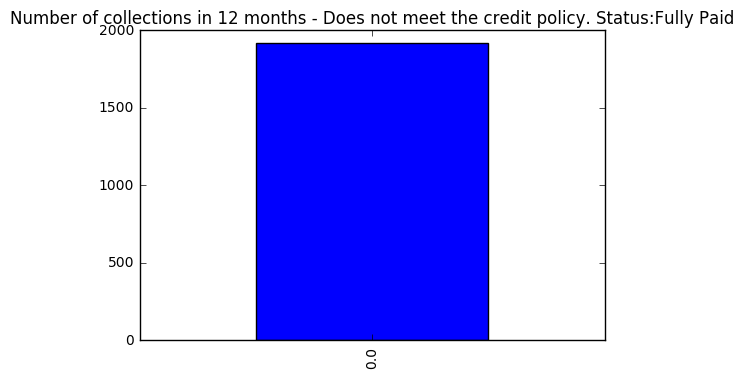

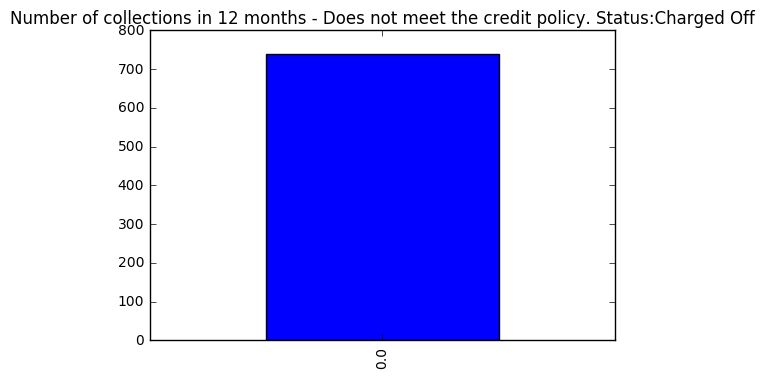

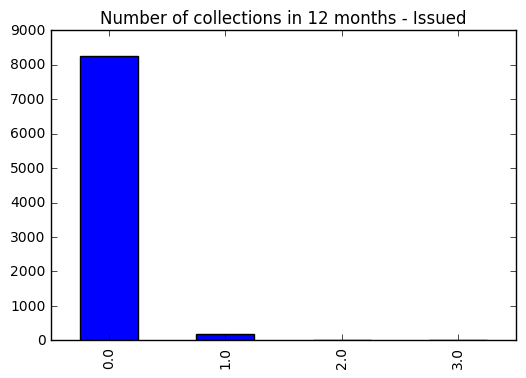

In [120]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['collections_12_mths_ex_med'].value_counts().plot(kind='bar', title = 'Number of collections in 12 months - {}'.format(i))
    plt.show()

In [121]:
print(len(x_df['annual_inc_joint'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'annual_inc_joint'].iloc[:,1]
# x_df['policy_code']

308


2    The combined self-reported annual income provi...
Name: Description, dtype: object

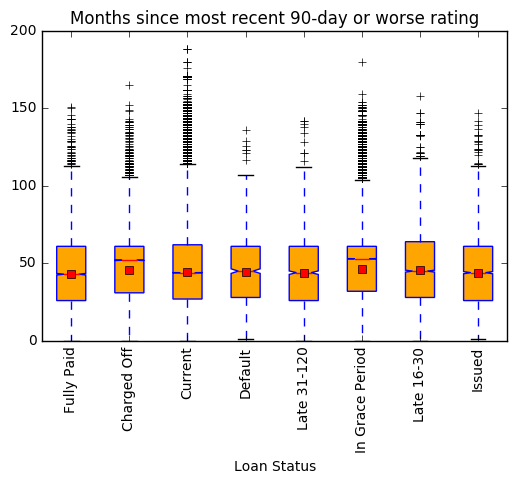

In [122]:
times = x_df['mths_since_last_major_derog']

sorted_input =  sorted(list(zip(times, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Months since most recent 90-day or worse rating')

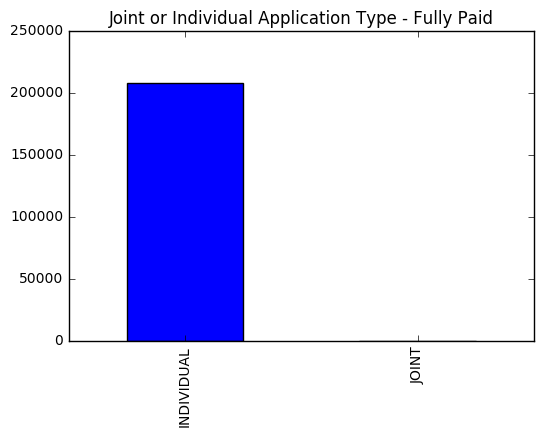

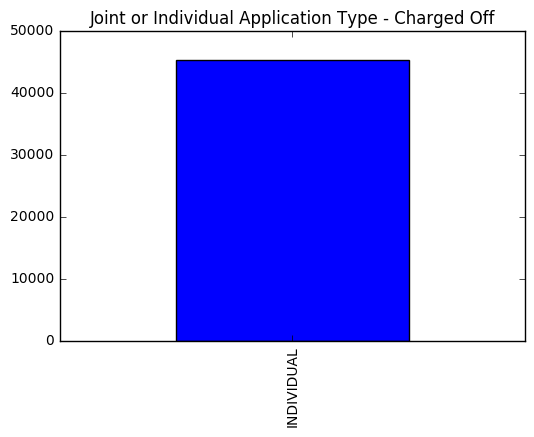

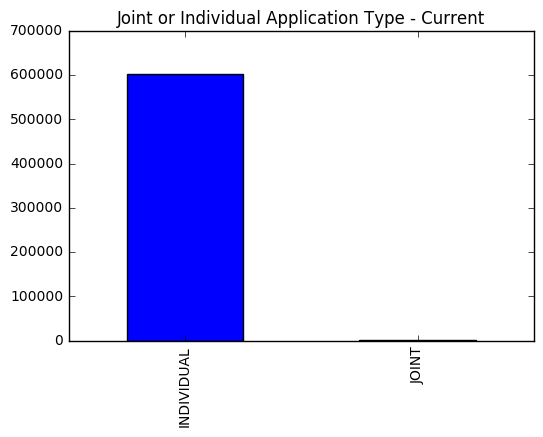

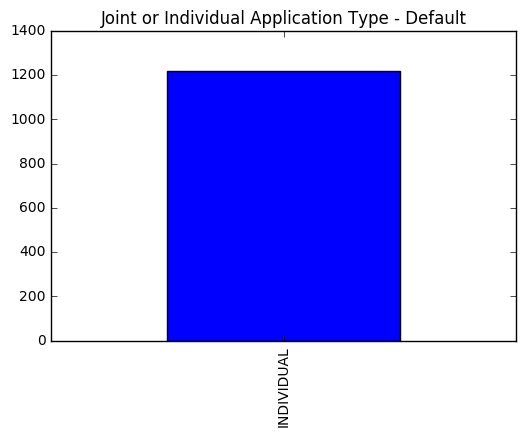

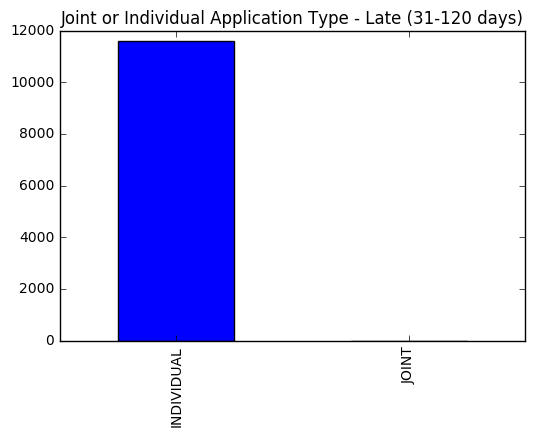

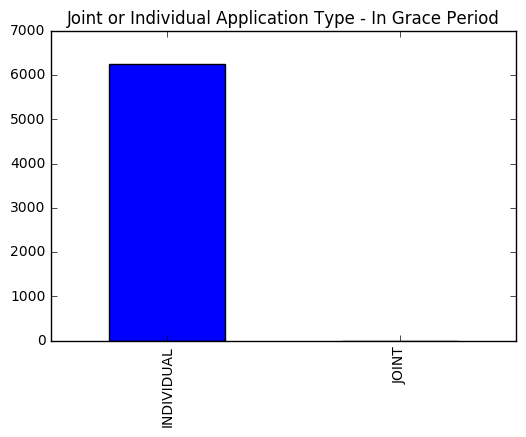

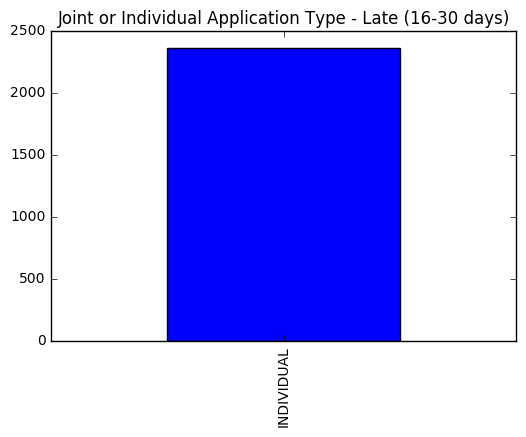

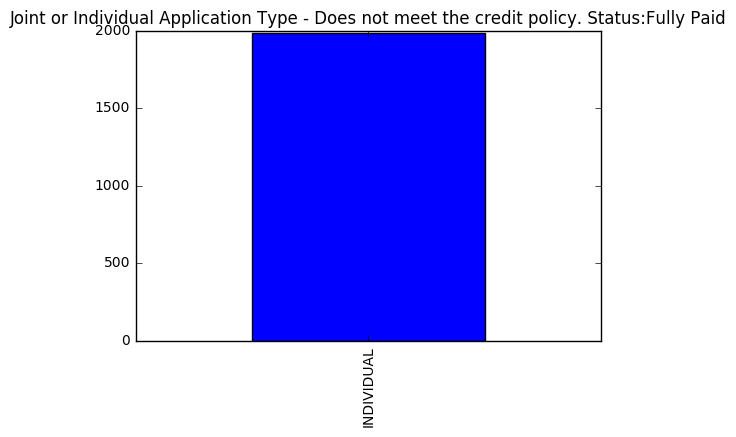

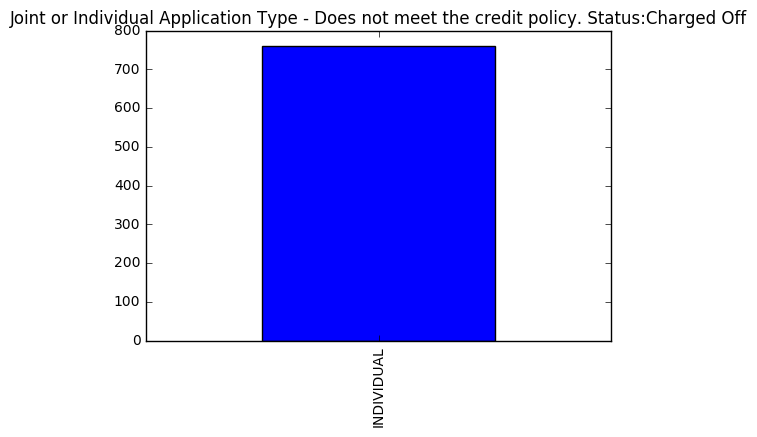

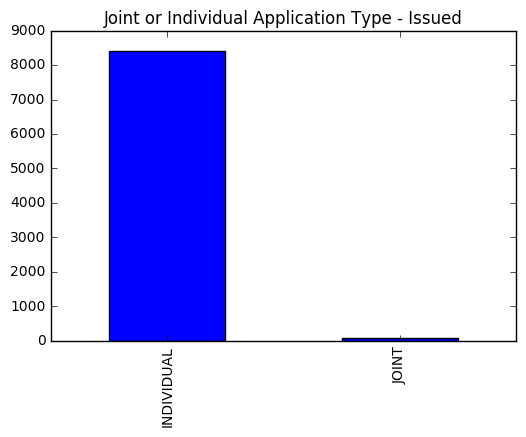

In [123]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['application_type'].value_counts().plot(kind='bar', title = 'Joint or Individual Application Type - {}'.format(i))
    plt.show()

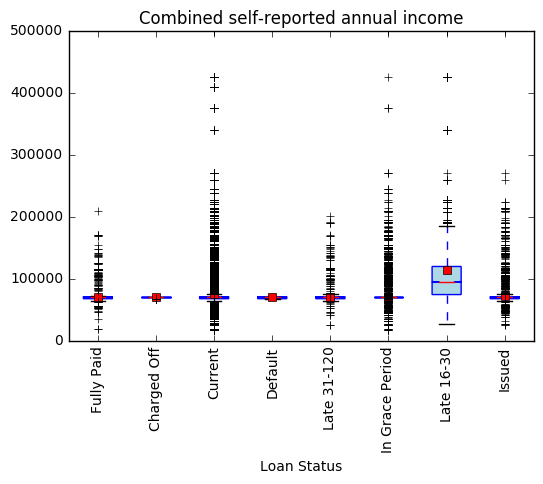

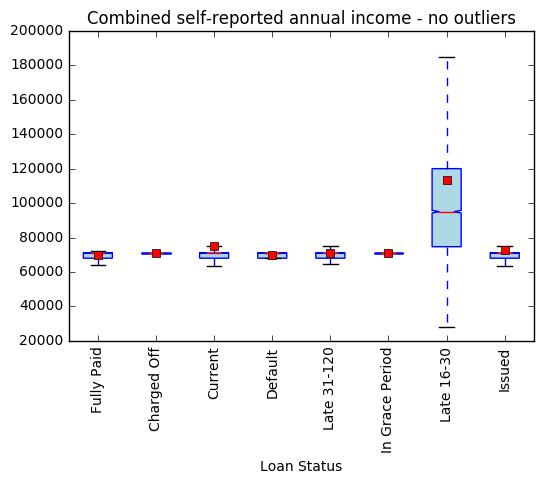

In [124]:
sorted_input =  sorted(list(zip(x_df.annual_inc_joint, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Combined self-reported annual income')
plt.show() 

sorted_input =  sorted(list(zip(x_df.annual_inc_joint, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Combined self-reported annual income - no outliers')
plt.show()

In [125]:
print(len(x_df['acc_now_delinq'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'acc_now_delinq'].iloc[:,1]

8


75    The number of accounts on which the borrower i...
Name: Description, dtype: object

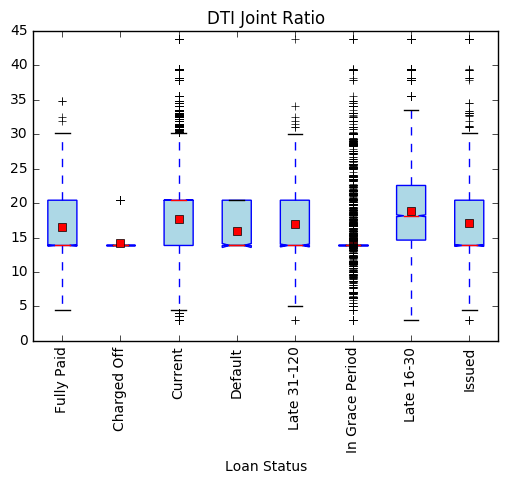

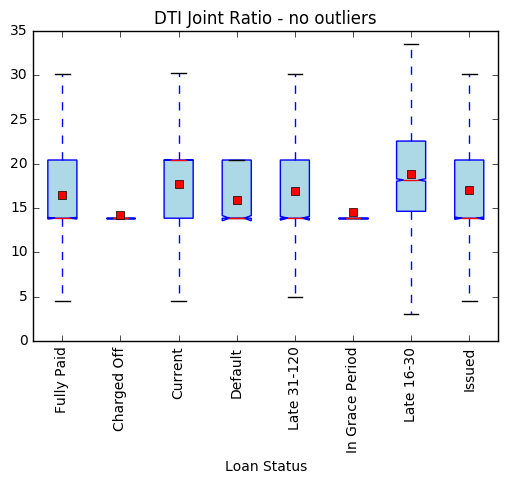

In [126]:
sorted_input =  sorted(list(zip(x_df.dti_joint, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('DTI Joint Ratio')
plt.show() 

sorted_input =  sorted(list(zip(x_df.dti_joint, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('DTI Joint Ratio - no outliers')
plt.show()

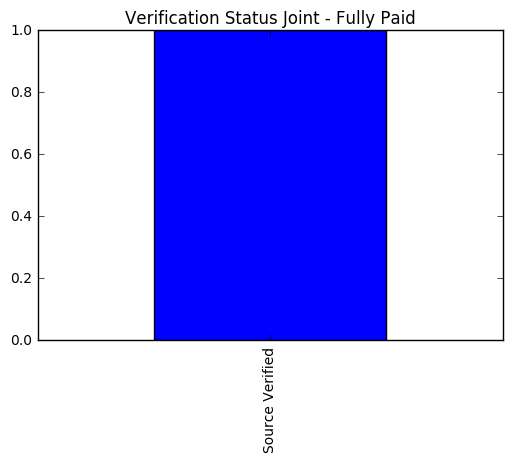

TypeError: Empty 'DataFrame': no numeric data to plot

In [127]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['verification_status_joint'].value_counts().plot(kind='bar', title = 'Verification Status Joint - {}'.format(i))
    plt.show()

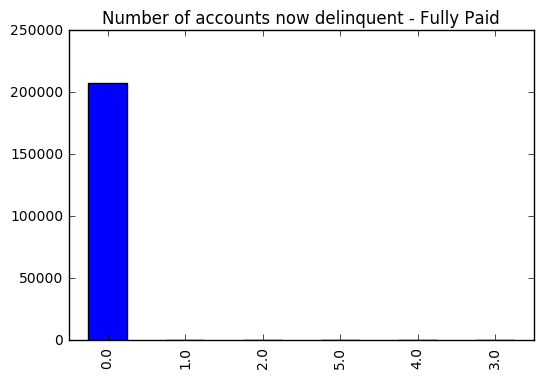

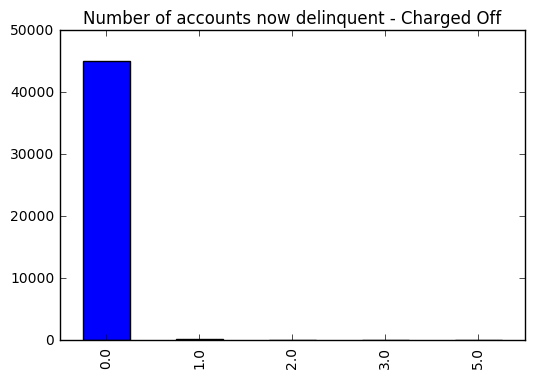

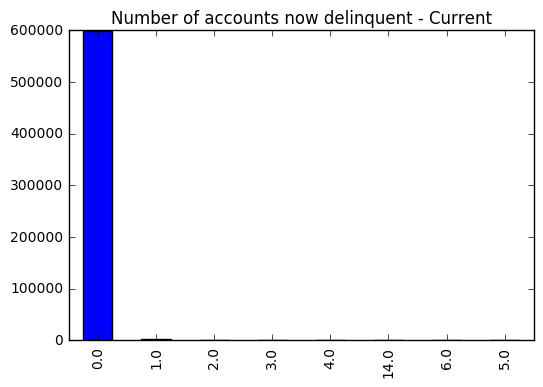

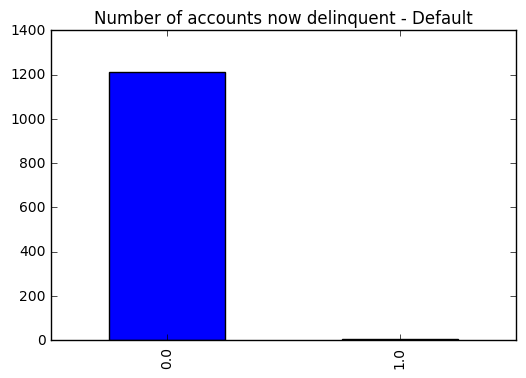

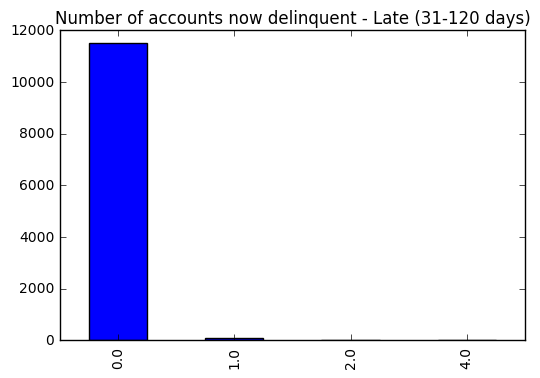

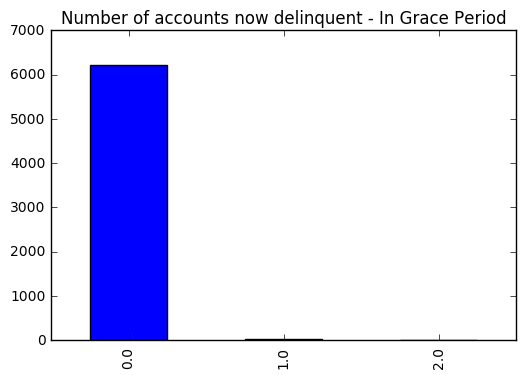

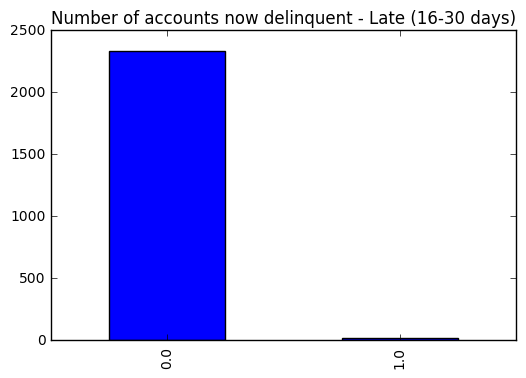

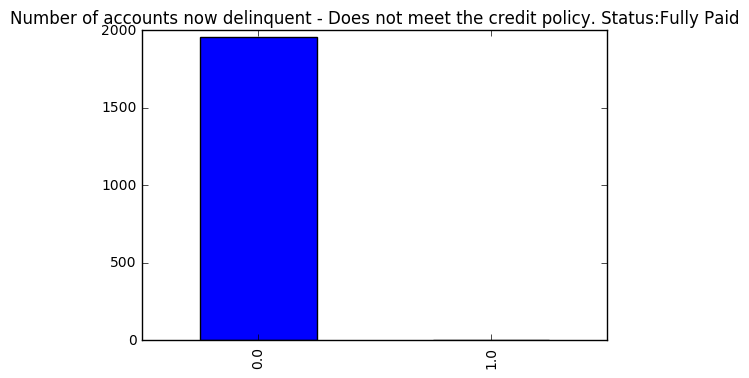

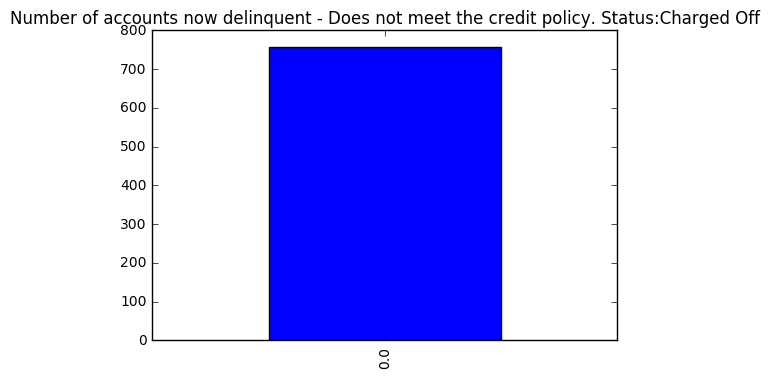

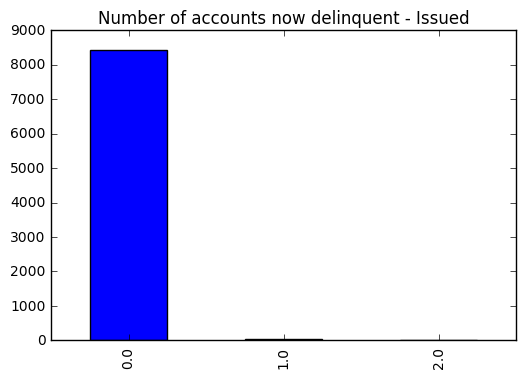

In [128]:
for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['acc_now_delinq'].value_counts().plot(kind='bar', title = 'Number of accounts now delinquent - {}'.format(i))
    plt.show()

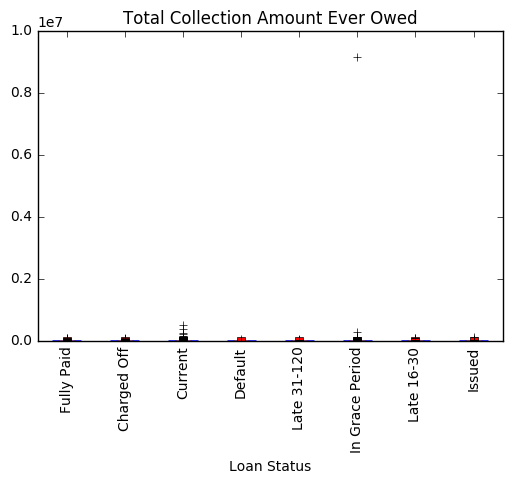

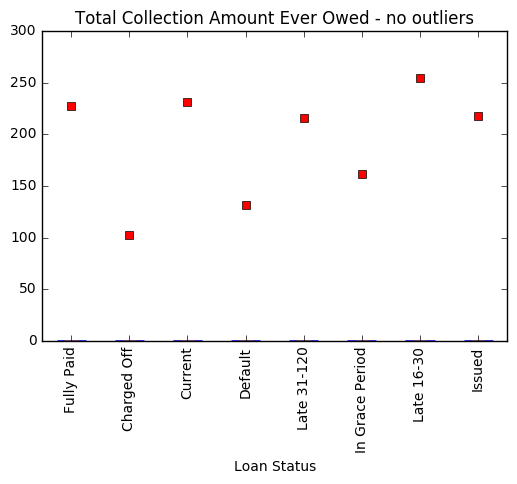

In [129]:
sorted_input =  sorted(list(zip(x_df.tot_coll_amt, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Total Collection Amount Ever Owed')
plt.show() 

sorted_input =  sorted(list(zip(x_df.tot_coll_amt, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Total Collection Amount Ever Owed - no outliers')
plt.show()

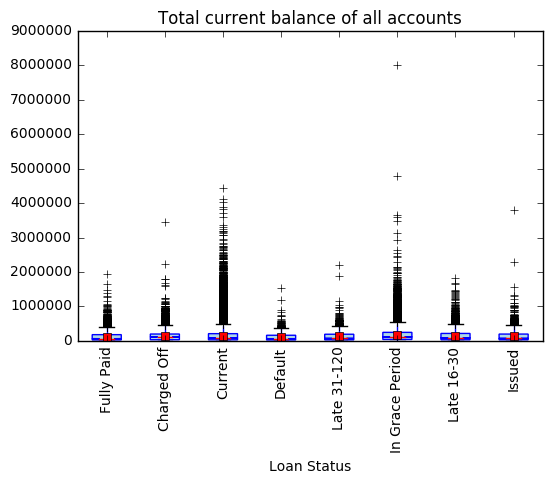

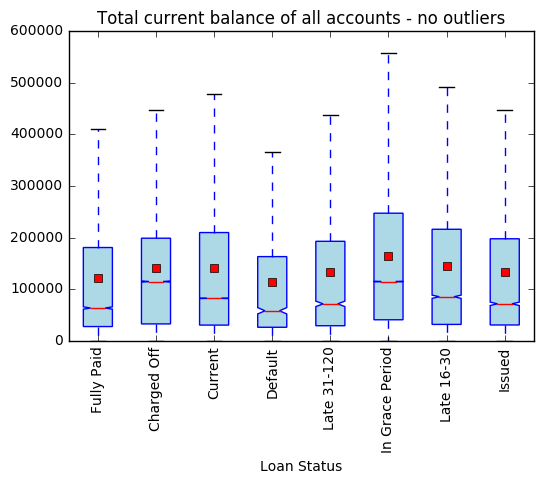

In [130]:
sorted_input =  sorted(list(zip(x_df.tot_cur_bal, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Total current balance of all accounts')
plt.show() 

sorted_input =  sorted(list(zip(x_df.tot_cur_bal, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Total current balance of all accounts - no outliers')
plt.show()

17030


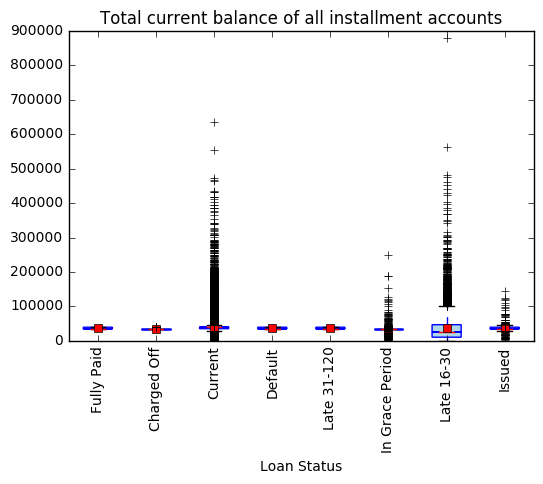

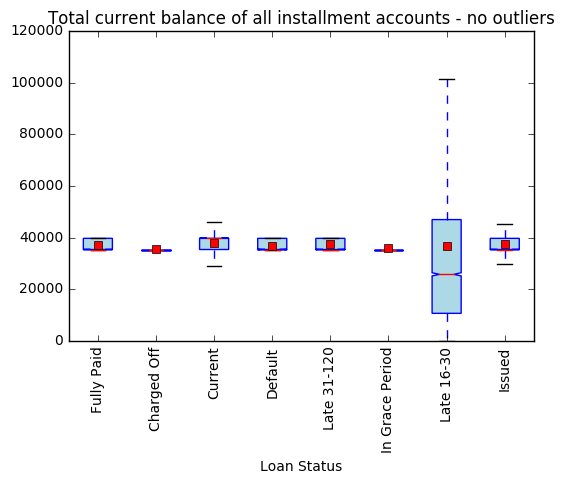

In [134]:
print(len(x_df['total_bal_il'].unique()))
# loan_des.loc[loan_des['LoanStatNew'] == '
             
sorted_input =  sorted(list(zip(x_df.total_bal_il, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Total current balance of all installment accounts')
plt.show() 

sorted_input =  sorted(list(zip(x_df.total_bal_il, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Total current balance of all installment accounts - no outliers')
plt.show()

In [135]:
# x_df['open_acc_6m']

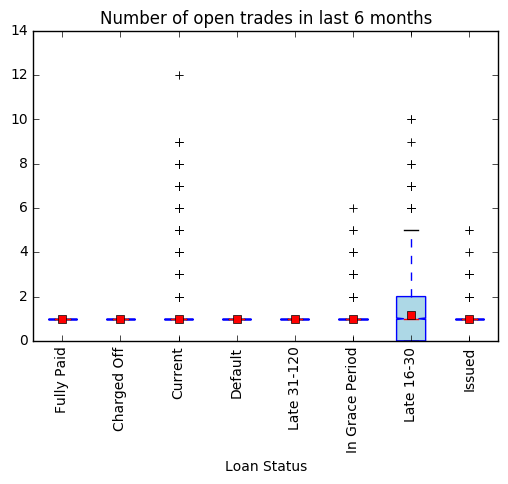

In [136]:
sorted_input =  sorted(list(zip(x_df.open_acc_6m, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Number of open trades in last 6 months')
plt.show() 

# for i in loan_data['loan_status'].unique():
#     loan_data[loan_data['loan_status'] == i]['open_acc_6m'].value_counts().plot(kind='bar', title = 'Number of open trades in last 6 months - {}'.format(i))
#     plt.show()

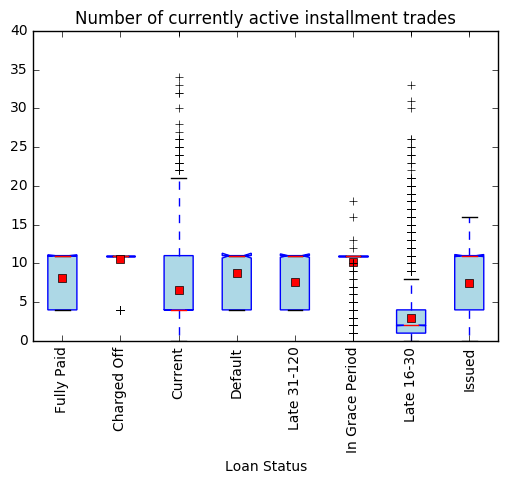

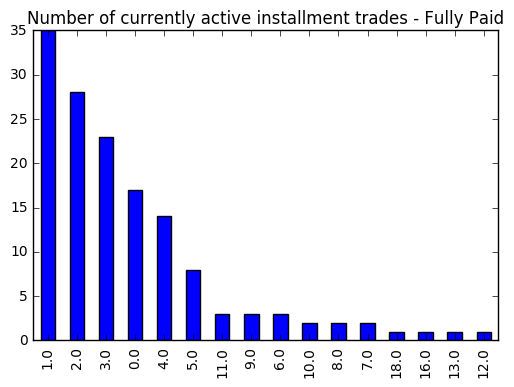

TypeError: Empty 'DataFrame': no numeric data to plot

In [137]:
sorted_input =  sorted(list(zip(x_df.open_il_6m, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Number of currently active installment trades')
plt.show() 

for i in loan_data['loan_status'].unique():
    loan_data[loan_data['loan_status'] == i]['open_il_6m'].value_counts().plot(kind='bar', title = 'Number of currently active installment trades - {}'.format(i))
    plt.show()

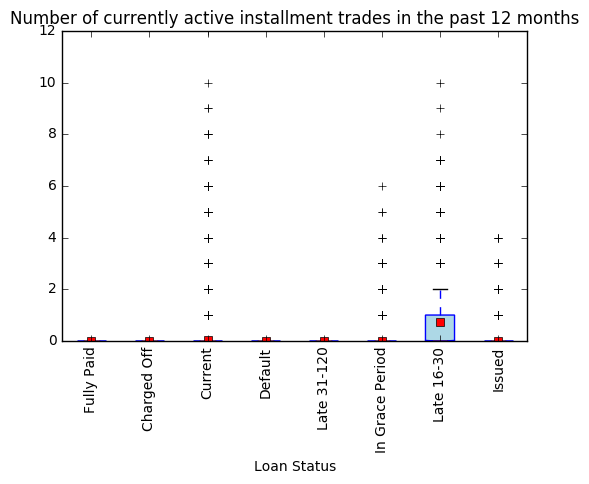

In [138]:
sorted_input =  sorted(list(zip(x_df.open_il_12m, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Number of currently active installment trades in the past 12 months')
plt.show() 

# for i in loan_data['loan_status'].unique():
#     loan_data[loan_data['loan_status'] == i]['open_il_12m'].value_counts().plot(kind='bar', title = 'Number of currently active installment trades in the past 12 months - {}'.format(i))
#     plt.show()

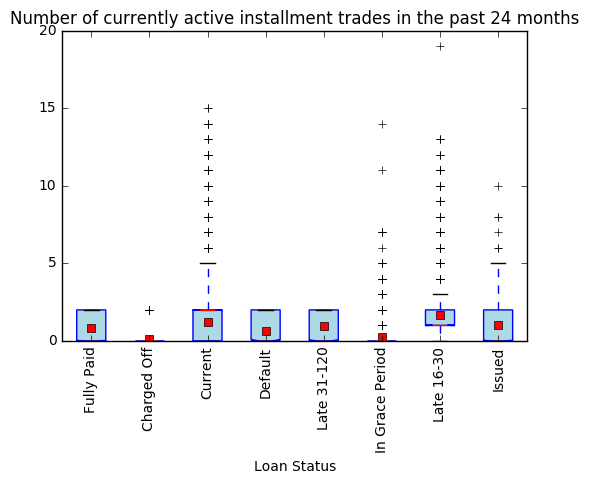

In [139]:
sorted_input =  sorted(list(zip(x_df.open_il_24m, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Number of currently active installment trades in the past 24 months')
plt.show() 

# for i in loan_data['loan_status'].unique():
#     loan_data[loan_data['loan_status'] == i]['open_il_24m'].value_counts().plot(kind='bar', title = 'Number of currently active installment trades in the past 24 months - {}'.format(i))
#     plt.show()

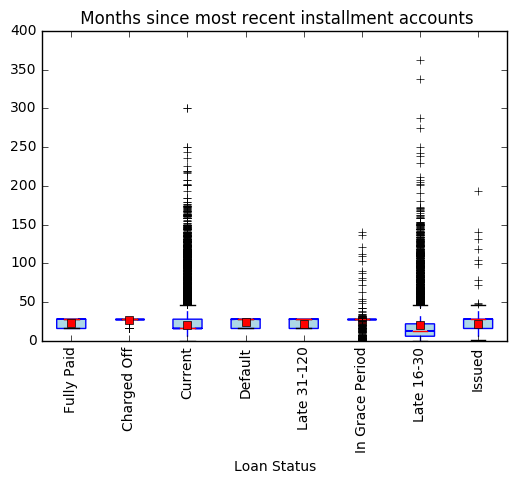

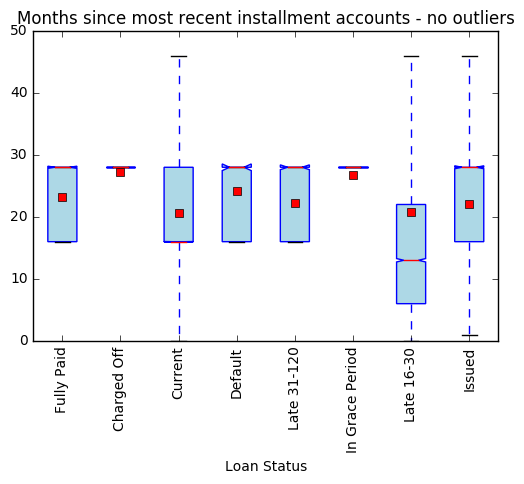

In [140]:
sorted_input =  sorted(list(zip(x_df.mths_since_rcnt_il, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title(' Months since most recent installment accounts')
plt.show() 

sorted_input =  sorted(list(zip(x_df.mths_since_rcnt_il, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Months since most recent installment accounts - no outliers')
plt.show()

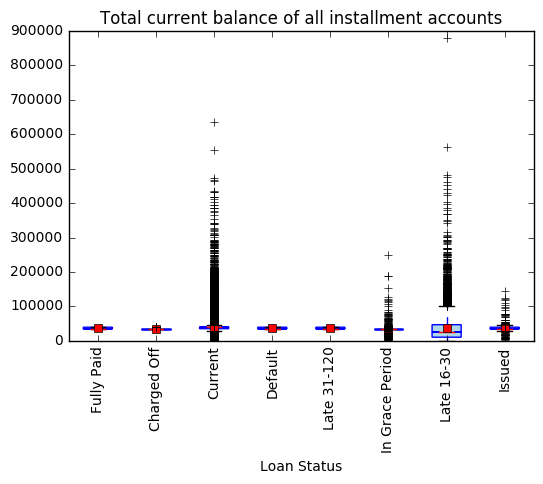

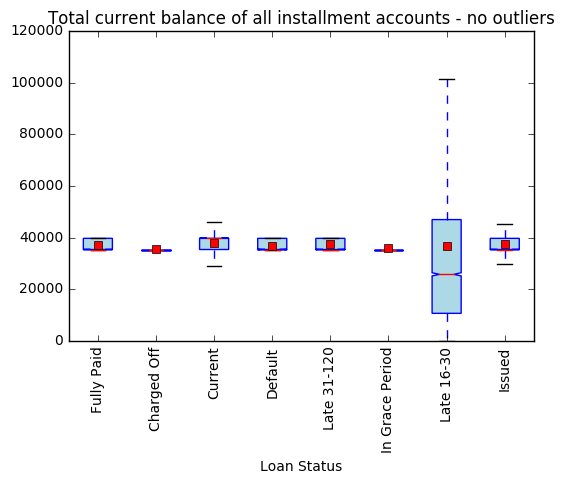

In [141]:
sorted_input =  sorted(list(zip(x_df.total_bal_il, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Total current balance of all installment accounts')
plt.show() 

sorted_input =  sorted(list(zip(x_df.total_bal_il, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Total current balance of all installment accounts - no outliers')
plt.show()

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
'term', 'int_rate', 'installment', 'emp_title','emp_length', 'home_ownership', 
'annual_inc', 'verification_status','issue_d', 'pymnt_plan', 'url', 
'desc', (hold on - sentiment analysis like above), 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line','inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 
'total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d','collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code' (only one value?), 'application_type', 
'annual_inc_joint', 'dti_joint','verification_status_joint', 'acc_now_delinq', 'tot_coll_amt','tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 

'il_util',
'open_rv_12m', 

'open_rv_24m', 'max_bal_bc', 'all_util',
'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [142]:
print(len(x_df['il_util'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'il_util'].iloc[:,1]

1272


66    Ratio of total current balance to high credit/...
Name: Description, dtype: object

In [143]:
print(len(x_df['open_rv_12m'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'open_rv_12m'].iloc[:,1]

18


67    Number of revolving trades opened in past 12 m...
Name: Description, dtype: object

In [144]:
print(len(x_df['open_rv_24m'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'open_rv_24m'].iloc[:,1]

28


68    Number of revolving trades opened in past 24 m...
Name: Description, dtype: object

In [145]:
print(len(x_df['max_bal_bc'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'max_bal_bc'].iloc[:,1]

10707


69    Maximum current balance owed on all revolving ...
Name: Description, dtype: object

In [146]:
print(len(x_df['all_util'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'all_util'].iloc[:,1]

1128


70    Balance to credit limit on all trades
Name: Description, dtype: object

In [147]:
print(len(x_df['total_rev_hi_lim'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'total_rev_hi_lim'].iloc[:,1]

21251


Series([], Name: Description, dtype: object)

In [148]:
print(len(x_df['inq_fi'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'inq_fi'].iloc[:,1]

18


72    Number of personal finance inquiries
Name: Description, dtype: object

In [149]:
print(len(x_df['total_cu_tl'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'total_cu_tl'].iloc[:,1]

33


73    Number of finance trades
Name: Description, dtype: object

In [150]:
print(len(x_df['inq_last_12m'].unique()))
loan_des.loc[loan_des['LoanStatNew'] == 'inq_last_12m'].iloc[:,1]

29


74    Number of credit inquiries in past 12 months
Name: Description, dtype: object

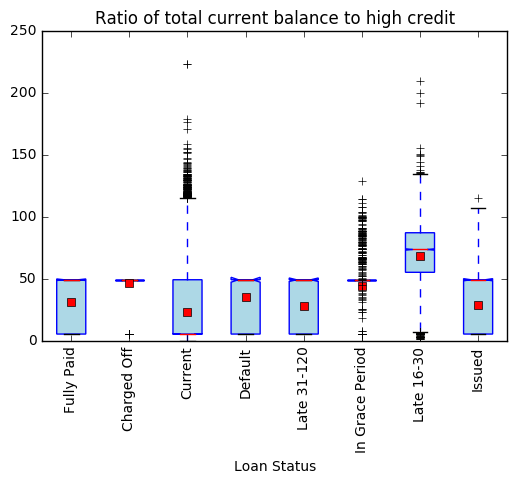

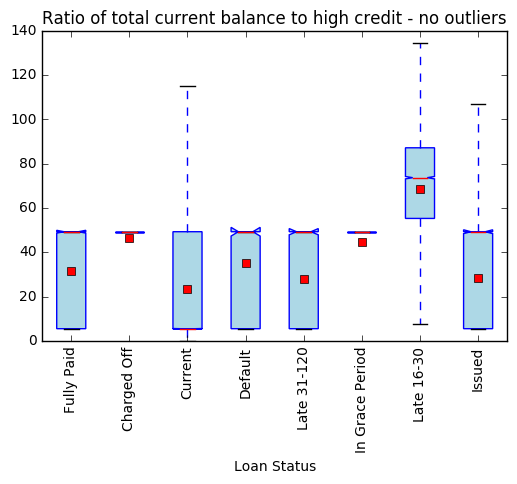

In [151]:
sorted_input =  sorted(list(zip(x_df.il_util, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Ratio of total current balance to high credit')
plt.show() 

sorted_input =  sorted(list(zip(x_df.il_util, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Ratio of total current balance to high credit - no outliers')
plt.show()

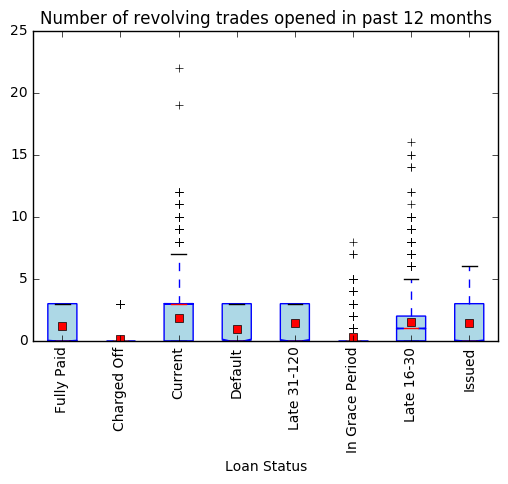

In [152]:
sorted_input =  sorted(list(zip(x_df.open_rv_12m, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Number of revolving trades opened in past 12 months')
plt.show() 

# for i in loan_data['loan_status'].unique():
#     loan_data[loan_data['loan_status'] == i]['open_rv_12m'].value_counts().plot(kind='bar', title = 'Number of revolving trades opened in past 12 months - {}'.format(i))
#     plt.show()

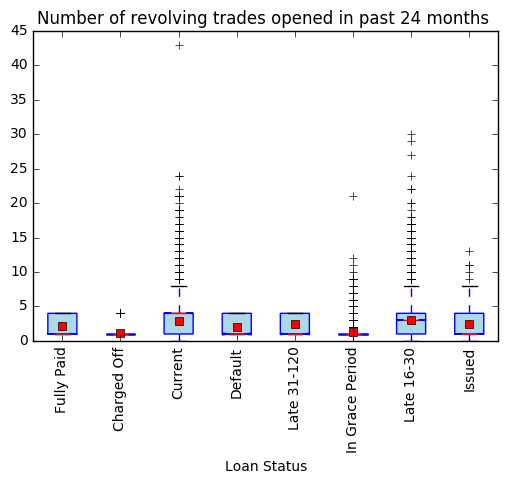

In [153]:
sorted_input =  sorted(list(zip(x_df.open_rv_24m, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Number of revolving trades opened in past 24 months ')
plt.show() 

# for i in loan_data['loan_status'].unique():
#     loan_data[loan_data['loan_status'] == i]['open_rv_24m'].value_counts().plot(kind='bar', title = 'Number of revolving trades opened in past 24 months - {}'.format(i))
#     plt.show()

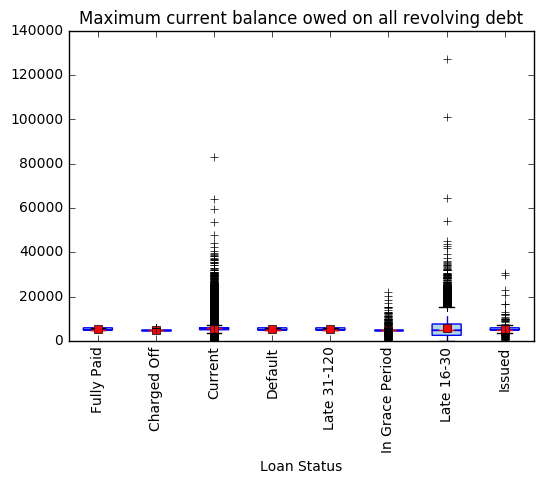

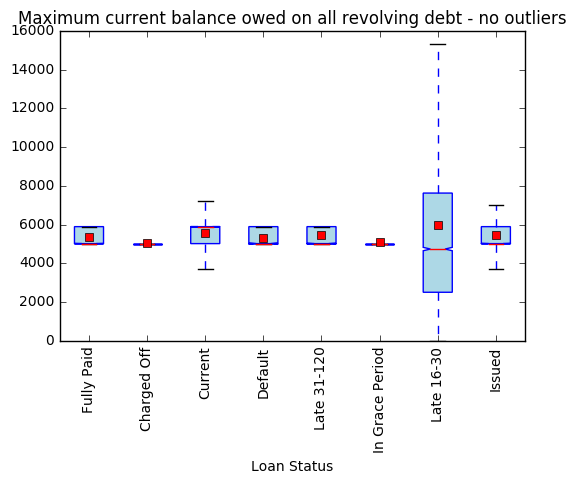

In [154]:

sorted_input =  sorted(list(zip(x_df.max_bal_bc, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Maximum current balance owed on all revolving debt')
plt.show() 

sorted_input =  sorted(list(zip(x_df.max_bal_bc, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Maximum current balance owed on all revolving debt - no outliers')
plt.show()

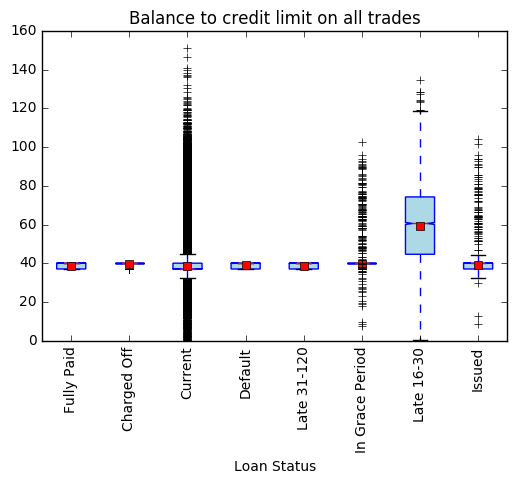

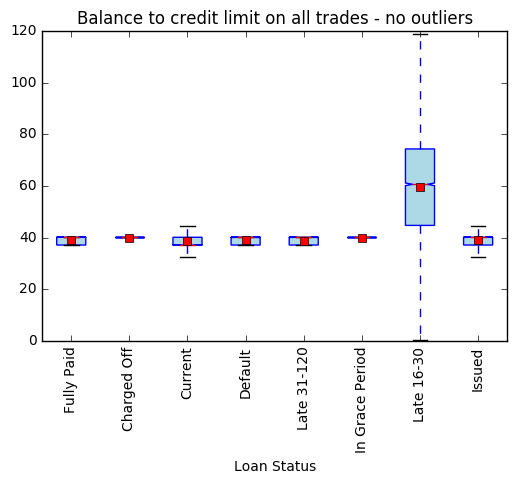

In [155]:
sorted_input =  sorted(list(zip(x_df.all_util, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Balance to credit limit on all trades')
plt.show() 

sorted_input =  sorted(list(zip(x_df.all_util, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Balance to credit limit on all trades - no outliers')
plt.show()

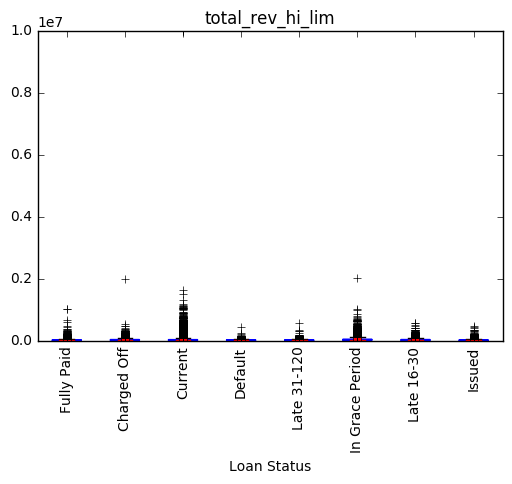

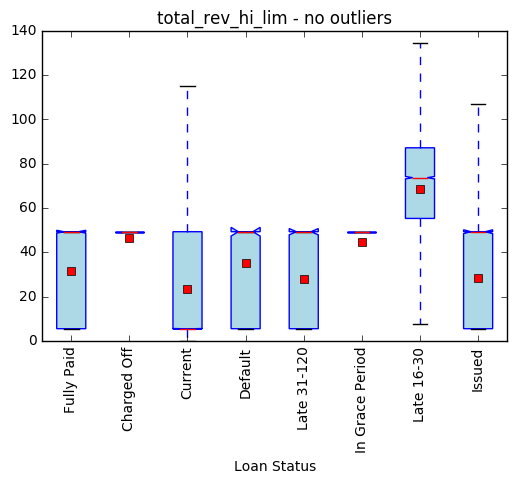

In [156]:
sorted_input =  sorted(list(zip(x_df.total_rev_hi_lim, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('total_rev_hi_lim')
plt.show() 

sorted_input =  sorted(list(zip(x_df.il_util, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True, showfliers=False)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('total_rev_hi_lim - no outliers')
plt.show()

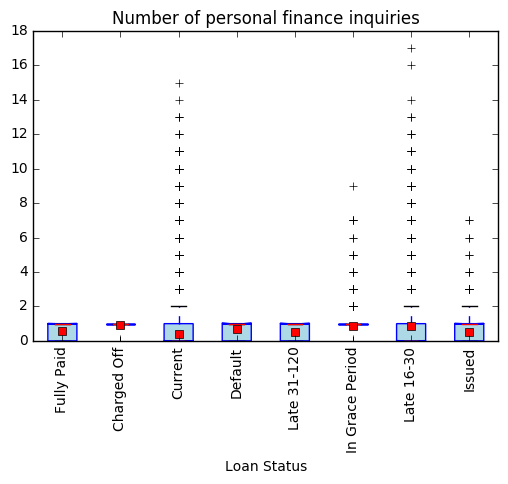

In [157]:
sorted_input =  sorted(list(zip(x_df.inq_fi, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Number of personal finance inquiries')
plt.show() 

# for i in loan_data['loan_status'].unique():
#     loan_data[loan_data['loan_status'] == i]['inq_fi'].value_counts().plot(kind='bar', title = 'Number of personal finance inquiries - {}'.format(i))
#     plt.show()

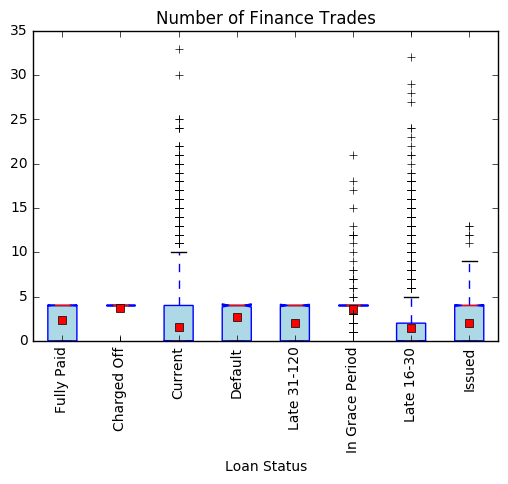

In [158]:
sorted_input =  sorted(list(zip(x_df.total_cu_tl, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Number of Finance Trades')
plt.show() 

# for i in loan_data['loan_status'].unique():
#     loan_data[loan_data['loan_status'] == i]['total_cu_tl'].value_counts().plot(kind='bar', title = 'Number of Finance Trades - {}'.format(i))
#     plt.show()

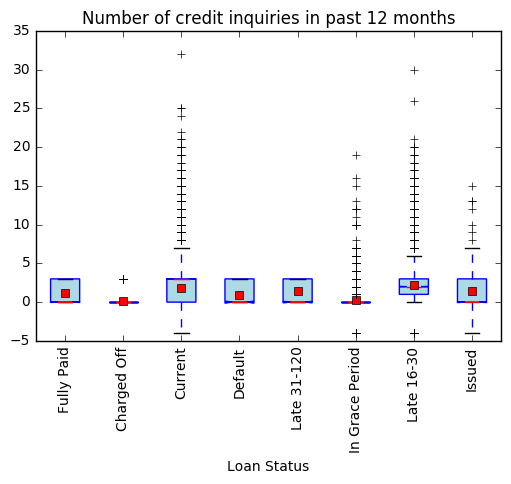

In [159]:
sorted_input =  sorted(list(zip(x_df.inq_last_12m, y_df)))

res = defaultdict(list)
for v, k in sorted_input: res[k].append(v)
grouped_dict = [{'type':k, 'items':v} for k,v in res.items()]
fully_paid = grouped_dict[0]['items']
charged_off = grouped_dict[1]['items']
current = grouped_dict[2]['items']
default = grouped_dict[3]['items']
late_31 = grouped_dict[4]['items']
in_grace_per = grouped_dict[5]['items']
late_16 = grouped_dict[6]['items']
issued = grouped_dict[7]['items']
x = [1,2,3,4,5,6,7,8]
data = [fully_paid, charged_off, current, default, late_31, in_grace_per, late_16, issued]
box = plt.boxplot(data, notch=True, patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
labels = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late 31-120', 'In Grace Period', 'Late 16-30', 'Issued']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Loan Status')
plt.title('Number of credit inquiries in past 12 months')
plt.show()
    
# for i in loan_data['loan_status'].unique():
#     loan_data[loan_data['loan_status'] == i]['inq_last_12m'].value_counts().plot(kind='bar', title = 'Number of credit inquiries in past 12 months - {}'.format(i))
#     plt.show()

range of description lengths: 1060 - 1
mean of description lengths: 57.20748969718689


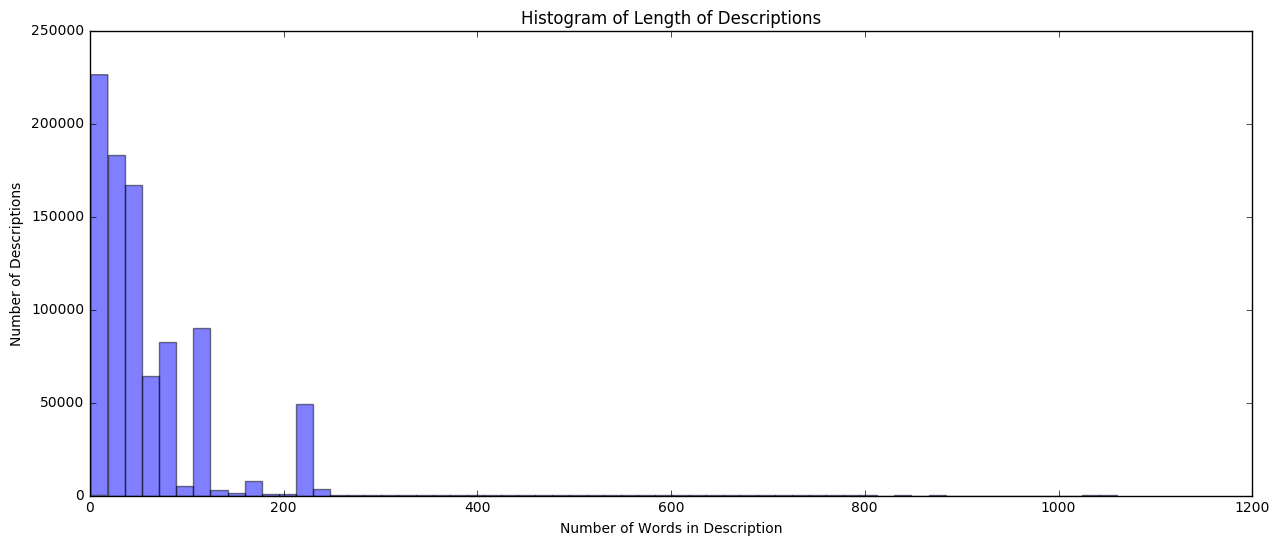

data shape: (10000, 8908)
some features: ['00', '000', '0000', '001', '008', '00_______________', '00int12', '00int13', '00int19', '00int8']
[(21582, 'br'), (17954, '11'), (14603, 'borrower'), (14031, 'added'), (8930, 'loan'), (8687, 'credit'), (6593, 'pay'), (5181, 'debt'), (3807, '10'), (3760, 'years'), (3600, 'cards'), (3398, 'card'), (3392, '09'), (3227, '12'), (3209, 'payment'), (3118, '08'), (2809, 'job'), (2667, 'time'), (2266, 'monthly'), (2232, 'thank')]


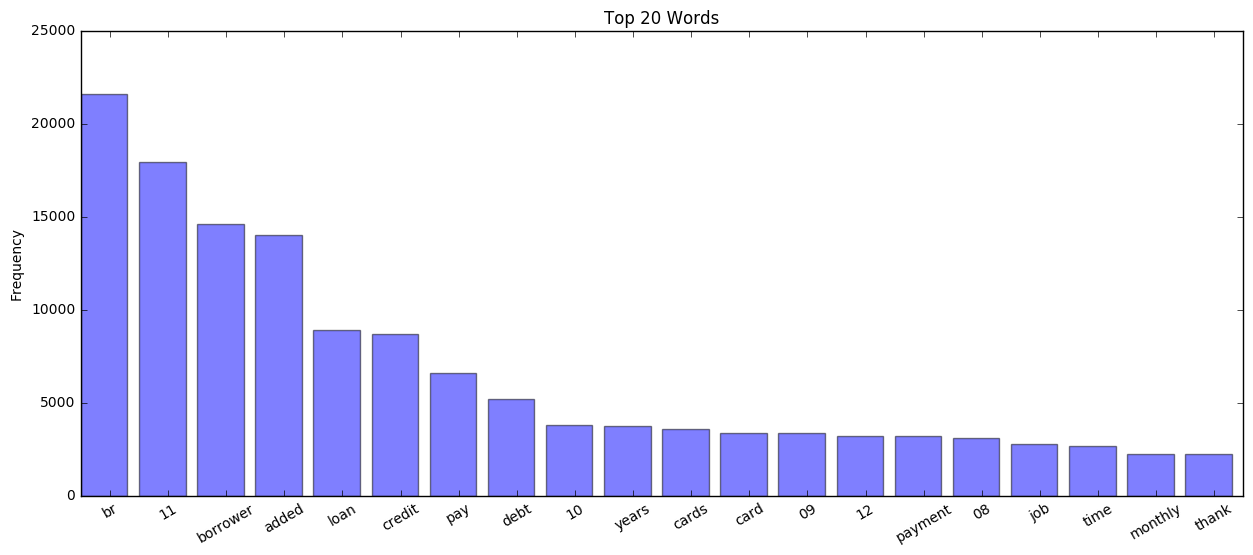

classes labels: ['Charged Off' 'Current' 'Default' 'Fully Paid' 'In Grace Period'
 'Late (16-30 days)' 'Late (31-120 days)']
transformed labels: [3 0 3 3 1 3 1 3 0 0]
number in Charged off: 1517
number in Current: 956
number in Default: 2
number in Fully paid: 7487
number in In Grace Period: 8
number in Issued: 6
number in Late_16: 24
number in Late_31: 0
[(3511, 'br'), (2980, '11'), (2388, 'borrower'), (2299, 'added'), (1333, 'loan'), (1206, 'credit'), (1018, 'pay'), (737, 'debt'), (623, '10'), (589, '12'), (531, 'cards'), (530, 'years'), (493, 'payment'), (487, '09'), (441, 'job'), (434, 'time'), (425, 'card'), (423, '08'), (410, 'thank'), (355, 'bills')]
21213
[(2268, 'br'), (1760, '11'), (1421, 'borrower'), (1363, 'added'), (891, 'loan'), (866, 'credit'), (667, 'pay'), (525, 'debt'), (404, 'years'), (387, '12'), (372, '10'), (370, 'cards'), (317, 'payment'), (303, 'card'), (296, '09'), (295, 'time'), (290, 'job'), (280, '08'), (261, 'monthly'), (238, 'payments')]
13574
[(8, '11'), 

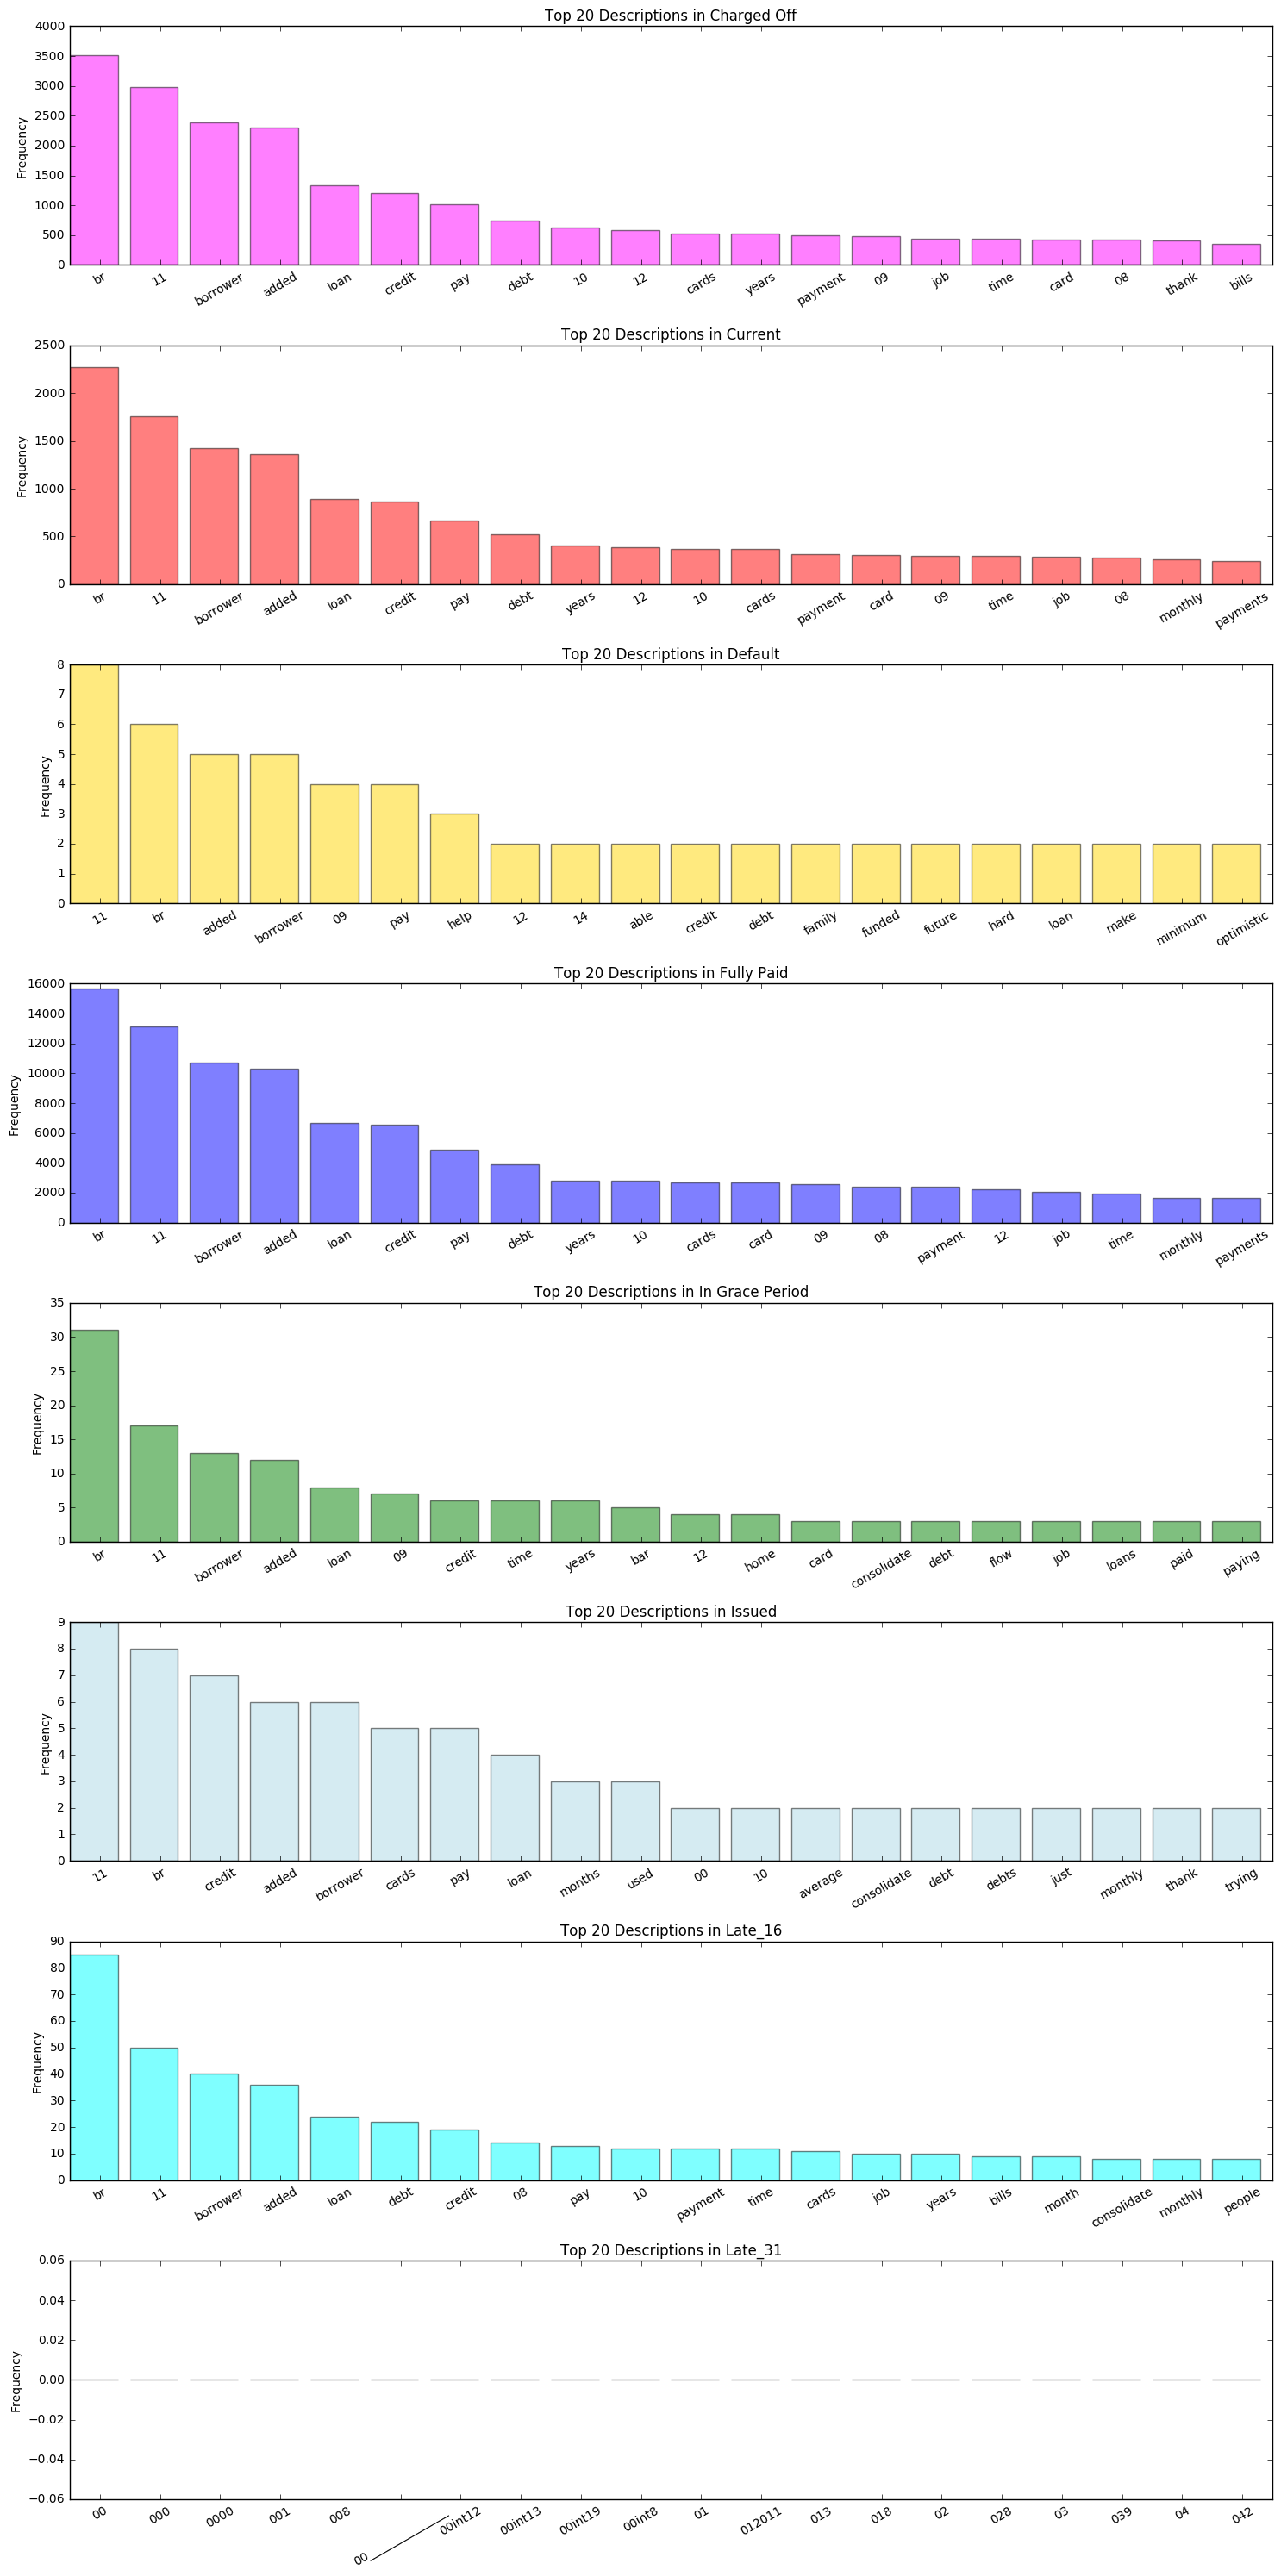

In [191]:
#Break each posts into words and count the number of words
lengths = x_df['desc'].apply(lambda x: len(x.split(' ')))

print( 'range of description lengths:', np.max(lengths), '-', np.min(lengths))
print( 'mean of description lengths:', np.mean(lengths))

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

#Histogram of the word counts in each post
ax.hist(lengths, color='blue', bins=60, alpha=0.5)

ax.set_xlabel('Number of Words in Description')
ax.set_ylabel('Number of Descriptions')
ax.set_title('Histogram of Length of Descriptions')

plt.show()
#Create a text vectorizer (turns text into array of numbers)
#using a common list of English stop words
vectorizer = CountVectorizer(stop_words='english', min_df=1)

#Get all the text from data
corpus = x_df['desc'][0:10000].values
# len(corpus)
#Turn each text into an array of word counts
x = vectorizer.fit_transform(corpus)

x = x.toarray()

#Get the names of all the words we're counting
feature_names = vectorizer.get_feature_names()

print ('data shape:', x.shape)
print ('some features:', feature_names[0:10])
#Number of top words
n = 20

#Count the number of time each word occurs in the entire dataset
word_freq = x.sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Print the top n words and their frequencies
print (top_words)
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

#Number of bars to use
indices = np.arange(n)
#Where to put the label under each bar
width = 0.5
#Bar plot of the frequencies of the top words
ax.bar(indices, [word[0] for word in top_words], color='blue', alpha=0.5)

ax.set_ylabel('Frequency')
ax.set_title('Top ' + str(n) + ' Words')

#Label the bars with the top words
ax.set_xticks(indices + width)
ax.set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

plt.show()
shortened_df_title =  pd.concat([pd.Series(x_df['desc'][0:10000].values),(pd.Series(y_df[0:10000]))], axis=1)
#Encode the class labels as numbers
labels = shortened_df_title.loan_status.values
enc_label = LabelEncoder()
y = enc_label.fit_transform(labels)
#Print the class labels
print( 'classes labels:', enc_label.classes_)
#Print the labels for our dataset after encoding them as numbers
print ('transformed labels:', y[:10])
#Print the number of employment titles in each class
print ('number in Charged off:', len(y[y == 0]))
print ('number in Current:', len(y[y == 1]))
print( 'number in Default:', len(y[y == 2]))
print ('number in Fully paid:', len(y[y == 3]))
print ('number in In Grace Period:', len(y[y == 4]))
print ('number in Issued:', len(y[y == 5]))
print ('number in Late_16:', len(y[y == 6]))
print ('number in Late_31:', len(y[y == 7]))
fig, ax = plt.subplots(8, 1, figsize=(15, 30))
#Number of top words
n = 20
#Number of bars to use
indices = np.arange(n)
#Where to put the label under each bar
width = 0.5

#Count the number of time each word occurs in "Charged Off"
word_freq = x[y == 0].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[0].bar(indices, [word[0] for word in top_words], color='magenta', alpha=0.5)

ax[0].set_ylabel('Frequency')
ax[0].set_title('Top ' + str(n) + ' Descriptions in Charged Off')

#Label the bars with the top words
ax[0].set_xticks(indices + width)
ax[0].set_xticklabels([word[1] for word in top_words])
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

#Turn the labels sideways so they don't overlap
labels = ax[0].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in the Current
word_freq = x[y == 1].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[1].bar(indices, [word[0] for word in top_words], color='red', alpha=0.5)

ax[1].set_ylabel('Frequency')
ax[1].set_title('Top ' + str(n) + ' Descriptions in Current')

#Label the bars with the top words
ax[1].set_xticks(indices + width)
ax[1].set_xticklabels([word[1] for word in top_words])
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

#Turn the labels sideways so they don't overlap
labels = ax[1].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in Default
word_freq = x[y == 2].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[2].bar(indices, [word[0] for word in top_words], color='gold', alpha=0.5)

ax[2].set_ylabel('Frequency')
ax[2].set_title('Top ' + str(n) + ' Descriptions in Default')

#Label the bars with the top words
ax[2].set_xticks(indices + width)
ax[2].set_xticklabels([word[1] for word in top_words])
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

#Turn the labels sideways so they don't overlap
labels = ax[2].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in Fully Paid
word_freq = x[y == 3].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[3].bar(indices, [word[0] for word in top_words], color='blue', alpha=0.5)

ax[3].set_ylabel('Frequency')
ax[3].set_title('Top ' + str(n) + ' Descriptions in Fully Paid')

#Label the bars with the top words
ax[3].set_xticks(indices + width)
ax[3].set_xticklabels([word[1] for word in top_words])
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

#Turn the labels sideways so they don't overlap
labels = ax[3].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in In Grace Period
word_freq = x[y == 4].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[4].bar(indices, [word[0] for word in top_words], color='green', alpha=0.5)

ax[4].set_ylabel('Frequency')
ax[4].set_title('Top ' + str(n) + ' Descriptions in In Grace Period')

#Label the bars with the top words
ax[4].set_xticks(indices + width)
ax[4].set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax[4].get_xticklabels()
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

plt.setp(labels, rotation=30, fontsize=10)



#Count the number of time each word occurs in Issued
word_freq = x[y == 5].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[5].bar(indices, [word[0] for word in top_words], color='lightblue', alpha=0.5)

ax[5].set_ylabel('Frequency')
ax[5].set_title('Top ' + str(n) + ' Descriptions in Issued')

#Label the bars with the top words
ax[5].set_xticks(indices + width)
ax[5].set_xticklabels([word[1] for word in top_words])
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

#Turn the labels sideways so they don't overlap
labels = ax[5].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in Late_16
word_freq = x[y == 6].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[6].bar(indices, [word[0] for word in top_words], color='cyan', alpha=0.5)

ax[6].set_ylabel('Frequency')
ax[6].set_title('Top ' + str(n) + ' Descriptions in Late_16')

#Label the bars with the top words
ax[6].set_xticks(indices + width)
ax[6].set_xticklabels([word[1] for word in top_words])
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

#Turn the labels sideways so they don't overlap
labels = ax[6].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

#Count the number of time each word occurs in Late_31
word_freq = x[y == 7].sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Bar plot of the frequencies of the top words
ax[7].bar(indices, [word[0] for word in top_words], color='orange', alpha=0.5)

ax[7].set_ylabel('Frequency')
ax[7].set_title('Top ' + str(n) + ' Descriptions in Late_31')

#Label the bars with the top words
ax[7].set_xticks(indices + width)
ax[7].set_xticklabels([word[1] for word in top_words])
print (top_words)

counter = 0
for i in top_words:
    counter += i[0]
print(counter)

#Turn the labels sideways so they don't overlap
labels = ax[7].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)


plt.tight_layout()
plt.show()